# ANÁLISE AGIBANK - SETOR FINANCEIRO BRASILEIRO

## 🎯 Objetivo
Analisar o posicionamento e performance do Agibank no mercado financeiro brasileiro, com foco em São Paulo e Campinas.

## 📊 Escopo
- Agibank vs Concorrentes (nacional e SP)
- Performance e satisfação
- Principais problemas
- Oportunidades de melhoria
- Análise de churn e retenção

## 📅 Informações
- **Período:** 2025
- **Base:** Consumidor.gov.br (camada Gold)
- **Filtros:** Setor financeiro, produtos core bancário
- **Autor:** [Seu Nome]
- **Data:** Fevereiro 2025

---

In [1]:
# IMPORTAÇÕES BÁSICAS
# Importação de bibliotecas essenciais para análise de dados e visualização

import sys
from pathlib import Path

# Adicionar pasta raiz ao path para importar módulos customizados
sys.path.append('../../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px        
import plotly.graph_objects as go  
import altair as alt               
from datetime import datetime

print("✅ Bibliotecas básicas importadas!")

✅ Bibliotecas básicas importadas!


In [2]:
# IMPORTAÇÃO DOS MÓDULOS CUSTOMIZADOS
# Importa funções personalizadas do projeto

from lib.carregamento import (
    carregar_base_silver,
    carregar_base_gold_sp,
    carregar_base_agibank,
    carregar_base_setorial,
    carregar_base_filtrada,
    listar_arquivos_disponiveis,
    info_base
)

from lib.cores import (
    aplicar_tema_agibank,
    configurar_plotly,
    CORES_AGIBANK,
    PALETA_CATEGORICA,
    PALETA_AZUL,
    PALETA_VERDE,
    PLOTLY_COLORS,
    PLOTLY_PALETTE,
    PLOTLY_SCALE_AZUL,
    PLOTLY_SCALE_VERDE
)

from lib.visualizacoes import (
    grafico_barras,
    grafico_linha,
    grafico_pizza,
    grafico_boxplot,
    grafico_heatmap,
    grafico_distribuicao,
    grafico_comparativo_barras
)

print("✅ Módulos customizados importados!")

Tema Agibank aplicado - Tamanho: medio
✅ Módulos customizados importados!


In [3]:
# CONFIGURAÇÕES GERAIS
# Define configurações de warnings, reprodutibilidade e exibição de dados

warnings.filterwarnings('ignore')
np.random.seed(42)

np.set_printoptions(
    precision=2,
    suppress=True,
    linewidth=120,
    edgeitems=5,
    threshold=1000
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('mode.use_inf_as_na', True)

print("✅ Configurações gerais aplicadas!")

✅ Configurações gerais aplicadas!


In [4]:
# CONFIGURAÇÕES VISUAIS
# Aplica temas e configurações para gráficos

aplicar_tema_agibank('grande')
configurar_plotly()

alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ Temas visuais aplicados!")


Tema Agibank aplicado - Tamanho: grande
Tema Agibank aplicado ao Plotly
✅ Temas visuais aplicados!


In [5]:
# DEFINIÇÃO DE CONSTANTES E CAMINHOS
# Define ano de análise, janelas temporais e caminhos do projeto

ANO_ANALISE = np.int16(2025)
JANELA_ANOS = np.array([ANO_ANALISE - 1, ANO_ANALISE], dtype=np.int16)
DATAS_REFERENCIA = np.arange(f'{ANO_ANALISE}-01', f'{ANO_ANALISE+1}-01', dtype='datetime64[M]')

RAIZ_PROJETO = Path.cwd()
CAMINHO_OUTPUT = RAIZ_PROJETO / 'output'
CAMINHO_OUTPUT.mkdir(exist_ok=True)

print(f"✅ Constantes definidas!")
print(f"Ano de análise: {ANO_ANALISE}")
print(f"Pasta de output: {CAMINHO_OUTPUT}")

✅ Constantes definidas!
Ano de análise: 2025
Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output


In [6]:
# RESUMO DO AMBIENTE
# Exibe informações sobre versões das bibliotecas e configurações aplicadas

print("=" * 80)
print("AMBIENTE CONFIGURADO COM SUCESSO")
print("=" * 80)

try:
    plotly_v = plotly.__version__
except:
    plotly_v = "Instalado"

info_libs = np.array([
    ['Pandas', pd.__version__],
    ['NumPy', np.__version__],
    ['Matplotlib', plt.matplotlib.__version__],
    ['Seaborn', sns.__version__],
    ['Plotly', plotly_v],
    ['Altair', alt.__version__],
    ['Python', sys.version.split()[0]]
])

print(f"\nVersões das bibliotecas:")
for lib, versao in info_libs:
    print(f"  {lib}: {versao}")

print(f"\nConfigurações do projeto:")
print(f"  Ano de análise: {ANO_ANALISE}")
print(f"  Pasta de output: {CAMINHO_OUTPUT}")
print(f"  Path atual: {RAIZ_PROJETO}")

paleta_mpl_np = np.array(PALETA_CATEGORICA)
paleta_plotly_np = np.array(PLOTLY_PALETTE)

print(f"\nTema visual:")
print(f"  Tema Agibank aplicado (tamanho: grande)")
print(f"  Paleta Matplotlib: {paleta_mpl_np.size} cores")
print(f"  Paleta Plotly: {paleta_plotly_np.size} cores")

print("=" * 80)

AMBIENTE CONFIGURADO COM SUCESSO

Versões das bibliotecas:
  Pandas: 2.3.3
  NumPy: 2.3.5
  Matplotlib: 3.10.7
  Seaborn: 0.13.2
  Plotly: Instalado
  Altair: 6.0.0
  Python: 3.13.5

Configurações do projeto:
  Ano de análise: 2025
  Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\output
  Path atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver

Tema visual:
  Tema Agibank aplicado (tamanho: grande)
  Paleta Matplotlib: 6 cores
  Paleta Plotly: 6 cores


In [7]:
# CARREGAMENTO DA BASE AGIBANK
# Carrega base específica do Agibank (sp_agibank_only_v1.csv)

print("=" * 80)
print("CARREGANDO BASE AGIBANK")
print("=" * 80 + "\n")

# Carrega base Agibank
df_agibank = carregar_base_agibank()

# Exibe informações da base
info_base(df_agibank)

print("\n✅ Base Agibank carregada com sucesso!")

CARREGANDO BASE AGIBANK

Carregando Agibank de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\silver\notebooks_silver\..\..\..\data\gold\sp_agibank_only_v1.csv
Separador detectado: ';'
Tentativa 1...
✅ Base Agibank carregada com sucesso (tentativa 1)!
Registros: 4,006
Colunas: 32
INFORMACOES DA BASE

Total de registros: 4,006
Total de colunas: 32
Periodo: 2024 a 2025
Memoria utilizada: 6.77 MB

✅ Base Agibank carregada com sucesso!


In [8]:
# VISÃO GERAL DA BASE AGIBANK
# Análise inicial da estrutura e conteúdo dos dados

print("=" * 80)
print("VISÃO GERAL DA BASE AGIBANK")
print("=" * 80)

# Exibe primeiras linhas
print("\nPRIMEIRAS 5 LINHAS:")
display(df_agibank.head())

# Exibe informações das colunas
print("\nINFORMAÇÕES DAS COLUNAS:")
print(df_agibank.info())

# Exibe estatísticas descritivas
print("\nESTATÍSTICAS DESCRITIVAS:")
display(df_agibank.describe())

# Lista todas as colunas
print("\nTODAS AS COLUNAS DISPONÍVEIS:")
for i, col in enumerate(df_agibank.columns, 1):
    print(f"  {i:2d}. {col}")

VISÃO GERAL DA BASE AGIBANK

PRIMEIRAS 5 LINHAS:


,regiao,uf,cidade,sexo,faixa_etaria,ano_abertura,mes_abertura,data_abertura,data_resposta,data_finalizacao,prazo_resposta,tempo_resposta,nome_fantasia,segmento_de_mercado,area,assunto,grupo_problema,problema,como_comprou_contratou,procurou_empresa,respondida,situacao,avaliacao_reclamacao,nota_do_consumidor,data_source,file_origin,processed_at,file_month,is_agibank,quality_score,cidade_suspeita_gold,cidade_ranking
0,SE,SP,Botucatu,M,entre 31 a 40 anos,2024,11,2024-11-21,2024-12-11,2025-01-01,2024-12-12,9.00,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Negativação indevida referente à pagamento já ...,Catálogo,S,S,Finalizada não avaliada,Não Avaliada,NaN,consumidor_gov,basecompleta2025-01.csv,2026-02-04 13:03:01.384007,01/2025,True,0.90,False,59
1,SE,SP,Vargem Grande Paulista,M,entre 61 a 70 anos,2024,11,2024-11-26,2024-12-17,2025-01-07,2024-12-18,9.00,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Não entrega do contrato ou documentação relaci...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,consumidor_gov,basecompleta2025-01.csv,2026-02-04 13:03:01.384007,01/2025,True,0.90,False,109
2,SE,SP,Piraju,M,mais de 70 anos,2024,11,2024-11-26,2024-12-17,2025-01-07,2024-12-17,10.00,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Não envio / atraso do boleto ou fatura / dific...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,consumidor_gov,basecompleta2025-01.csv,2026-02-04 13:03:01.384007,01/2025,True,0.90,False,202
3,SE,SP,Sorocaba,M,entre 51 a 60 anos,2024,11,2024-11-26,2024-12-20,2025-01-10,2024-12-20,10.00,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Dados Pessoais e Privacidade,Vazamento de dados ou outros incidentes de seg...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,consumidor_gov,basecompleta2025-01.csv,2026-02-04 13:03:01.384007,01/2025,True,0.90,False,4
4,SE,SP,Cravinhos,F,entre 61 a 70 anos,2024,11,2024-11-26,2024-12-18,2025-01-08,2024-12-18,10.00,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,consumidor_gov,basecompleta2025-01.csv,2026-02-04 13:03:01.384007,01/2025,True,0.90,False,165



INFORMAÇÕES DAS COLUNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  4006 non-null   object 
 1   uf                      4006 non-null   object 
 2   cidade                  4006 non-null   object 
 3   sexo                    4006 non-null   object 
 4   faixa_etaria            4006 non-null   object 
 5   ano_abertura            4006 non-null   int64  
 6   mes_abertura            4006 non-null   int64  
 7   data_abertura           4006 non-null   object 
 8   data_resposta           3659 non-null   object 
 9   data_finalizacao        4006 non-null   object 
 10  prazo_resposta          4006 non-null   object 
 11  tempo_resposta          3659 non-null   float64
 12  nome_fantasia           4006 non-null   object 
 13  segmento_de_mercado     4006 non-null   object 
 14  area          

,ano_abertura,mes_abertura,tempo_resposta,nota_do_consumidor,quality_score,cidade_ranking
count,4006.00,4006.00,3659.00,1054.00,4006.00,4006.00
mean,2024.96,6.68,6.68,1.83,0.90,67.52
std,0.19,3.16,2.69,1.45,0.00,102.60
min,2024.00,1.00,0.00,1.00,0.90,1.00
25%,2025.00,4.00,6.00,1.00,0.90,2.00
50%,2025.00,7.00,7.00,1.00,0.90,24.00
75%,2025.00,9.00,8.00,2.00,0.90,87.00
max,2025.00,12.00,15.00,5.00,0.90,678.00



TODAS AS COLUNAS DISPONÍVEIS:
   1. regiao
   2. uf
   3. cidade
   4. sexo
   5. faixa_etaria
   6. ano_abertura
   7. mes_abertura
   8. data_abertura
   9. data_resposta
  10. data_finalizacao
  11. prazo_resposta
  12. tempo_resposta
  13. nome_fantasia
  14. segmento_de_mercado
  15. area
  16. assunto
  17. grupo_problema
  18. problema
  19. como_comprou_contratou
  20. procurou_empresa
  21. respondida
  22. situacao
  23. avaliacao_reclamacao
  24. nota_do_consumidor
  25. data_source
  26. file_origin
  27. processed_at
  28. file_month
  29. is_agibank
  30. quality_score
  31. cidade_suspeita_gold
  32. cidade_ranking


In [9]:
# PREPARAÇÃO DOS DADOS: ARRAYS E VARIÁVEIS GLOBAIS

print("=" * 80)
print("PREPARANDO DADOS PARA ANÁLISE")
print("=" * 80)

# Arrays principais
arr_cidade = df_agibank['cidade'].str.upper().to_numpy()
arr_nota = df_agibank['nota_do_consumidor'].to_numpy()
arr_tempo = df_agibank['tempo_resposta'].to_numpy()
arr_mes = df_agibank['mes_abertura'].to_numpy()
arr_ano = df_agibank['ano_abertura'].to_numpy()
arr_avaliacao = df_agibank['avaliacao_reclamacao'].to_numpy()
arr_sexo = df_agibank['sexo'].to_numpy()
arr_faixa_etaria = df_agibank['faixa_etaria'].to_numpy()
arr_assunto = df_agibank['assunto'].to_numpy()
arr_procurou = df_agibank['procurou_empresa'].to_numpy()

# Flags geográficas
eh_capital = arr_cidade == 'SÃO PAULO'
eh_interior = ~eh_capital
eh_campinas = arr_cidade == 'CAMPINAS'

df_agibank['eh_capital'] = eh_capital
df_agibank['eh_interior'] = eh_interior
df_agibank['eh_campinas'] = eh_campinas

# Categorização de notas usando NumPy
categoria_nota = np.select(
    [arr_nota <= 2, arr_nota == 3, arr_nota >= 4],
    ['Insatisfeito (≤2)', 'Neutro (3)', 'Satisfeito (≥4)'],
    default='Sem nota'
)
df_agibank['categoria_nota'] = categoria_nota

# Categorização de tempo usando NumPy
categoria_tempo = np.select(
    [
        arr_tempo <= 1,
        (arr_tempo > 1) & (arr_tempo <= 3),
        (arr_tempo > 3) & (arr_tempo <= 7),
        (arr_tempo > 7) & (arr_tempo <= 10),
        arr_tempo > 10
    ],
    ['0-1 dia', '1-3 dias', '3-7 dias', '7-10 dias', '>10 dias'],
    default='Não informado'
)
df_agibank['categoria_tempo'] = categoria_tempo

# Flag de resposta no prazo
no_prazo = arr_tempo <= 10
df_agibank['no_prazo'] = no_prazo

# Variáveis globais
total_registros = len(arr_cidade)
total_capital = np.sum(eh_capital)
total_interior = np.sum(eh_interior)
total_campinas = np.sum(eh_campinas)

pct_capital = (total_capital / total_registros) * 100
pct_interior = (total_interior / total_registros) * 100
pct_campinas = (total_campinas / total_registros) * 100

# Distribuição por ano
anos_unicos, contagem_anos = np.unique(arr_ano, return_counts=True)
pct_anos = (contagem_anos / total_registros) * 100

print(f"\n✅ Dados preparados!")
print(f"\nDISTRIBUIÇÃO TEMPORAL:")
for ano, qtd, pct in zip(anos_unicos, contagem_anos, pct_anos):
    print(f"  {int(ano)}: {qtd:,} ({pct:.1f}%)")

print(f"\nDISTRIBUIÇÃO GEOGRÁFICA:")
print(f"  Total Agibank SP: {total_registros:,}")
print(f"  Capital: {total_capital:,} ({pct_capital:.1f}%)")
print(f"  Interior: {total_interior:,} ({pct_interior:.1f}%)")
print(f"  Campinas: {total_campinas:,} ({pct_campinas:.1f}%)")

PREPARANDO DADOS PARA ANÁLISE

✅ Dados preparados!

DISTRIBUIÇÃO TEMPORAL:
  2024: 151 (3.8%)
  2025: 3,855 (96.2%)

DISTRIBUIÇÃO GEOGRÁFICA:
  Total Agibank SP: 4,006
  Capital: 928 (23.2%)
  Interior: 3,078 (76.8%)
  Campinas: 78 (1.9%)


ANÁLISE 1: EVOLUÇÃO TEMPORAL DO AGIBANK

VOLUMETRIA AGIBANK:
  Total de reclamações: 4,006
  Média mensal: 334
  Mediana mensal: 339
  Desvio padrão: 83

  Mês com MAIS reclamações: 10 (460)
  Mês com MENOS reclamações: 12 (176)
  Crescimento no período: -28.5%


,Reclamações,Variação %
Mês,,
1,246,+0.0%
2,273,+11.0%
3,263,-3.7%
4,348,+32.3%
5,391,+12.4%
6,341,-12.8%
7,337,-1.2%
8,442,+31.2%
9,429,-2.9%


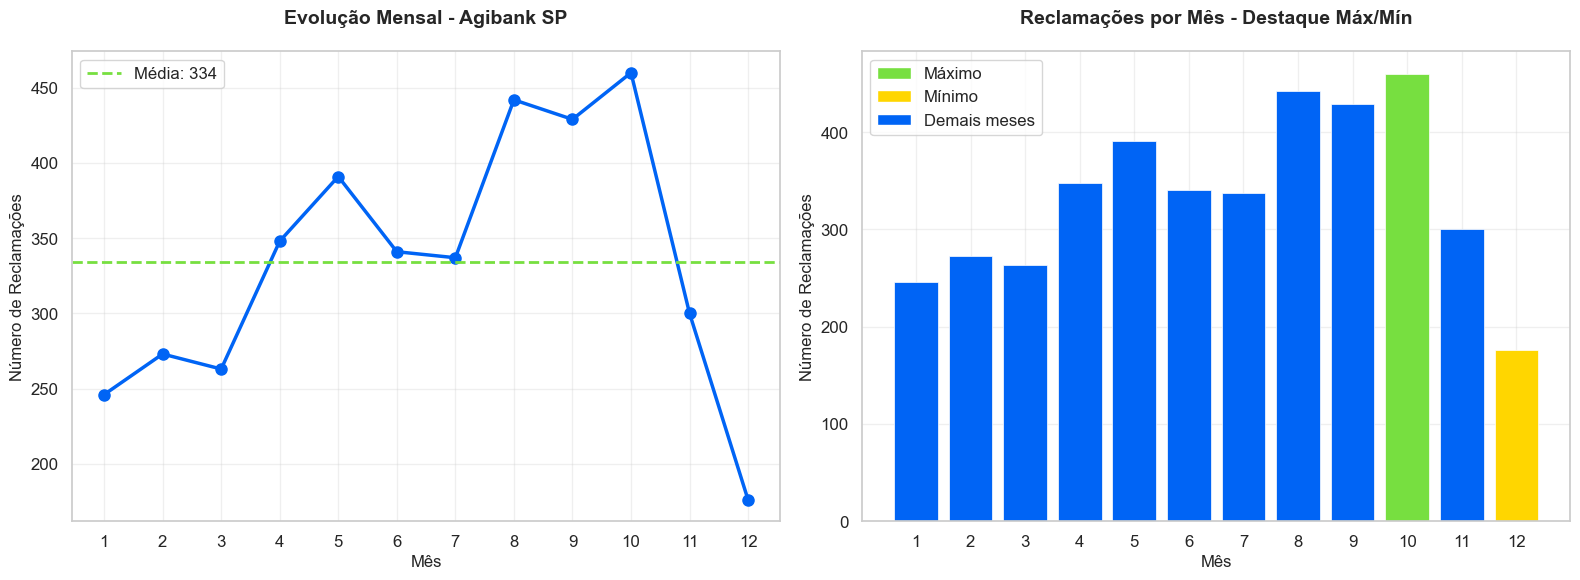

In [10]:
# ANÁLISE 1: EVOLUÇÃO TEMPORAL DO AGIBANK
# Análise da evolução mensal de reclamações

print("=" * 80)
print("ANÁLISE 1: EVOLUÇÃO TEMPORAL DO AGIBANK")
print("=" * 80)

# Agrupa reclamações por mês
meses_unicos, contagem_por_mes = np.unique(arr_mes, return_counts=True)

# Ordena cronologicamente
idx_ordenado = np.argsort(meses_unicos)
meses_ordenados = meses_unicos[idx_ordenado]
contagens_ordenadas = contagem_por_mes[idx_ordenado]

# Calcula taxa de crescimento
if len(contagens_ordenadas) > 1:
    crescimento = ((contagens_ordenadas[-1] / contagens_ordenadas[0]) - 1) * 100
else:
    crescimento = 0.0

# Estatísticas
media_mensal = np.mean(contagens_ordenadas)
mediana_mensal = np.median(contagens_ordenadas)
desvio_mensal = np.std(contagens_ordenadas)
mes_max = meses_ordenados[np.argmax(contagens_ordenadas)]
reclamacoes_max = np.max(contagens_ordenadas)
mes_min = meses_ordenados[np.argmin(contagens_ordenadas)]
reclamacoes_min = np.min(contagens_ordenadas)

print(f"\nVOLUMETRIA AGIBANK:")
print(f"  Total de reclamações: {total_registros:,}")
print(f"  Média mensal: {media_mensal:,.0f}")
print(f"  Mediana mensal: {mediana_mensal:,.0f}")
print(f"  Desvio padrão: {desvio_mensal:,.0f}")
print(f"\n  Mês com MAIS reclamações: {mes_max:.0f} ({reclamacoes_max:,})")
print(f"  Mês com MENOS reclamações: {mes_min:.0f} ({reclamacoes_min:,})")
print(f"  Crescimento no período: {crescimento:+.1f}%")

# Tabela de evolução
df_evolucao_agibank = pd.DataFrame({
    'Mês': meses_ordenados.astype(int),
    'Reclamações': contagens_ordenadas,
    'Variação %': np.concatenate([[0], np.diff(contagens_ordenadas) / contagens_ordenadas[:-1] * 100])
}).set_index('Mês')

display(
    df_evolucao_agibank.style
    .format({
        'Reclamações': '{:,.0f}',
        'Variação %': '{:+.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='RdYlGn', subset=['Variação %'], vmin=-20, vmax=20)
    .set_caption('Evolução Mensal de Reclamações - Agibank SP')
)

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Linha temporal
ax1.plot(meses_ordenados, contagens_ordenadas, 
         marker='o', linewidth=2.5, markersize=8, 
         color=CORES_AGIBANK['azul_principal'])
ax1.axhline(y=media_mensal, color=CORES_AGIBANK['verde'], 
            linestyle='--', linewidth=2, label=f'Média: {media_mensal:,.0f}')
ax1.set_title('Evolução Mensal - Agibank SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Reclamações', fontsize=12)
ax1.set_xticks(meses_ordenados)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: Barras com destaque
cores_barras = [CORES_AGIBANK['verde'] if mes == mes_max 
                else CORES_AGIBANK['amarelo'] if mes == mes_min 
                else CORES_AGIBANK['azul_principal'] 
                for mes in meses_ordenados]

ax2.bar(meses_ordenados, contagens_ordenadas, color=cores_barras, 
        edgecolor='white', linewidth=0.5)
ax2.set_title('Reclamações por Mês - Destaque Máx/Mín', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Número de Reclamações', fontsize=12)
ax2.set_xticks(meses_ordenados)
ax2.grid(True, alpha=0.3, axis='y')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES_AGIBANK['verde'], label='Máximo'),
    Patch(facecolor=CORES_AGIBANK['amarelo'], label='Mínimo'),
    Patch(facecolor=CORES_AGIBANK['azul_principal'], label='Demais meses')
]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

ANÁLISE 2: PERFIL DEMOGRÁFICO AGIBANK

PARTE 1: DISTRIBUIÇÃO POR GÊNERO
--------------------------------------------------------------------------------


,Reclamações,% do Total
Gênero,,
F,"2,144",53.5%
M,"1,862",46.5%



INSIGHT:
  Gênero predominante: F (53.5%)


PARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA
--------------------------------------------------------------------------------


,Reclamações,% do Total
Faixa Etária,,
entre 61 a 70 anos,"1,255",31.3%
entre 51 a 60 anos,786,19.6%
mais de 70 anos,705,17.6%
entre 41 a 50 anos,538,13.4%
entre 31 a 40 anos,434,10.8%
entre 21 a 30 anos,275,6.9%
até 20 anos,13,0.3%



INSIGHT:
  Faixa etária predominante: entre 61 a 70 anos (31.3%)
  Idade média aproximada: 56 anos


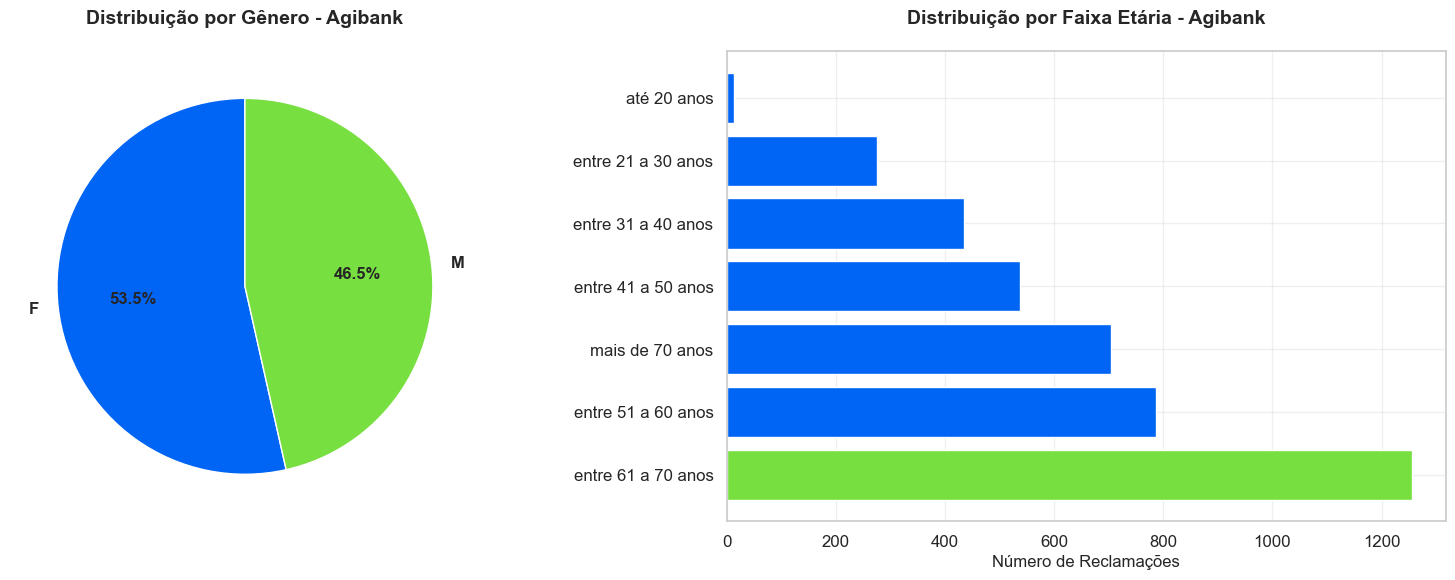

In [11]:
# ANÁLISE 2: PERFIL DEMOGRÁFICO DO AGIBANK
# Análise do perfil dos clientes que reclamam (Pergunta 2)

print("=" * 80)
print("ANÁLISE 2: PERFIL DEMOGRÁFICO AGIBANK")
print("=" * 80)

print("\nPARTE 1: DISTRIBUIÇÃO POR GÊNERO")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_sexo_limpo = pd.Series(arr_sexo).fillna('Não Informado').astype(str).to_numpy()
generos_unicos, contagem_genero = np.unique(arr_sexo_limpo, return_counts=True)

# Ordena do maior para o menor
idx_ord_genero = np.argsort(contagem_genero)[::-1]
generos_ordenados = generos_unicos[idx_ord_genero]
contagens_ordenadas_genero = contagem_genero[idx_ord_genero]
pct_ordenados_genero = (contagens_ordenadas_genero / len(arr_sexo_limpo)) * 100

# Identifica gênero predominante
generos_validos = generos_ordenados[generos_ordenados != 'Não Informado']
if len(generos_validos) > 0:
    genero_predominante = generos_validos[0]
    idx_predominante = np.where(generos_ordenados == genero_predominante)[0][0]
    pct_predominante_genero = pct_ordenados_genero[idx_predominante]

# Tabela
df_genero_agibank = pd.DataFrame({
    'Gênero': generos_ordenados,
    'Reclamações': contagens_ordenadas_genero,
    '% do Total': pct_ordenados_genero
}).set_index('Gênero')

display(
    df_genero_agibank.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Greens', subset=['% do Total'])
    .set_caption('Distribuição por Gênero - Agibank')
)

print(f"\nINSIGHT:")
print(f"  Gênero predominante: {genero_predominante} ({pct_predominante_genero:.1f}%)")

# PARTE 2: FAIXA ETÁRIA
print("\n\nPARTE 2: DISTRIBUIÇÃO POR FAIXA ETÁRIA")
print("-" * 80)

# Trata valores ausentes e conta distribuição
arr_faixa_limpa = pd.Series(arr_faixa_etaria).fillna('Não Informado').astype(str).to_numpy()
faixas_unicas, contagem_faixas = np.unique(arr_faixa_limpa, return_counts=True)

# Ordena do maior para o menor
idx_ord_faixas = np.argsort(contagem_faixas)[::-1]
faixas_ordenadas = faixas_unicas[idx_ord_faixas]
contagens_faixas_ord = contagem_faixas[idx_ord_faixas]
pct_faixas_ord = (contagens_faixas_ord / len(arr_faixa_limpa)) * 100

# Identifica faixa predominante
faixas_validas = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
if len(faixas_validas) > 0:
    faixa_predominante = faixas_validas[0]
    idx_predominante_faixa = np.where(faixas_ordenadas == faixa_predominante)[0][0]
    pct_predominante_faixa = pct_faixas_ord[idx_predominante_faixa]

# Calcula idade média aproximada
mapa_idade = {
    'até 20 anos': 18,
    'entre 21 a 30 anos': 25,
    'entre 31 a 40 anos': 35,
    'entre 41 a 50 anos': 45,
    'entre 51 a 60 anos': 55,
    'entre 61 a 70 anos': 65,
    'mais de 70 anos': 75
}

idades = np.array([mapa_idade.get(f, 45) for f in arr_faixa_limpa if f in mapa_idade])
idade_media = np.mean(idades) if len(idades) > 0 else 45

# Tabela
df_faixa_etaria_agibank = pd.DataFrame({
    'Faixa Etária': faixas_ordenadas,
    'Reclamações': contagens_faixas_ord,
    '% do Total': pct_faixas_ord
}).set_index('Faixa Etária')

display(
    df_faixa_etaria_agibank.style
    .format({
        'Reclamações': '{:,.0f}',
        '% do Total': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['Reclamações'])
    .background_gradient(cmap='Oranges', subset=['% do Total'])
    .set_caption('Distribuição por Faixa Etária - Agibank')
)

print(f"\nINSIGHT:")
print(f"  Faixa etária predominante: {faixa_predominante} ({pct_predominante_faixa:.1f}%)")
print(f"  Idade média aproximada: {idade_media:.0f} anos")

# VISUALIZAÇÃO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de Gênero (Pizza)
generos_grafico = generos_ordenados[generos_ordenados != 'Não Informado']
contagens_genero_grafico = contagens_ordenadas_genero[generos_ordenados != 'Não Informado']

cores_pizza = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde'], CORES_AGIBANK['amarelo']]
ax1.pie(contagens_genero_grafico, labels=generos_grafico, autopct='%1.1f%%', 
        colors=cores_pizza[:len(generos_grafico)], startangle=90, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribuição por Gênero - Agibank', fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Distribuição Faixa Etária (Barras)
faixas_grafico = faixas_ordenadas[faixas_ordenadas != 'Não Informado']
contagens_faixas_grafico = contagens_faixas_ord[faixas_ordenadas != 'Não Informado']

cores_barras_faixa = [CORES_AGIBANK['verde'] if i == 0 else CORES_AGIBANK['azul_principal'] 
                      for i in range(len(faixas_grafico))]

ax2.barh(range(len(faixas_grafico)), contagens_faixas_grafico, 
         color=cores_barras_faixa, edgecolor='white', linewidth=1)
ax2.set_yticks(range(len(faixas_grafico)))
ax2.set_yticklabels(faixas_grafico)
ax2.set_xlabel('Número de Reclamações', fontsize=12)
ax2.set_title('Distribuição por Faixa Etária - Agibank', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [13]:
# ANÁLISE 3: SATISFAÇÃO AGIBANK vs SETOR FINANCEIRO SP
# Comparação de como o Agibank é avaliado em relação ao setor (Pergunta 3)

print("=" * 80)
print("ANÁLISE 3: SATISFAÇÃO AGIBANK vs SETOR SP")
print("=" * 80)

# Carrega base do setor SP (se ainda não carregou)
if 'df_sp_financeiro' not in locals():
    print("\n⚠️  Base do setor SP não encontrada. Carregando...")
    df_sp_financeiro = carregar_base_gold_sp()
    
    # Aplica mesmo filtro de produtos
    assuntos_financeiros_validos = [
        'Cartão de Crédito / Cartão de Débito / Cartão de Loja',
        'Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos)',
        'Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)',
        'Conta corrente / Salário / Poupança /Conta Aposentadoria',
        'Crédito Consignado (para servidores públicos ou trabalhadores do setor privado)',
        'Atendimento Bancário',
        'Seguro Prestamista',
        'Investimentos / Aplicações / Câmbio / Previdência Privada',
        'Seguro de Vida',
        'Consórcios (exceto imóveis)',
        'Consórcio de Imóveis',
        'Título de Capitalização',
        'Seguro de Acidentes Pessoais',
        'Caixa Eletrônico Multibanco',
        'Consulta / Monitoramento de CPF',
        'Cadastro Positivo'
    ]
    
    mask_assuntos = df_sp_financeiro['assunto'].isin(assuntos_financeiros_validos)
    df_sp_financeiro = df_sp_financeiro[mask_assuntos].copy()
    print(f"✅ Base do setor SP carregada e filtrada: {len(df_sp_financeiro):,} registros")

# Arrays do setor
arr_nota_setor = df_sp_financeiro['nota_do_consumidor'].to_numpy()

# Remove valores ausentes
arr_nota_agibank_valida = arr_nota[~np.isnan(arr_nota)]
arr_nota_setor_valida = arr_nota_setor[~np.isnan(arr_nota_setor)]

# ESTATÍSTICAS DESCRITIVAS
print(f"\nESTATÍSTICAS GERAIS:")
print("-" * 80)

# Agibank
nota_media_agi = np.mean(arr_nota_agibank_valida)
nota_mediana_agi = np.median(arr_nota_agibank_valida)
nota_desvio_agi = np.std(arr_nota_agibank_valida)

# Setor
nota_media_setor = np.mean(arr_nota_setor_valida)
nota_mediana_setor = np.median(arr_nota_setor_valida)
nota_desvio_setor = np.std(arr_nota_setor_valida)

# Diferenças
dif_media = nota_media_agi - nota_media_setor
dif_mediana = nota_mediana_agi - nota_mediana_setor
dif_percentual = (dif_media / nota_media_setor) * 100

print(f"                    AGIBANK    SETOR      DIFERENÇA")
print(f"  Nota Média:       {nota_media_agi:>6.2f}    {nota_media_setor:>6.2f}    {dif_media:>+6.2f} ({dif_percentual:>+5.1f}%)")
print(f"  Nota Mediana:     {nota_mediana_agi:>6.2f}    {nota_mediana_setor:>6.2f}    {dif_mediana:>+6.2f}")
print(f"  Desvio Padrão:    {nota_desvio_agi:>6.2f}    {nota_desvio_setor:>6.2f}")

# DISTRIBUIÇÃO DE NOTAS
print(f"\n\nDISTRIBUIÇÃO DE NOTAS:")
print("-" * 80)

# Agibank
insatisfeitos_agi = np.sum(arr_nota_agibank_valida <= 2)
neutros_agi = np.sum(arr_nota_agibank_valida == 3)
satisfeitos_agi = np.sum(arr_nota_agibank_valida >= 4)

pct_insat_agi = (insatisfeitos_agi / len(arr_nota_agibank_valida)) * 100
pct_neutro_agi = (neutros_agi / len(arr_nota_agibank_valida)) * 100
pct_sat_agi = (satisfeitos_agi / len(arr_nota_agibank_valida)) * 100

# Setor
insatisfeitos_setor = np.sum(arr_nota_setor_valida <= 2)
neutros_setor = np.sum(arr_nota_setor_valida == 3)
satisfeitos_setor = np.sum(arr_nota_setor_valida >= 4)

pct_insat_setor = (insatisfeitos_setor / len(arr_nota_setor_valida)) * 100
pct_neutro_setor = (neutros_setor / len(arr_nota_setor_valida)) * 100
pct_sat_setor = (satisfeitos_setor / len(arr_nota_setor_valida)) * 100

# Diferenças
dif_insat = pct_insat_agi - pct_insat_setor
dif_neutro = pct_neutro_agi - pct_neutro_setor
dif_sat = pct_sat_agi - pct_sat_setor

print(f"                         AGIBANK      SETOR      DIFERENÇA")
print(f"  Insatisfeitos (≤2):    {pct_insat_agi:>6.1f}%     {pct_insat_setor:>6.1f}%     {dif_insat:>+6.1f}pp")
print(f"  Neutros (=3):          {pct_neutro_agi:>6.1f}%     {pct_neutro_setor:>6.1f}%     {dif_neutro:>+6.1f}pp")
print(f"  Satisfeitos (≥4):      {pct_sat_agi:>6.1f}%     {pct_sat_setor:>6.1f}%     {dif_sat:>+6.1f}pp")

# NPS
print(f"\n\nNPS (NET PROMOTER SCORE):")
print("-" * 80)

# Agibank
promotores_agi = np.sum(arr_nota_agibank_valida >= 4)
detratores_agi = np.sum(arr_nota_agibank_valida <= 2)
nps_agi = ((promotores_agi - detratores_agi) / len(arr_nota_agibank_valida)) * 100

# Setor
promotores_setor = np.sum(arr_nota_setor_valida >= 4)
detratores_setor = np.sum(arr_nota_setor_valida <= 2)
nps_setor = ((promotores_setor - detratores_setor) / len(arr_nota_setor_valida)) * 100

dif_nps = nps_agi - nps_setor

print(f"  NPS Agibank: {nps_agi:>+6.1f}")
print(f"  NPS Setor:   {nps_setor:>+6.1f}")
print(f"  Diferença:   {dif_nps:>+6.1f} pontos")

# Classificação NPS
def classificar_nps(nps):
    if nps >= 75:
        return "Excelente"
    elif nps >= 50:
        return "Muito Bom"
    elif nps >= 0:
        return "Razoável"
    else:
        return "Crítico"

classificacao_agi = classificar_nps(nps_agi)
classificacao_setor = classificar_nps(nps_setor)

print(f"\n  Classificação Agibank: {classificacao_agi}")
print(f"  Classificação Setor:   {classificacao_setor}")

# INSIGHT FINAL
print(f"\n\nINSIGHT:")
print("-" * 80)
if dif_media > 0:
    print(f"  O Agibank tem satisfação MELHOR que o setor em SP")
    print(f"     Nota {abs(dif_media):.2f} pontos ACIMA ({abs(dif_percentual):.1f}% melhor)")
elif dif_media < -0.1:
    print(f"  O Agibank tem satisfação PIOR que o setor em SP")
    print(f"     Nota {abs(dif_media):.2f} pontos ABAIXO ({abs(dif_percentual):.1f}% pior)")
else:
    print(f"  O Agibank tem satisfação SIMILAR ao setor em SP")
    print(f"     Diferença de apenas {abs(dif_media):.2f} pontos")

# Tabela consolidada
df_comparacao_satisfacao = pd.DataFrame({
    'Métrica': ['Nota Média', 'Nota Mediana', 'Insatisfeitos (%)', 'Neutros (%)', 'Satisfeitos (%)', 'NPS'],
    'Agibank': [
        f'{nota_media_agi:.2f}',
        f'{nota_mediana_agi:.2f}',
        f'{pct_insat_agi:.1f}%',
        f'{pct_neutro_agi:.1f}%',
        f'{pct_sat_agi:.1f}%',
        f'{nps_agi:+.1f}'
    ],
    'Setor SP': [
        f'{nota_media_setor:.2f}',
        f'{nota_mediana_setor:.2f}',
        f'{pct_insat_setor:.1f}%',
        f'{pct_neutro_setor:.1f}%',
        f'{pct_sat_setor:.1f}%',
        f'{nps_setor:+.1f}'
    ],
    'Diferença': [
        f'{dif_media:+.2f}',
        f'{dif_mediana:+.2f}',
        f'{dif_insat:+.1f}pp',
        f'{dif_neutro:+.1f}pp',
        f'{dif_sat:+.1f}pp',
        f'{dif_nps:+.1f}'
    ]
}).set_index('Métrica')

display(
    df_comparacao_satisfacao.style
    .set_caption('Comparação de Satisfação: Agibank vs Setor Financeiro SP')
)

ANÁLISE 3: SATISFAÇÃO AGIBANK vs SETOR SP

ESTATÍSTICAS GERAIS:
--------------------------------------------------------------------------------
                    AGIBANK    SETOR      DIFERENÇA
  Nota Média:         1.83      2.25     -0.42 (-18.8%)
  Nota Mediana:       1.00      1.00     +0.00
  Desvio Padrão:      1.45      1.63


DISTRIBUIÇÃO DE NOTAS:
--------------------------------------------------------------------------------
                         AGIBANK      SETOR      DIFERENÇA
  Insatisfeitos (≤2):      76.4%       63.5%      +12.9pp
  Neutros (=3):             7.2%       10.1%       -2.9pp
  Satisfeitos (≥4):        16.4%       26.4%      -10.0pp


NPS (NET PROMOTER SCORE):
--------------------------------------------------------------------------------
  NPS Agibank:  -60.0
  NPS Setor:    -37.1
  Diferença:    -22.8 pontos

  Classificação Agibank: Crítico
  Classificação Setor:   Crítico


INSIGHT:
----------------------------------------------------------------

,Agibank,Setor SP,Diferença
Métrica,,,
Nota Média,1.83,2.25,-0.42
Nota Mediana,1.00,1.00,+0.00
Insatisfeitos (%),76.4%,63.5%,+12.9pp
Neutros (%),7.2%,10.1%,-2.9pp
Satisfeitos (%),16.4%,26.4%,-10.0pp
NPS,-60.0,-37.1,-22.8


ANÁLISE 3B: DISTRIBUIÇÃO DETALHADA DAS NOTAS (1 a 5)

DISTRIBUIÇÃO NOTA POR NOTA:
--------------------------------------------------------------------------------
NOTA    AGIBANK              SETOR SP             DIFERENÇA
        Qtd      %           Qtd      %
--------------------------------------------------------------------------------
  1      750    71.2%      45,297    57.2%      +13.9pp
  2       55     5.2%       4,959     6.3%       -1.0pp
  3       76     7.2%       7,992    10.1%       -2.9pp
  4       25     2.4%       5,371     6.8%       -4.4pp
  5      148    14.0%      15,516    19.6%       -5.6pp

DESTAQUES:
--------------------------------------------------------------------------------
  Nota mais frequente no Agibank: 1 (71.2%)
  Nota mais frequente no Setor:   1 (57.2%)

  ✅ Agibank tem MAIS notas 1: +13.9pp que o setor
  ⚠️  Agibank tem MENOS notas 5: -5.6pp que o setor

  Concentração na nota predominante:
    Agibank: 71.2%
    Setor:   57.2%
    → Agibank te

,Agibank (qtd),Agibank (%),Setor (qtd),Setor (%),Diferença (pp)
Nota,,,,,
1,750,71.2%,"45,297",57.2%,+13.9pp
2,55,5.2%,"4,959",6.3%,-1.0pp
3,76,7.2%,"7,992",10.1%,-2.9pp
4,25,2.4%,"5,371",6.8%,-4.4pp
5,148,14.0%,"15,516",19.6%,-5.6pp


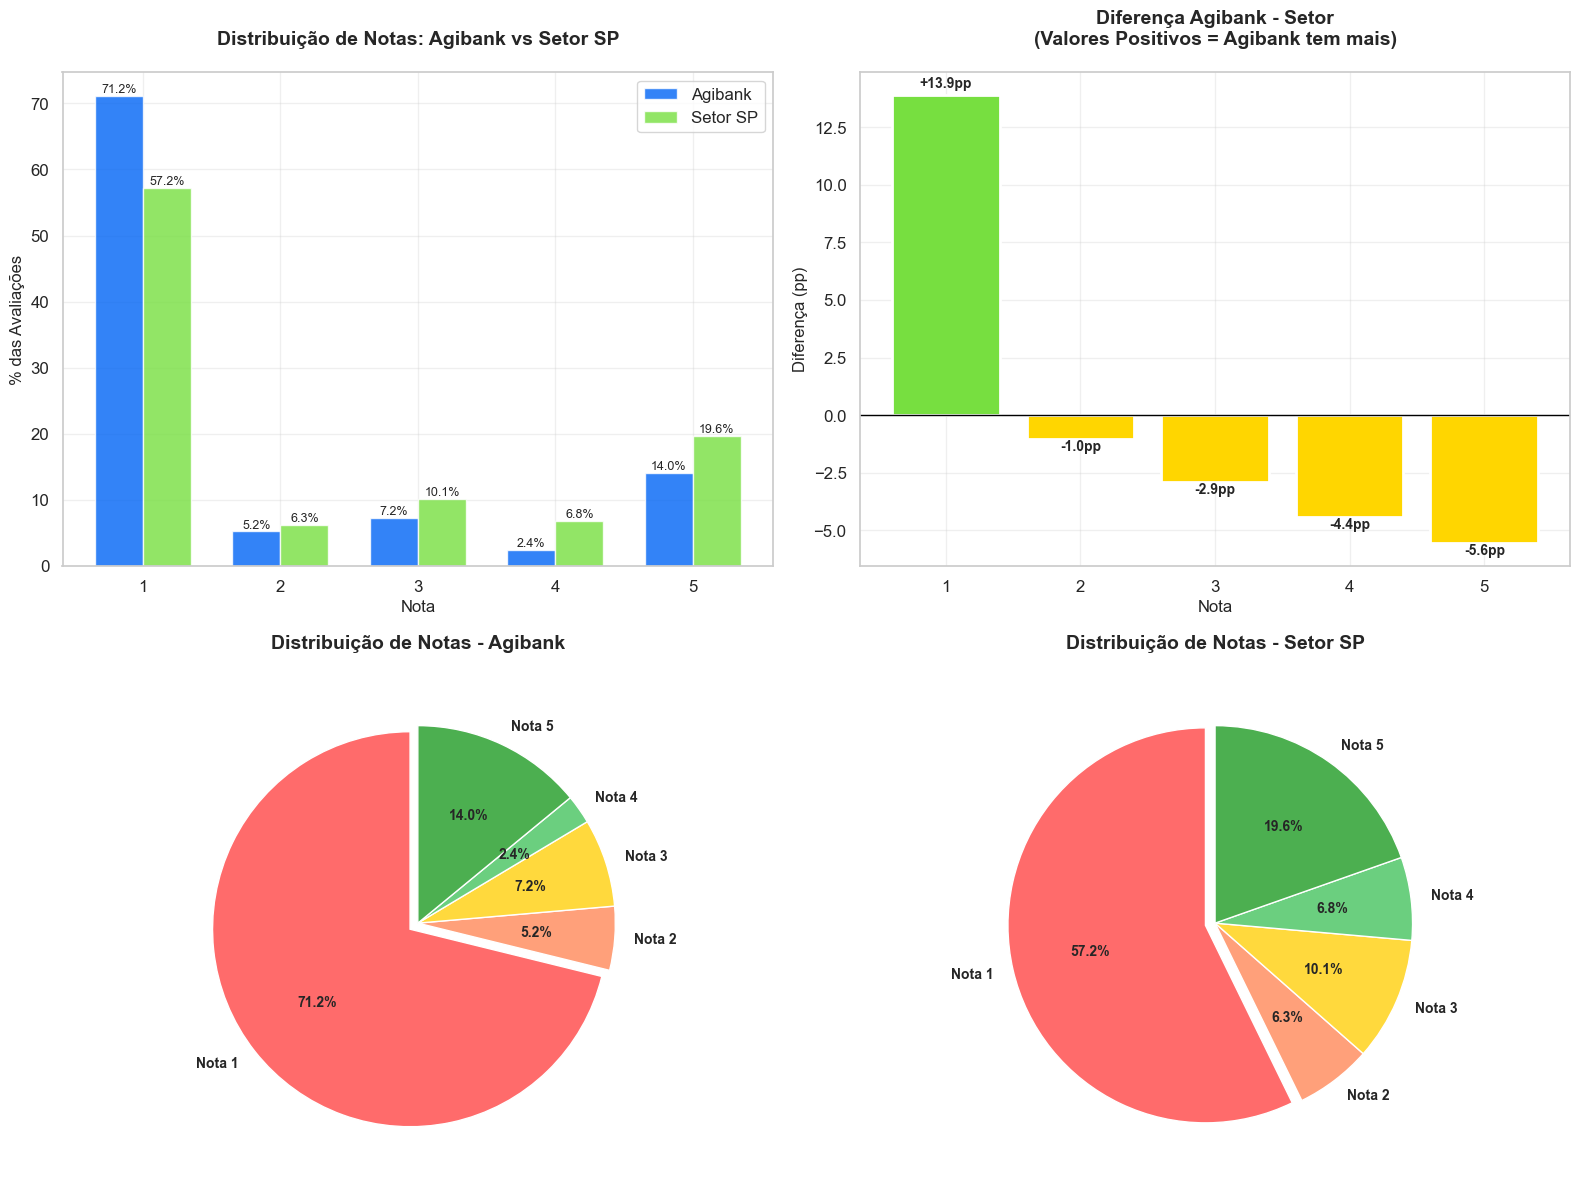


ANÁLISE DE TENDÊNCIA

RAZÃO POSITIVAS/NEGATIVAS:
  Agibank: 0.21x (para cada avaliação negativa, 0.2 positivas)
  Setor:   0.42x (para cada avaliação negativa, 0.4 positivas)

  ⚠️  Agibank tem PIOR razão positivas/negativas que o setor


In [15]:
# ANÁLISE 3B: DISTRIBUIÇÃO DETALHADA DAS NOTAS - AGIBANK vs SETOR SP
# Análise nota por nota (1, 2, 3, 4, 5)

print("=" * 80)
print("ANÁLISE 3B: DISTRIBUIÇÃO DETALHADA DAS NOTAS (1 a 5)")
print("=" * 80)

# Conta distribuição de cada nota
notas_possiveis = np.array([1, 2, 3, 4, 5])

# Agibank
contagem_notas_agi = np.array([
    np.sum(arr_nota_agibank_valida == nota) for nota in notas_possiveis
])
pct_notas_agi = (contagem_notas_agi / len(arr_nota_agibank_valida)) * 100

# Setor
contagem_notas_setor = np.array([
    np.sum(arr_nota_setor_valida == nota) for nota in notas_possiveis
])
pct_notas_setor = (contagem_notas_setor / len(arr_nota_setor_valida)) * 100

# Diferenças
dif_pct_notas = pct_notas_agi - pct_notas_setor

# Tabela detalhada
print(f"\nDISTRIBUIÇÃO NOTA POR NOTA:")
print("-" * 80)
print(f"NOTA    AGIBANK              SETOR SP             DIFERENÇA")
print(f"        Qtd      %           Qtd      %")
print("-" * 80)

for i, nota in enumerate(notas_possiveis):
    print(f"  {nota}    {contagem_notas_agi[i]:>5,}  {pct_notas_agi[i]:>6.1f}%     "
          f"{contagem_notas_setor[i]:>7,}  {pct_notas_setor[i]:>6.1f}%     "
          f"{dif_pct_notas[i]:>+6.1f}pp")

# Identifica nota predominante
nota_predominante_agi = notas_possiveis[np.argmax(pct_notas_agi)]
nota_predominante_setor = notas_possiveis[np.argmax(pct_notas_setor)]

print(f"\nDESTAQUES:")
print("-" * 80)
print(f"  Nota mais frequente no Agibank: {nota_predominante_agi} ({pct_notas_agi[nota_predominante_agi-1]:.1f}%)")
print(f"  Nota mais frequente no Setor:   {nota_predominante_setor} ({pct_notas_setor[nota_predominante_setor-1]:.1f}%)")

# Identifica maior diferença
idx_maior_dif_positiva = np.argmax(dif_pct_notas)
idx_maior_dif_negativa = np.argmin(dif_pct_notas)

if dif_pct_notas[idx_maior_dif_positiva] > 0:
    print(f"\n  ✅ Agibank tem MAIS notas {notas_possiveis[idx_maior_dif_positiva]}: "
          f"{dif_pct_notas[idx_maior_dif_positiva]:+.1f}pp que o setor")

if dif_pct_notas[idx_maior_dif_negativa] < 0:
    print(f"  ⚠️  Agibank tem MENOS notas {notas_possiveis[idx_maior_dif_negativa]}: "
          f"{dif_pct_notas[idx_maior_dif_negativa]:+.1f}pp que o setor")

# Análise de concentração
concentracao_agi = np.max(pct_notas_agi)
concentracao_setor = np.max(pct_notas_setor)

print(f"\n  Concentração na nota predominante:")
print(f"    Agibank: {concentracao_agi:.1f}%")
print(f"    Setor:   {concentracao_setor:.1f}%")

if concentracao_agi > concentracao_setor:
    print(f"    → Agibank tem avaliações MAIS CONCENTRADAS")
else:
    print(f"    → Agibank tem avaliações MAIS DISTRIBUÍDAS")

# DataFrame para visualização
df_notas_detalhadas = pd.DataFrame({
    'Nota': notas_possiveis,
    'Agibank (qtd)': contagem_notas_agi,
    'Agibank (%)': pct_notas_agi,
    'Setor (qtd)': contagem_notas_setor,
    'Setor (%)': pct_notas_setor,
    'Diferença (pp)': dif_pct_notas
}).set_index('Nota')

display(
    df_notas_detalhadas.style
    .format({
        'Agibank (qtd)': '{:,.0f}',
        'Agibank (%)': '{:.1f}%',
        'Setor (qtd)': '{:,.0f}',
        'Setor (%)': '{:.1f}%',
        'Diferença (pp)': '{:+.1f}pp'
    })
    .background_gradient(cmap='Blues', subset=['Agibank (%)'])
    .background_gradient(cmap='Greens', subset=['Setor (%)'])
    .background_gradient(cmap='RdYlGn', subset=['Diferença (pp)'], vmin=-10, vmax=10)
    .set_caption('Distribuição Detalhada de Notas: Agibank vs Setor SP')
)

# VISUALIZAÇÕES
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Barras comparativas
x = np.arange(len(notas_possiveis))
width = 0.35

bars1 = ax1.bar(x - width/2, pct_notas_agi, width, 
                label='Agibank', color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax1.bar(x + width/2, pct_notas_setor, width,
                label='Setor SP', color=CORES_AGIBANK['verde'], alpha=0.8)

ax1.set_xlabel('Nota', fontsize=12)
ax1.set_ylabel('% das Avaliações', fontsize=12)
ax1.set_title('Distribuição de Notas: Agibank vs Setor SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(notas_possiveis)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Adiciona valores nas barras
for i, (v1, v2) in enumerate(zip(pct_notas_agi, pct_notas_setor)):
    ax1.text(i - width/2, v1 + 0.5, f'{v1:.1f}%', ha='center', fontsize=9)
    ax1.text(i + width/2, v2 + 0.5, f'{v2:.1f}%', ha='center', fontsize=9)

# Gráfico 2: Diferenças (barras)
cores_dif = [CORES_AGIBANK['verde'] if dif > 0 else CORES_AGIBANK['amarelo'] 
             for dif in dif_pct_notas]

ax2.bar(notas_possiveis, dif_pct_notas, color=cores_dif, edgecolor='white', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Nota', fontsize=12)
ax2.set_ylabel('Diferença (pp)', fontsize=12)
ax2.set_title('Diferença Agibank - Setor\n(Valores Positivos = Agibank tem mais)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(notas_possiveis)
ax2.grid(True, alpha=0.3, axis='y')

for i, (nota, dif) in enumerate(zip(notas_possiveis, dif_pct_notas)):
    ax2.text(nota, dif + (0.3 if dif > 0 else -0.5), f'{dif:+.1f}pp', 
            ha='center', fontsize=10, fontweight='bold')

# Gráfico 3: Pizza Agibank
cores_pizza_agi = ['#FF6B6B', '#FFA07A', '#FFD93D', '#6BCF7F', '#4CAF50']
explode_agi = tuple(0.05 if nota == nota_predominante_agi else 0 for nota in notas_possiveis)

ax3.pie(pct_notas_agi, labels=[f'Nota {n}' for n in notas_possiveis], 
        autopct='%1.1f%%', colors=cores_pizza_agi, explode=explode_agi,
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('Distribuição de Notas - Agibank', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 4: Pizza Setor
explode_setor = tuple(0.05 if nota == nota_predominante_setor else 0 for nota in notas_possiveis)

ax4.pie(pct_notas_setor, labels=[f'Nota {n}' for n in notas_possiveis], 
        autopct='%1.1f%%', colors=cores_pizza_agi, explode=explode_setor,
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax4.set_title('Distribuição de Notas - Setor SP', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ANÁLISE ADICIONAL: Tendência
print("\n" + "=" * 80)
print("ANÁLISE DE TENDÊNCIA")
print("=" * 80)

# Calcula % de notas positivas (4-5) vs negativas (1-2)
positivas_agi = pct_notas_agi[3] + pct_notas_agi[4]  # notas 4 e 5
negativas_agi = pct_notas_agi[0] + pct_notas_agi[1]  # notas 1 e 2

positivas_setor = pct_notas_setor[3] + pct_notas_setor[4]
negativas_setor = pct_notas_setor[0] + pct_notas_setor[1]

ratio_agi = positivas_agi / negativas_agi if negativas_agi > 0 else 0
ratio_setor = positivas_setor / negativas_setor if negativas_setor > 0 else 0

print(f"\nRAZÃO POSITIVAS/NEGATIVAS:")
print(f"  Agibank: {ratio_agi:.2f}x (para cada avaliação negativa, {ratio_agi:.1f} positivas)")
print(f"  Setor:   {ratio_setor:.2f}x (para cada avaliação negativa, {ratio_setor:.1f} positivas)")

if ratio_agi > ratio_setor:
    print(f"\n  ✅ Agibank tem MELHOR razão positivas/negativas que o setor")
else:
    print(f"\n  ⚠️  Agibank tem PIOR razão positivas/negativas que o setor")

CONTEXTUALIZAÇÃO: AGIBANK vs SETOR FINANCEIRO SP

O QUE ESTAMOS COMPARANDO?
--------------------------------------------------------------------------------
  • AGIBANK: Todas as reclamações do Agibank em São Paulo
  • SETOR SP: Todas as reclamações do setor financeiro em São Paulo
    (inclui Agibank + todos os outros bancos e financeiras)


1️VOLUMETRIA: TAMANHO DA BASE

TOTAL DE RECLAMAÇÕES:
  Setor Financeiro SP (TOTAL):   322,173 (100.0%)
  ├─ Agibank:                       4,006 ( 1.24%)
  └─ Outros bancos:               318,167 (98.76%)

INTERPRETAÇÃO:
  • O Agibank representa uma PEQUENA PARCELA do setor (1.24%)
  • Para cada reclamação do Agibank, existem 79 de outros bancos


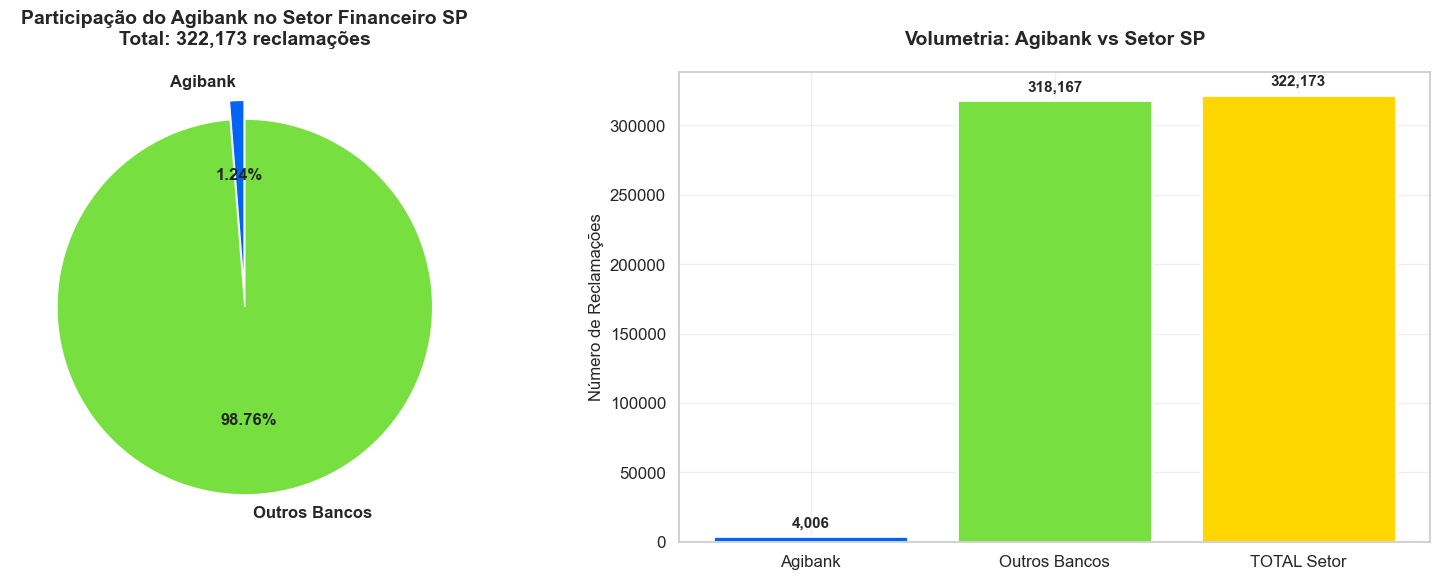

In [17]:
# CONTEXTUALIZAÇÃO PARTE 1: VOLUMETRIA
# Entendendo o tamanho da base Agibank vs Setor SP

print("=" * 80)
print("CONTEXTUALIZAÇÃO: AGIBANK vs SETOR FINANCEIRO SP")
print("=" * 80)

print("\nO QUE ESTAMOS COMPARANDO?")
print("-" * 80)
print("  • AGIBANK: Todas as reclamações do Agibank em São Paulo")
print("  • SETOR SP: Todas as reclamações do setor financeiro em São Paulo")
print("    (inclui Agibank + todos os outros bancos e financeiras)")

# VOLUMETRIA
print("\n\n1️VOLUMETRIA: TAMANHO DA BASE")
print("=" * 80)

total_agibank = len(df_agibank)
total_setor = len(df_sp_financeiro)
total_outros = total_setor - total_agibank

pct_agibank = (total_agibank / total_setor) * 100
pct_outros = (total_outros / total_setor) * 100

print(f"\nTOTAL DE RECLAMAÇÕES:")
print(f"  Setor Financeiro SP (TOTAL):  {total_setor:>8,} (100.0%)")
print(f"  ├─ Agibank:                    {total_agibank:>8,} ({pct_agibank:>5.2f}%)")
print(f"  └─ Outros bancos:              {total_outros:>8,} ({pct_outros:>5.2f}%)")

print(f"\nINTERPRETAÇÃO:")
if pct_agibank < 1:
    print(f"  • O Agibank representa MENOS DE 1% do setor financeiro de SP")
    print(f"  • Para cada reclamação do Agibank, existem {int(1/pct_agibank*100)} de outros bancos")
elif pct_agibank < 5:
    print(f"  • O Agibank representa uma PEQUENA PARCELA do setor ({pct_agibank:.2f}%)")
    print(f"  • Para cada reclamação do Agibank, existem {int(total_outros/total_agibank)} de outros bancos")
elif pct_agibank < 10:
    print(f"  • O Agibank representa uma PARCELA RELEVANTE do setor ({pct_agibank:.2f}%)")
else:
    print(f"  • O Agibank representa uma GRANDE PARCELA do setor ({pct_agibank:.2f}%)")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Pizza de participação
labels = ['Agibank', 'Outros Bancos']
sizes = [total_agibank, total_outros]
colors = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde']]
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title(f'Participação do Agibank no Setor Financeiro SP\nTotal: {total_setor:,} reclamações', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 2: Barras comparativas
categorias = ['Agibank', 'Outros Bancos', 'TOTAL Setor']
valores = [total_agibank, total_outros, total_setor]
cores = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde'], CORES_AGIBANK['amarelo']]

ax2.bar(categorias, valores, color=cores, edgecolor='white', linewidth=2)
ax2.set_ylabel('Número de Reclamações', fontsize=12)
ax2.set_title('Volumetria: Agibank vs Setor SP', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='y')

for i, (cat, val) in enumerate(zip(categorias, valores)):
    ax2.text(i, val + (total_setor * 0.02), f'{val:,}', 
            ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

2. REPRESENTATIVIDADE: POSIÇÃO NO MERCADO

INSTITUIÇÕES NO SETOR:
  Total de instituições financeiras em SP: 553
  Posição do Agibank no ranking:           18º lugar
  Reclamações do Agibank:                  3,924

TOP 15 INSTITUIÇÕES MAIS RECLAMADAS EM SP:
--------------------------------------------------------------------------------
   1. Nubank                                         36,640 (11.37%)
   2. Serasa Experian                                27,737 ( 8.61%)
   3. Banco Santander                                23,969 ( 7.44%)
   4. Banco Bradesco                                 19,145 ( 5.94%)
   5. Banco do Brasil                                17,085 ( 5.30%)
   6. Banco Itaú Unibanco                            17,016 ( 5.28%)
   7. Caixa Econômica Federal                        12,059 ( 3.74%)
   8. Cartões Itaú                                    9,132 ( 2.83%)
   9. Recovery do Brasil Consultoria                  8,323 ( 2.58%)
  10. Mercado Pago                     

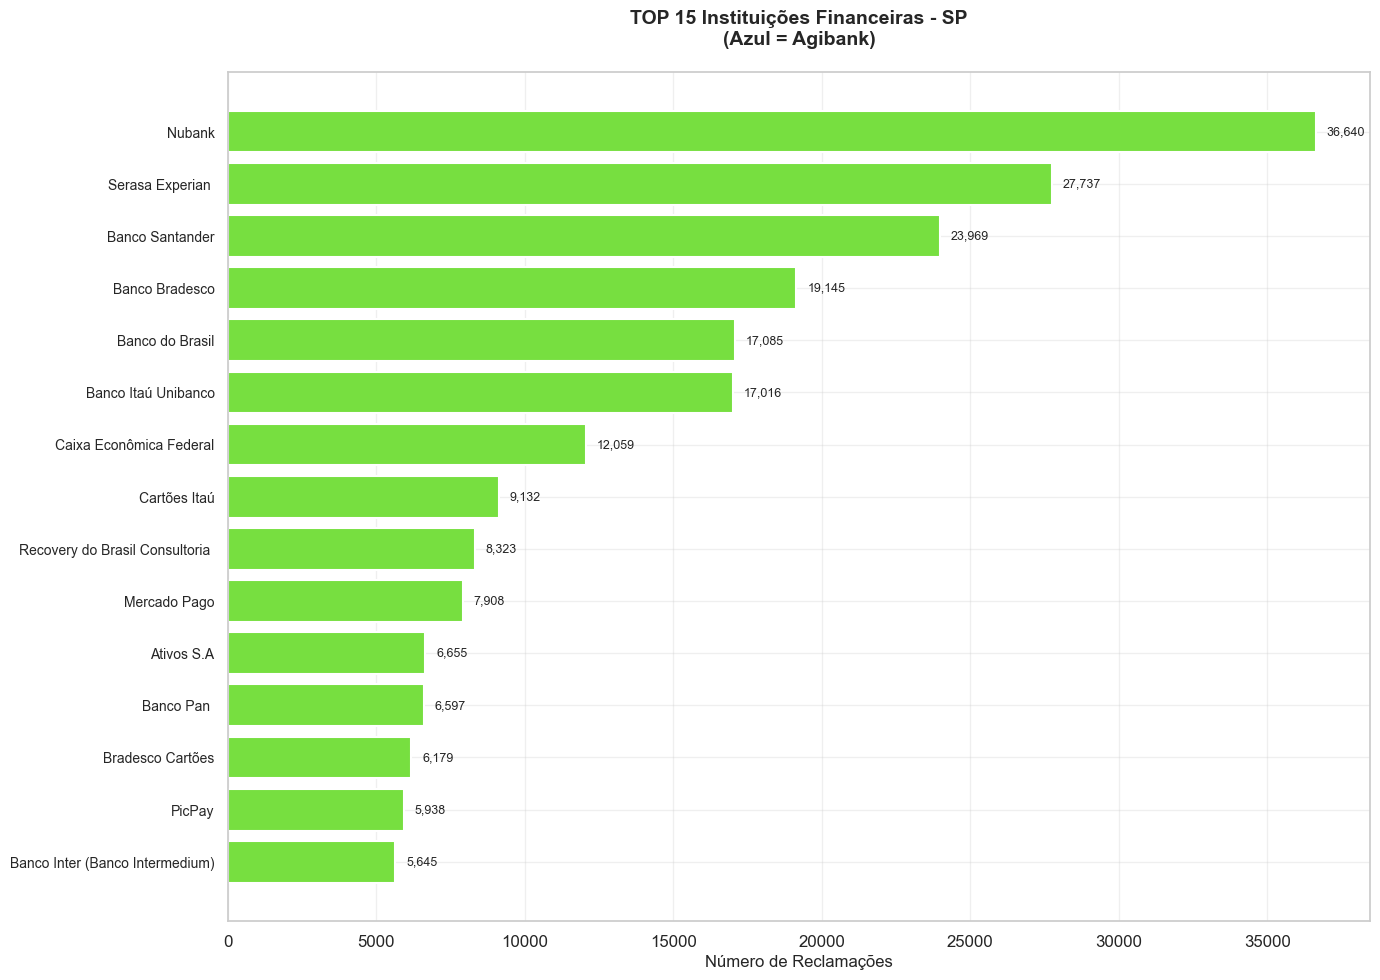

In [18]:
# CONTEXTUALIZAÇÃO PARTE 2: REPRESENTATIVIDADE E RANKING
# Posição do Agibank no mercado de SP

print("=" * 80)
print("2. REPRESENTATIVIDADE: POSIÇÃO NO MERCADO")
print("=" * 80)

# Conta quantas instituições existem no setor
if 'nome_fantasia' in df_sp_financeiro.columns:
    instituicoes_setor = df_sp_financeiro['nome_fantasia'].nunique()
    
    # Ranking de instituições
    ranking_instituicoes = df_sp_financeiro['nome_fantasia'].value_counts()
    
    print(f"\nINSTITUIÇÕES NO SETOR:")
    print(f"  Total de instituições financeiras em SP: {instituicoes_setor}")
    
    # Encontra posição do Agibank
    nomes_agibank = [nome for nome in ranking_instituicoes.index if 'agibank' in nome.lower()]
    
    if nomes_agibank:
        nome_agibank = nomes_agibank[0]
        posicao_agibank = list(ranking_instituicoes.index).index(nome_agibank) + 1
        reclamacoes_agibank_rank = ranking_instituicoes[nome_agibank]
        
        print(f"  Posição do Agibank no ranking:           {posicao_agibank}º lugar")
        print(f"  Reclamações do Agibank:                  {reclamacoes_agibank_rank:,}")
        
        # TOP 15
        print(f"\nTOP 15 INSTITUIÇÕES MAIS RECLAMADAS EM SP:")
        print("-" * 80)
        
        for i, (inst, qtd) in enumerate(ranking_instituicoes.head(15).items(), 1):
            pct_inst = (qtd / total_setor) * 100
            destaque = " <- AGIBANK" if 'agibank' in inst.lower() else ""
            print(f"  {i:2d}. {inst[:45]:<45} {qtd:>7,} ({pct_inst:>5.2f}%){destaque}")
        
        print(f"\nINTERPRETAÇÃO:")
        if posicao_agibank <= 5:
            print(f"  • O Agibank está entre os TOP 5 mais reclamados de SP")
            print(f"  • É uma instituição de GRANDE PORTE no estado")
            print(f"  • Alta visibilidade e base de clientes significativa")
        elif posicao_agibank <= 10:
            print(f"  • O Agibank está entre os TOP 10 mais reclamados de SP")
            print(f"  • É uma instituição de MÉDIO/GRANDE PORTE no estado")
            print(f"  • Relevância significativa no mercado paulista")
        elif posicao_agibank <= 20:
            print(f"  • O Agibank está entre os TOP 20 mais reclamados de SP")
            print(f"  • É uma instituição de MÉDIO PORTE no estado")
            print(f"  • Presença consolidada no mercado")
        else:
            print(f"  • O Agibank está na posição {posicao_agibank}º de {instituicoes_setor}")
            print(f"  • É uma instituição de PEQUENO/MÉDIO PORTE no estado")
            print(f"  • Nicho específico ou atuação regional")
        
        # Quantas instituições estão acima e abaixo
        acima = posicao_agibank - 1
        abaixo = instituicoes_setor - posicao_agibank
        
        print(f"\nCONTEXTO COMPETITIVO:")
        print(f"  • {acima} instituições têm MAIS reclamações que o Agibank")
        print(f"  • {abaixo} instituições têm MENOS reclamações que o Agibank")
        
        # Visualização do ranking
        fig, ax = plt.subplots(figsize=(14, 10))
        
        top15_nomes = ranking_instituicoes.head(15).index
        top15_valores = ranking_instituicoes.head(15).values
        
        cores_ranking = [CORES_AGIBANK['azul_principal'] if 'agibank' in nome.lower() 
                        else CORES_AGIBANK['verde'] 
                        for nome in top15_nomes]
        
        y_pos = np.arange(len(top15_nomes))
        ax.barh(y_pos, top15_valores, color=cores_ranking, edgecolor='white', linewidth=1.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels([nome[:40] + '...' if len(nome) > 40 else nome for nome in top15_nomes], 
                          fontsize=10)
        ax.invert_yaxis()
        ax.set_xlabel('Número de Reclamações', fontsize=12)
        ax.set_title('TOP 15 Instituições Financeiras - SP\n(Azul = Agibank)', 
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, (nome, valor) in enumerate(zip(top15_nomes, top15_valores)):
            label = f'{valor:,}'
            if 'agibank' in nome.lower():
                label += f' ({posicao_agibank}º lugar)'
            ax.text(valor + (max(top15_valores) * 0.01), i, label, 
                   va='center', fontsize=9, fontweight='bold' if 'agibank' in nome.lower() else 'normal')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("\nAVISO: Agibank não encontrado no ranking")
        print("Possíveis razões:")
        print("  • Nome da instituição pode estar diferente na base")
        print("  • Base pode não conter dados do Agibank")
else:
    print("\nERRO: Coluna 'nome_fantasia' não encontrada na base do setor")

3. SATISFAÇÃO: COMO O AGIBANK É AVALIADO

NOTAS MÉDIAS:
  Agibank:  1.83
  Setor SP: 2.25
  Diferença: -0.42 (-18.8%)

INTERPRETAÇÃO:
  • A satisfação com o Agibank é PIOR que o setor
  • Diferença de 0.42 pontos precisa de atenção
  • Oportunidade de melhoria identificada

CONTEXTO DE ESCALA:
  • Notas variam de 1 (péssimo) a 5 (excelente)
  • Amplitude total: 4 pontos
  • Diferença de 0.1 pontos = 2.5% da escala total
  • Diferença de 0.5 pontos = 12.5% da escala total
  • Diferença de 1.0 ponto  = 25.0% da escala total
  • Diferença atual: 0.42 pontos = 10.6% da escala


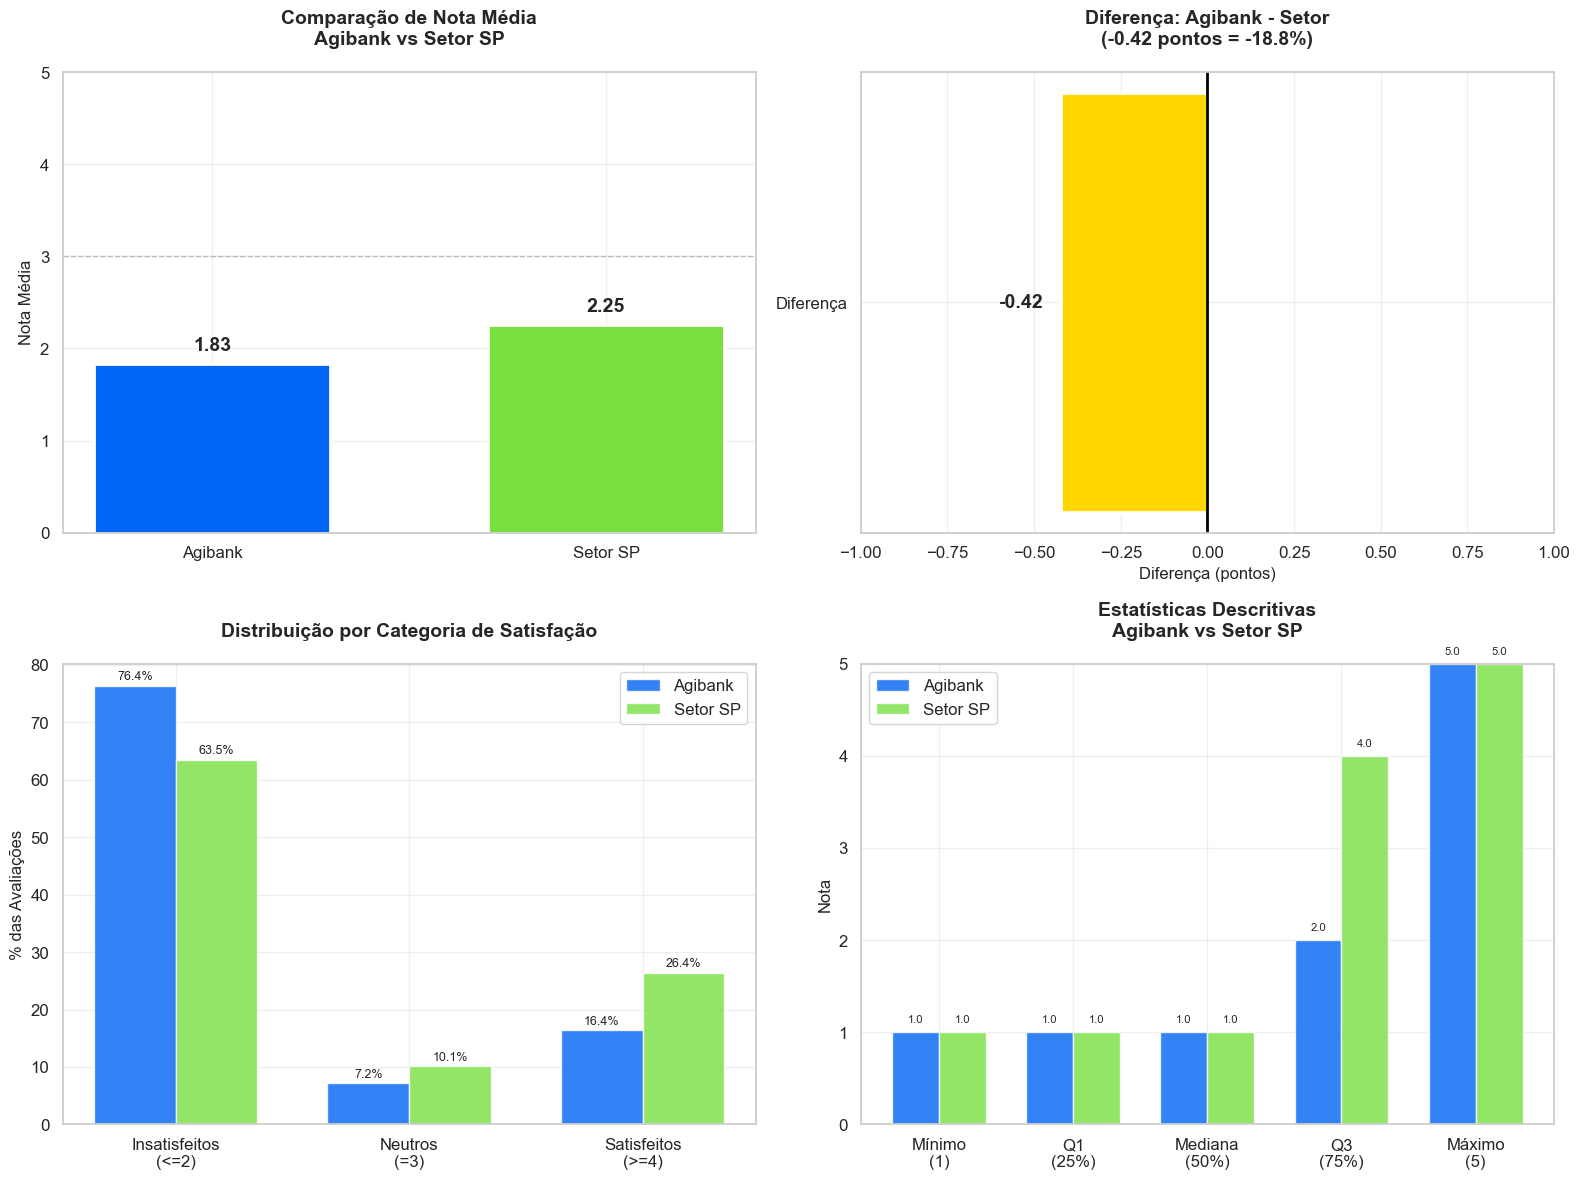

In [19]:
# CONTEXTUALIZAÇÃO PARTE 3: COMPARAÇÃO DE SATISFAÇÃO
# Entendendo as diferenças de nota entre Agibank e Setor

print("=" * 80)
print("3. SATISFAÇÃO: COMO O AGIBANK É AVALIADO")
print("=" * 80)

print(f"\nNOTAS MÉDIAS:")
print(f"  Agibank:  {nota_media_agi:.2f}")
print(f"  Setor SP: {nota_media_setor:.2f}")
print(f"  Diferença: {dif_media:+.2f} ({dif_percentual:+.1f}%)")

print(f"\nINTERPRETAÇÃO:")
if abs(dif_media) < 0.1:
    print(f"  • A satisfação com o Agibank é PRATICAMENTE IGUAL à média do setor")
    print(f"  • Diferença desprezível de apenas {abs(dif_media):.2f} pontos")
    print(f"  • Ambos performam de forma similar")
elif dif_media > 0.5:
    print(f"  • A satisfação com o Agibank é SIGNIFICATIVAMENTE MELHOR que o setor")
    print(f"  • Diferença de {dif_media:.2f} pontos é RELEVANTE")
    print(f"  • O Agibank está {dif_percentual:.1f}% acima da média")
    print(f"  • Indica vantagem competitiva em satisfação do cliente")
elif dif_media > 0.2:
    print(f"  • A satisfação com o Agibank é MELHOR que o setor")
    print(f"  • Diferença de {dif_media:.2f} pontos é positiva")
    print(f"  • O Agibank supera a média do mercado")
elif dif_media < -0.5:
    print(f"  • A satisfação com o Agibank é SIGNIFICATIVAMENTE PIOR que o setor")
    print(f"  • Diferença de {abs(dif_media):.2f} pontos é PREOCUPANTE")
    print(f"  • O Agibank está {abs(dif_percentual):.1f}% abaixo da média")
    print(f"  • Requer atenção urgente e ações corretivas")
elif dif_media < -0.2:
    print(f"  • A satisfação com o Agibank é PIOR que o setor")
    print(f"  • Diferença de {abs(dif_media):.2f} pontos precisa de atenção")
    print(f"  • Oportunidade de melhoria identificada")
else:
    print(f"  • A satisfação com o Agibank é LIGEIRAMENTE {'MELHOR' if dif_media > 0 else 'PIOR'} que o setor")
    print(f"  • Diferença pequena de {abs(dif_media):.2f} pontos")
    print(f"  • Performance dentro do esperado para o mercado")

print(f"\nCONTEXTO DE ESCALA:")
print(f"  • Notas variam de 1 (péssimo) a 5 (excelente)")
print(f"  • Amplitude total: 4 pontos")
print(f"  • Diferença de 0.1 pontos = {0.1/4*100:.1f}% da escala total")
print(f"  • Diferença de 0.5 pontos = {0.5/4*100:.1f}% da escala total")
print(f"  • Diferença de 1.0 ponto  = {1.0/4*100:.1f}% da escala total")
print(f"  • Diferença atual: {abs(dif_media):.2f} pontos = {abs(dif_media)/4*100:.1f}% da escala")

# Visualização comparativa
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação de notas médias
categorias = ['Agibank', 'Setor SP']
notas = [nota_media_agi, nota_media_setor]
cores = [CORES_AGIBANK['azul_principal'], CORES_AGIBANK['verde']]

bars = ax1.bar(categorias, notas, color=cores, edgecolor='white', linewidth=2, width=0.6)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_title('Comparação de Nota Média\nAgibank vs Setor SP', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0, 5)
ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.grid(True, alpha=0.3, axis='y')

for i, (bar, nota) in enumerate(zip(bars, notas)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{nota:.2f}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Gráfico 2: Diferença absoluta
ax2.barh(['Diferença'], [dif_media], 
         color=CORES_AGIBANK['verde'] if dif_media > 0 else CORES_AGIBANK['amarelo'],
         edgecolor='white', linewidth=2, height=0.5)
ax2.axvline(x=0, color='black', linewidth=2)
ax2.set_xlabel('Diferença (pontos)', fontsize=12)
ax2.set_title(f'Diferença: Agibank - Setor\n({dif_media:+.2f} pontos = {dif_percentual:+.1f}%)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlim(-1, 1)
ax2.grid(True, alpha=0.3, axis='x')
ax2.text(dif_media + (0.05 if dif_media > 0 else -0.05), 0, 
        f'{dif_media:+.2f}',
        ha='left' if dif_media > 0 else 'right', va='center', 
        fontsize=14, fontweight='bold')

# Gráfico 3: Distribuição de categorias
categorias_sat = ['Insatisfeitos\n(<=2)', 'Neutros\n(=3)', 'Satisfeitos\n(>=4)']
agibank_dist = [pct_insat_agi, pct_neutro_agi, pct_sat_agi]
setor_dist = [pct_insat_setor, pct_neutro_setor, pct_sat_setor]

x = np.arange(len(categorias_sat))
width = 0.35

bars1 = ax3.bar(x - width/2, agibank_dist, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax3.bar(x + width/2, setor_dist, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax3.set_ylabel('% das Avaliações', fontsize=12)
ax3.set_title('Distribuição por Categoria de Satisfação', 
              fontsize=14, fontweight='bold', pad=20)
ax3.set_xticks(x)
ax3.set_xticklabels(categorias_sat)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(agibank_dist, setor_dist)):
    ax3.text(i - width/2, v1 + 1, f'{v1:.1f}%', ha='center', fontsize=9)
    ax3.text(i + width/2, v2 + 1, f'{v2:.1f}%', ha='center', fontsize=9)

# Gráfico 4: Mediana e quartis (boxplot simulado com barras)
metricas = ['Mínimo\n(1)', 'Q1\n(25%)', 'Mediana\n(50%)', 'Q3\n(75%)', 'Máximo\n(5)']
agibank_stats = [
    np.min(arr_nota_agibank_valida),
    np.percentile(arr_nota_agibank_valida, 25),
    nota_mediana_agi,
    np.percentile(arr_nota_agibank_valida, 75),
    np.max(arr_nota_agibank_valida)
]
setor_stats = [
    np.min(arr_nota_setor_valida),
    np.percentile(arr_nota_setor_valida, 25),
    nota_mediana_setor,
    np.percentile(arr_nota_setor_valida, 75),
    np.max(arr_nota_setor_valida)
]

x2 = np.arange(len(metricas))
bars1 = ax4.bar(x2 - width/2, agibank_stats, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax4.bar(x2 + width/2, setor_stats, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax4.set_ylabel('Nota', fontsize=12)
ax4.set_title('Estatísticas Descritivas\nAgibank vs Setor SP', 
              fontsize=14, fontweight='bold', pad=20)
ax4.set_xticks(x2)
ax4.set_xticklabels(metricas)
ax4.set_ylim(0, 5)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(agibank_stats, setor_stats)):
    ax4.text(i - width/2, v1 + 0.1, f'{v1:.1f}', ha='center', fontsize=8)
    ax4.text(i + width/2, v2 + 0.1, f'{v2:.1f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [22]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 1
# Volumetria e contexto geral

print("=" * 80)
print("ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO")
print("=" * 80)

print("\nOBJETIVO:")
print("  Identificar os fatores que levam clientes a darem notas baixas (1 e 2)")
print("  Comparar Agibank vs Setor para entender padrões de insatisfação")

# Separa registros com notas baixas (insatisfeitos)
mask_insat_agi = arr_nota <= 2
mask_insat_setor = arr_nota_setor <= 2

# Separa registros com notas altas (satisfeitos)
mask_sat_agi = arr_nota >= 4
mask_sat_setor = arr_nota_setor >= 4

total_insat_agi = np.sum(mask_insat_agi)
total_sat_agi = np.sum(mask_sat_agi)

total_insat_setor = np.sum(mask_insat_setor)
total_sat_setor = np.sum(mask_sat_setor)

print(f"\n1. VOLUMETRIA:")
print("-" * 80)
print(f"                    AGIBANK         SETOR SP        DIFERENÇA")
print(f"  Insatisfeitos:    {total_insat_agi:>5,} ({pct_insat_agi:>5.1f}%)    {total_insat_setor:>7,} ({pct_insat_setor:>5.1f}%)    {pct_insat_agi - pct_insat_setor:>+6.1f}pp")
print(f"  Satisfeitos:      {total_sat_agi:>5,} ({pct_sat_agi:>5.1f}%)    {total_sat_setor:>7,} ({pct_sat_setor:>5.1f}%)    {pct_sat_agi - pct_sat_setor:>+6.1f}pp")

print(f"\nCONTEXTO:")
if pct_insat_agi > pct_insat_setor + 5:
    print(f"  ALERTA: Agibank tem {pct_insat_agi - pct_insat_setor:.1f}pp A MAIS de insatisfeitos")
    print(f"  Nível de insatisfação ACIMA da média do mercado")
elif pct_insat_agi > pct_insat_setor:
    print(f"  ATENÇÃO: Agibank tem {pct_insat_agi - pct_insat_setor:.1f}pp mais insatisfeitos")
    print(f"  Ligeiramente acima da média do mercado")
elif pct_insat_agi < pct_insat_setor - 5:
    print(f"  POSITIVO: Agibank tem {abs(pct_insat_agi - pct_insat_setor):.1f}pp MENOS insatisfeitos")
    print(f"  Nível de insatisfação ABAIXO da média do mercado")
else:
    print(f"  Agibank tem nível de insatisfação SIMILAR ao mercado")
    print(f"  Diferença de apenas {abs(pct_insat_agi - pct_insat_setor):.1f}pp")

ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO

OBJETIVO:
  Identificar os fatores que levam clientes a darem notas baixas (1 e 2)
  Comparar Agibank vs Setor para entender padrões de insatisfação

1. VOLUMETRIA:
--------------------------------------------------------------------------------
                    AGIBANK         SETOR SP        DIFERENÇA
  Insatisfeitos:      805 ( 76.4%)     50,256 ( 63.5%)     +12.9pp
  Satisfeitos:        173 ( 16.4%)     20,887 ( 26.4%)     -10.0pp

CONTEXTO:
  ALERTA: Agibank tem 12.9pp A MAIS de insatisfeitos
  Nível de insatisfação ACIMA da média do mercado


In [23]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 2
# Fator 1: Tempo de Resposta

print("=" * 80)
print("FATOR 1: TEMPO DE RESPOSTA")
print("=" * 80)

# Tempo médio para insatisfeitos
tempo_insat_agi = df_agibank.loc[mask_insat_agi, 'tempo_resposta'].to_numpy()
tempo_insat_agi_limpo = tempo_insat_agi[~np.isnan(tempo_insat_agi)]
tempo_medio_insat_agi = np.mean(tempo_insat_agi_limpo) if len(tempo_insat_agi_limpo) > 0 else 0

tempo_insat_setor = df_sp_financeiro.loc[mask_insat_setor, 'tempo_resposta'].to_numpy()
tempo_insat_setor_limpo = tempo_insat_setor[~np.isnan(tempo_insat_setor)]
tempo_medio_insat_setor = np.mean(tempo_insat_setor_limpo) if len(tempo_insat_setor_limpo) > 0 else 0

# Tempo médio para satisfeitos
tempo_sat_agi = df_agibank.loc[mask_sat_agi, 'tempo_resposta'].to_numpy()
tempo_sat_agi_limpo = tempo_sat_agi[~np.isnan(tempo_sat_agi)]
tempo_medio_sat_agi = np.mean(tempo_sat_agi_limpo) if len(tempo_sat_agi_limpo) > 0 else 0

tempo_sat_setor = df_sp_financeiro.loc[mask_sat_setor, 'tempo_resposta'].to_numpy()
tempo_sat_setor_limpo = tempo_sat_setor[~np.isnan(tempo_sat_setor)]
tempo_medio_sat_setor = np.mean(tempo_sat_setor_limpo) if len(tempo_sat_setor_limpo) > 0 else 0

# Diferença de tempo
dif_tempo_agi = tempo_medio_insat_agi - tempo_medio_sat_agi
dif_tempo_setor = tempo_medio_insat_setor - tempo_medio_sat_setor

print(f"\nTEMPO MÉDIO DE RESPOSTA (dias):")
print(f"                    AGIBANK    SETOR SP    DIFERENÇA")
print(f"  Insatisfeitos:    {tempo_medio_insat_agi:>6.1f}     {tempo_medio_insat_setor:>6.1f}      {tempo_medio_insat_agi - tempo_medio_insat_setor:>+6.1f}")
print(f"  Satisfeitos:      {tempo_medio_sat_agi:>6.1f}     {tempo_medio_sat_setor:>6.1f}      {tempo_medio_sat_agi - tempo_medio_sat_setor:>+6.1f}")
print(f"  Diferença:        {dif_tempo_agi:>+6.1f}     {dif_tempo_setor:>+6.1f}")

print(f"\nINTERPRETAÇÃO:")
if dif_tempo_agi > 2:
    print(f"  CRÍTICO: Insatisfeitos esperam {dif_tempo_agi:.1f} dias A MAIS que satisfeitos")
    print(f"  O tempo de resposta é um FATOR CRÍTICO de insatisfação no Agibank")
elif dif_tempo_agi > 1:
    print(f"  ATENÇÃO: Insatisfeitos esperam {dif_tempo_agi:.1f} dias a mais")
    print(f"  O tempo de resposta impacta a satisfação")
else:
    print(f"  Diferença de tempo é pequena ({dif_tempo_agi:.1f} dias)")
    print(f"  Tempo NÃO é o principal fator de insatisfação")

# Comparação com setor
print(f"\nCOMPARAÇÃO COM SETOR:")
if dif_tempo_agi > dif_tempo_setor + 1:
    print(f"  O impacto do tempo no Agibank ({dif_tempo_agi:.1f} dias) é MAIOR que no setor ({dif_tempo_setor:.1f} dias)")
    print(f"  Clientes do Agibank são MAIS sensíveis ao tempo de espera")
elif dif_tempo_agi < dif_tempo_setor - 1:
    print(f"  O impacto do tempo no Agibank ({dif_tempo_agi:.1f} dias) é MENOR que no setor ({dif_tempo_setor:.1f} dias)")
    print(f"  Clientes do Agibank são MENOS sensíveis ao tempo de espera")
else:
    print(f"  O impacto do tempo é SIMILAR ao setor")

FATOR 1: TEMPO DE RESPOSTA

TEMPO MÉDIO DE RESPOSTA (dias):
                    AGIBANK    SETOR SP    DIFERENÇA
  Insatisfeitos:       6.6        6.0        +0.6
  Satisfeitos:         6.5        5.8        +0.7
  Diferença:          +0.1       +0.2

INTERPRETAÇÃO:
  Diferença de tempo é pequena (0.1 dias)
  Tempo NÃO é o principal fator de insatisfação

COMPARAÇÃO COM SETOR:
  O impacto do tempo é SIMILAR ao setor


In [24]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 3
# Fator 2: Resolução do Problema

print("=" * 80)
print("FATOR 2: RESOLUÇÃO DO PROBLEMA")
print("=" * 80)

# Taxa de resolução para insatisfeitos
aval_insat_agi = df_agibank.loc[mask_insat_agi, 'avaliacao_reclamacao'].to_numpy()
resolvidas_insat_agi = np.sum(aval_insat_agi == 'Resolvida')
total_aval_insat_agi = np.sum(~pd.isna(aval_insat_agi))
taxa_resol_insat_agi = (resolvidas_insat_agi / total_aval_insat_agi * 100) if total_aval_insat_agi > 0 else 0

aval_insat_setor = df_sp_financeiro.loc[mask_insat_setor, 'avaliacao_reclamacao'].to_numpy()
resolvidas_insat_setor = np.sum(aval_insat_setor == 'Resolvida')
total_aval_insat_setor = np.sum(~pd.isna(aval_insat_setor))
taxa_resol_insat_setor = (resolvidas_insat_setor / total_aval_insat_setor * 100) if total_aval_insat_setor > 0 else 0

# Taxa de resolução para satisfeitos
aval_sat_agi = df_agibank.loc[mask_sat_agi, 'avaliacao_reclamacao'].to_numpy()
resolvidas_sat_agi = np.sum(aval_sat_agi == 'Resolvida')
total_aval_sat_agi = np.sum(~pd.isna(aval_sat_agi))
taxa_resol_sat_agi = (resolvidas_sat_agi / total_aval_sat_agi * 100) if total_aval_sat_agi > 0 else 0

aval_sat_setor = df_sp_financeiro.loc[mask_sat_setor, 'avaliacao_reclamacao'].to_numpy()
resolvidas_sat_setor = np.sum(aval_sat_setor == 'Resolvida')
total_aval_sat_setor = np.sum(~pd.isna(aval_sat_setor))
taxa_resol_sat_setor = (resolvidas_sat_setor / total_aval_sat_setor * 100) if total_aval_sat_setor > 0 else 0

# Diferença de resolução
dif_resol_agi = taxa_resol_sat_agi - taxa_resol_insat_agi
dif_resol_setor = taxa_resol_sat_setor - taxa_resol_insat_setor

print(f"\nTAXA DE RESOLUÇÃO (%):")
print(f"                    AGIBANK    SETOR SP    DIFERENÇA")
print(f"  Insatisfeitos:    {taxa_resol_insat_agi:>6.1f}%    {taxa_resol_insat_setor:>6.1f}%     {taxa_resol_insat_agi - taxa_resol_insat_setor:>+6.1f}pp")
print(f"  Satisfeitos:      {taxa_resol_sat_agi:>6.1f}%    {taxa_resol_sat_setor:>6.1f}%     {taxa_resol_sat_agi - taxa_resol_sat_setor:>+6.1f}pp")
print(f"  Diferença:        {dif_resol_agi:>+6.1f}pp   {dif_resol_setor:>+6.1f}pp")

print(f"\nINTERPRETAÇÃO:")
if dif_resol_agi > 50:
    print(f"  FORTE CORRELAÇÃO: Resolver o problema aumenta satisfação em {dif_resol_agi:.1f}pp")
    print(f"  Resolução é FATOR CRÍTICO para satisfação no Agibank")
elif dif_resol_agi > 30:
    print(f"  CORRELAÇÃO RELEVANTE: Resolver aumenta satisfação em {dif_resol_agi:.1f}pp")
    print(f"  Resolução impacta significativamente a satisfação")
else:
    print(f"  CORRELAÇÃO FRACA: Diferença de apenas {dif_resol_agi:.1f}pp")
    print(f"  Mesmo resolvendo, clientes continuam insatisfeitos")

# Comparação com setor
print(f"\nCOMPARAÇÃO COM SETOR:")
if dif_resol_agi > dif_resol_setor + 10:
    print(f"  O impacto da resolução no Agibank ({dif_resol_agi:.1f}pp) é MAIOR que no setor ({dif_resol_setor:.1f}pp)")
    print(f"  Resolver o problema é MAIS importante para clientes do Agibank")
elif dif_resol_agi < dif_resol_setor - 10:
    print(f"  O impacto da resolução no Agibank ({dif_resol_agi:.1f}pp) é MENOR que no setor ({dif_resol_setor:.1f}pp)")
    print(f"  Outros fatores pesam mais na satisfação do Agibank")
else:
    print(f"  O impacto da resolução é SIMILAR ao setor")

FATOR 2: RESOLUÇÃO DO PROBLEMA

TAXA DE RESOLUÇÃO (%):
                    AGIBANK    SETOR SP    DIFERENÇA
  Insatisfeitos:       6.0%       6.7%       -0.8pp
  Satisfeitos:        78.0%      85.0%       -7.0pp
  Diferença:         +72.1pp    +78.3pp

INTERPRETAÇÃO:
  FORTE CORRELAÇÃO: Resolver o problema aumenta satisfação em 72.1pp
  Resolução é FATOR CRÍTICO para satisfação no Agibank

COMPARAÇÃO COM SETOR:
  O impacto da resolução é SIMILAR ao setor


In [25]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 4
# Fator 3: Procurou a Empresa Antes

print("=" * 80)
print("FATOR 3: PROCUROU A EMPRESA ANTES?")
print("=" * 80)

# % que procurou entre insatisfeitos
procurou_insat_agi = df_agibank.loc[mask_insat_agi, 'procurou_empresa'].to_numpy()
procurou_sim_insat_agi = np.sum(procurou_insat_agi == 'S')
pct_procurou_insat_agi = (procurou_sim_insat_agi / len(procurou_insat_agi) * 100) if len(procurou_insat_agi) > 0 else 0

procurou_insat_setor = df_sp_financeiro.loc[mask_insat_setor, 'procurou_empresa'].to_numpy()
procurou_sim_insat_setor = np.sum(procurou_insat_setor == 'S')
pct_procurou_insat_setor = (procurou_sim_insat_setor / len(procurou_insat_setor) * 100) if len(procurou_insat_setor) > 0 else 0

# % que procurou entre satisfeitos
procurou_sat_agi = df_agibank.loc[mask_sat_agi, 'procurou_empresa'].to_numpy()
procurou_sim_sat_agi = np.sum(procurou_sat_agi == 'S')
pct_procurou_sat_agi = (procurou_sim_sat_agi / len(procurou_sat_agi) * 100) if len(procurou_sat_agi) > 0 else 0

procurou_sat_setor = df_sp_financeiro.loc[mask_sat_setor, 'procurou_empresa'].to_numpy()
procurou_sim_sat_setor = np.sum(procurou_sat_setor == 'S')
pct_procurou_sat_setor = (procurou_sim_sat_setor / len(procurou_sat_setor) * 100) if len(procurou_sat_setor) > 0 else 0

# Diferença
dif_procurou_agi = pct_procurou_insat_agi - pct_procurou_sat_agi
dif_procurou_setor = pct_procurou_insat_setor - pct_procurou_sat_setor

print(f"\n% QUE PROCUROU A EMPRESA ANTES:")
print(f"                    AGIBANK    SETOR SP    DIFERENÇA")
print(f"  Insatisfeitos:    {pct_procurou_insat_agi:>6.1f}%    {pct_procurou_insat_setor:>6.1f}%     {pct_procurou_insat_agi - pct_procurou_insat_setor:>+6.1f}pp")
print(f"  Satisfeitos:      {pct_procurou_sat_agi:>6.1f}%    {pct_procurou_sat_setor:>6.1f}%     {pct_procurou_sat_agi - pct_procurou_sat_setor:>+6.1f}pp")
print(f"  Diferença:        {dif_procurou_agi:>+6.1f}pp   {dif_procurou_setor:>+6.1f}pp")

print(f"\nINTERPRETAÇÃO:")
if dif_procurou_agi > 10:
    print(f"  ALERTA: Insatisfeitos procuraram {dif_procurou_agi:.1f}pp A MAIS a empresa antes")
    print(f"  O SAC/atendimento do Agibank NÃO está resolvendo os problemas")
    print(f"  Clientes tentam resolver e AINDA ASSIM ficam insatisfeitos")
elif dif_procurou_agi > 5:
    print(f"  ATENÇÃO: Insatisfeitos procuraram mais a empresa ({dif_procurou_agi:.1f}pp)")
    print(f"  O atendimento direto não está sendo eficaz")
elif abs(dif_procurou_agi) < 5:
    print(f"  Diferença pequena ({dif_procurou_agi:.1f}pp)")
    print(f"  Procurar a empresa não tem relação forte com satisfação")
else:
    print(f"  Satisfeitos procuraram mais a empresa ({abs(dif_procurou_agi):.1f}pp)")
    print(f"  O atendimento direto está funcionando bem")

# Comparação com setor
print(f"\nCOMPARAÇÃO COM SETOR:")
if abs(dif_procurou_agi) > abs(dif_procurou_setor) + 5:
    print(f"  O impacto de procurar antes no Agibank ({dif_procurou_agi:+.1f}pp) é MAIOR que no setor ({dif_procurou_setor:+.1f}pp)")
    if dif_procurou_agi > 0:
        print(f"  O SAC do Agibank está PIOR que a média do mercado")
    else:
        print(f"  O SAC do Agibank está MELHOR que a média do mercado")
else:
    print(f"  O impacto é SIMILAR ao setor")

FATOR 3: PROCUROU A EMPRESA ANTES?

% QUE PROCUROU A EMPRESA ANTES:
                    AGIBANK    SETOR SP    DIFERENÇA
  Insatisfeitos:      87.1%      76.9%      +10.2pp
  Satisfeitos:        88.4%      67.9%      +20.5pp
  Diferença:          -1.4pp     +9.0pp

INTERPRETAÇÃO:
  Diferença pequena (-1.4pp)
  Procurar a empresa não tem relação forte com satisfação

COMPARAÇÃO COM SETOR:
  O impacto é SIMILAR ao setor


VISUALIZAÇÃO: FATORES DE INSATISFAÇÃO


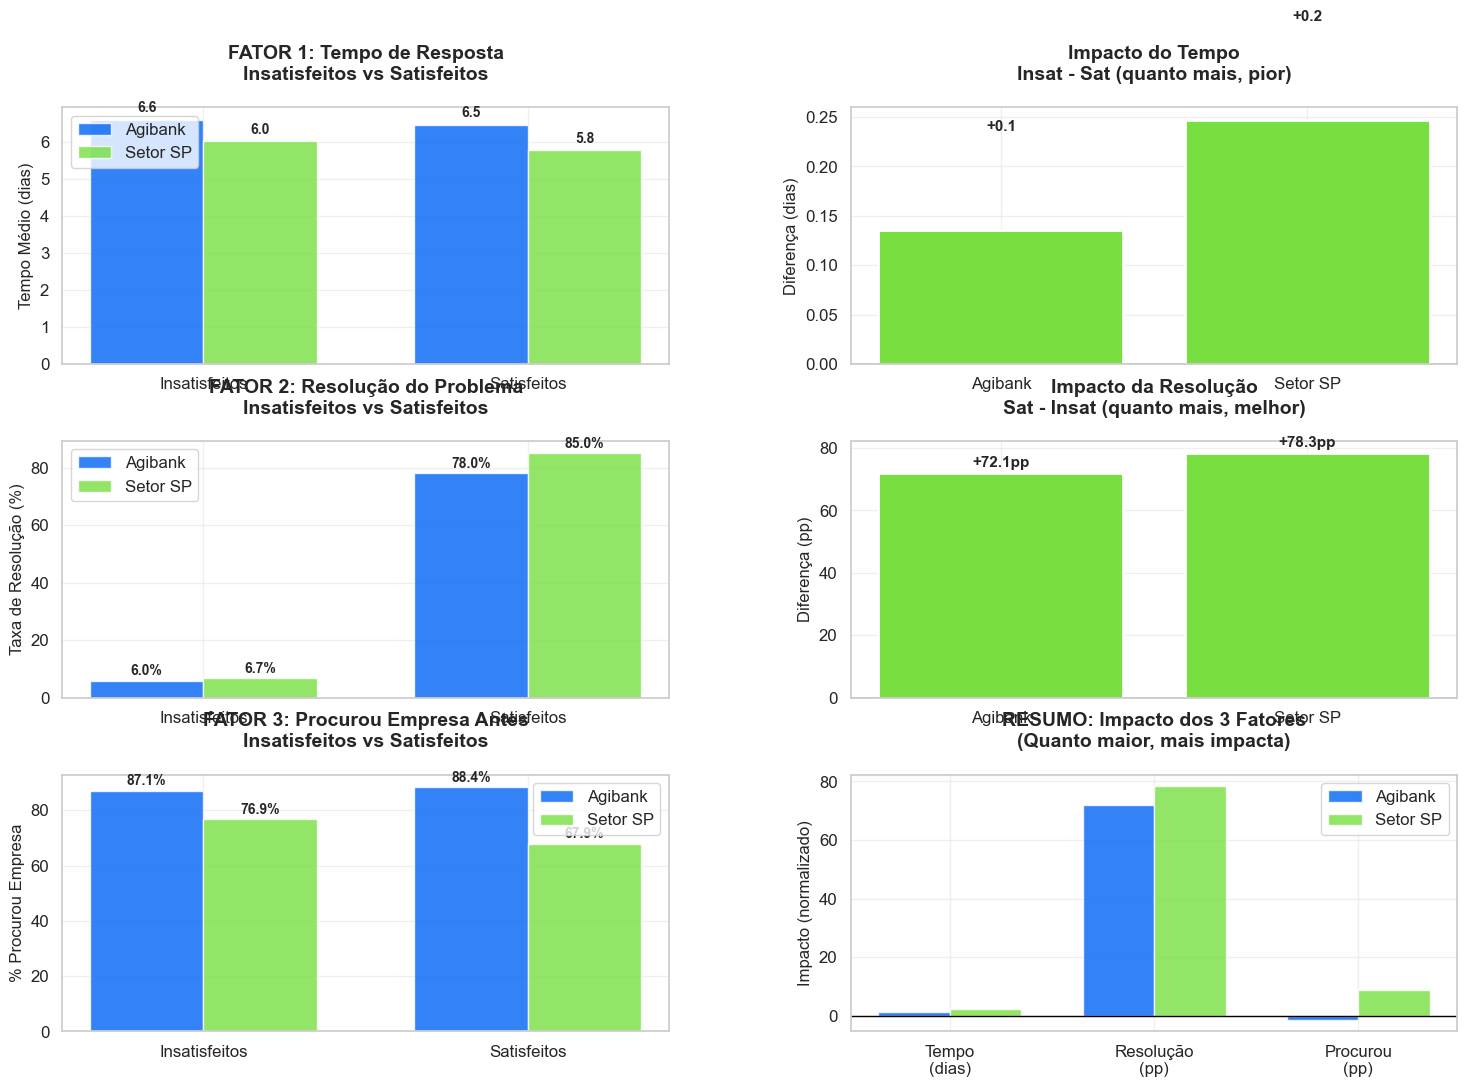

In [26]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 5
# Visualização consolidada de todos os fatores

print("=" * 80)
print("VISUALIZAÇÃO: FATORES DE INSATISFAÇÃO")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Gráfico 1: Comparação de Tempo
ax1 = fig.add_subplot(gs[0, 0])

categorias_tempo = ['Insatisfeitos', 'Satisfeitos']
agibank_tempo = [tempo_medio_insat_agi, tempo_medio_sat_agi]
setor_tempo = [tempo_medio_insat_setor, tempo_medio_sat_setor]

x = np.arange(len(categorias_tempo))
width = 0.35

bars1 = ax1.bar(x - width/2, agibank_tempo, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax1.bar(x + width/2, setor_tempo, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax1.set_ylabel('Tempo Médio (dias)', fontsize=12)
ax1.set_title('FATOR 1: Tempo de Resposta\nInsatisfeitos vs Satisfeitos', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(categorias_tempo)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(agibank_tempo, setor_tempo)):
    ax1.text(i - width/2, v1 + 0.2, f'{v1:.1f}', ha='center', fontsize=10, fontweight='bold')
    ax1.text(i + width/2, v2 + 0.2, f'{v2:.1f}', ha='center', fontsize=10, fontweight='bold')

# Gráfico 2: Diferença de Tempo
ax2 = fig.add_subplot(gs[0, 1])

categorias_dif = ['Agibank', 'Setor SP']
diferencas_tempo = [dif_tempo_agi, dif_tempo_setor]
cores_dif_tempo = [CORES_AGIBANK['amarelo'] if d > 1 else CORES_AGIBANK['verde'] for d in diferencas_tempo]

ax2.bar(categorias_dif, diferencas_tempo, color=cores_dif_tempo, edgecolor='white', linewidth=2)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.set_ylabel('Diferença (dias)', fontsize=12)
ax2.set_title('Impacto do Tempo\nInsat - Sat (quanto mais, pior)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='y')

for i, (cat, dif) in enumerate(zip(categorias_dif, diferencas_tempo)):
    ax2.text(i, dif + 0.1, f'{dif:+.1f}', ha='center', fontsize=11, fontweight='bold')

# Gráfico 3: Comparação de Resolução
ax3 = fig.add_subplot(gs[1, 0])

categorias_resol = ['Insatisfeitos', 'Satisfeitos']
agibank_resol = [taxa_resol_insat_agi, taxa_resol_sat_agi]
setor_resol = [taxa_resol_insat_setor, taxa_resol_sat_setor]

bars1 = ax3.bar(x - width/2, agibank_resol, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax3.bar(x + width/2, setor_resol, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax3.set_ylabel('Taxa de Resolução (%)', fontsize=12)
ax3.set_title('FATOR 2: Resolução do Problema\nInsatisfeitos vs Satisfeitos', 
              fontsize=14, fontweight='bold', pad=20)
ax3.set_xticks(x)
ax3.set_xticklabels(categorias_resol)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(agibank_resol, setor_resol)):
    ax3.text(i - width/2, v1 + 2, f'{v1:.1f}%', ha='center', fontsize=10, fontweight='bold')
    ax3.text(i + width/2, v2 + 2, f'{v2:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Gráfico 4: Diferença de Resolução
ax4 = fig.add_subplot(gs[1, 1])

diferencas_resol = [dif_resol_agi, dif_resol_setor]
cores_dif_resol = [CORES_AGIBANK['verde'] if d > 30 else CORES_AGIBANK['amarelo'] for d in diferencas_resol]

ax4.bar(categorias_dif, diferencas_resol, color=cores_dif_resol, edgecolor='white', linewidth=2)
ax4.axhline(y=0, color='black', linewidth=1)
ax4.set_ylabel('Diferença (pp)', fontsize=12)
ax4.set_title('Impacto da Resolução\nSat - Insat (quanto mais, melhor)', 
              fontsize=14, fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, axis='y')

for i, (cat, dif) in enumerate(zip(categorias_dif, diferencas_resol)):
    ax4.text(i, dif + 2, f'{dif:+.1f}pp', ha='center', fontsize=11, fontweight='bold')

# Gráfico 5: Comparação de % Procurou
ax5 = fig.add_subplot(gs[2, 0])

categorias_procurou = ['Insatisfeitos', 'Satisfeitos']
agibank_procurou = [pct_procurou_insat_agi, pct_procurou_sat_agi]
setor_procurou = [pct_procurou_insat_setor, pct_procurou_sat_setor]

bars1 = ax5.bar(x - width/2, agibank_procurou, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax5.bar(x + width/2, setor_procurou, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax5.set_ylabel('% Procurou Empresa', fontsize=12)
ax5.set_title('FATOR 3: Procurou Empresa Antes\nInsatisfeitos vs Satisfeitos', 
              fontsize=14, fontweight='bold', pad=20)
ax5.set_xticks(x)
ax5.set_xticklabels(categorias_procurou)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

for i, (v1, v2) in enumerate(zip(agibank_procurou, setor_procurou)):
    ax5.text(i - width/2, v1 + 2, f'{v1:.1f}%', ha='center', fontsize=10, fontweight='bold')
    ax5.text(i + width/2, v2 + 2, f'{v2:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Gráfico 6: Resumo dos 3 Fatores
ax6 = fig.add_subplot(gs[2, 1])

fatores = ['Tempo\n(dias)', 'Resolução\n(pp)', 'Procurou\n(pp)']
impacto_agi = [dif_tempo_agi, dif_resol_agi, dif_procurou_agi]
impacto_setor = [dif_tempo_setor, dif_resol_setor, dif_procurou_setor]

# Normaliza para comparação visual (escala 0-100)
# Tempo: normaliza para 0-10 dias
# Resolução: já está em pp (0-100)
# Procurou: já está em pp (0-100)
impacto_agi_norm = [
    dif_tempo_agi * 10,  # multiplica por 10 para visualização
    dif_resol_agi,
    dif_procurou_agi
]
impacto_setor_norm = [
    dif_tempo_setor * 10,
    dif_resol_setor,
    dif_procurou_setor
]

x_fatores = np.arange(len(fatores))
bars1 = ax6.bar(x_fatores - width/2, impacto_agi_norm, width, label='Agibank',
               color=CORES_AGIBANK['azul_principal'], alpha=0.8)
bars2 = ax6.bar(x_fatores + width/2, impacto_setor_norm, width, label='Setor SP',
               color=CORES_AGIBANK['verde'], alpha=0.8)

ax6.set_ylabel('Impacto (normalizado)', fontsize=12)
ax6.set_title('RESUMO: Impacto dos 3 Fatores\n(Quanto maior, mais impacta)', 
              fontsize=14, fontweight='bold', pad=20)
ax6.set_xticks(x_fatores)
ax6.set_xticklabels(fatores)
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')
ax6.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

In [28]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 6.1
# Classificação e resumo dos fatores

print("=" * 80)
print("SÍNTESE: FATORES DE INSATISFAÇÃO")
print("=" * 80)

print("\nRESUMO DOS 3 FATORES ANALISADOS:")
print("-" * 80)

# Classifica cada fator
def classificar_impacto(diferenca, tipo='tempo'):
    if tipo == 'tempo':
        if diferenca > 2:
            return "CRÍTICO"
        elif diferenca > 1:
            return "ALTO"
        elif diferenca > 0.5:
            return "MODERADO"
        else:
            return "BAIXO"
    elif tipo == 'resolucao':
        if diferenca > 50:
            return "CRÍTICO"
        elif diferenca > 30:
            return "ALTO"
        elif diferenca > 15:
            return "MODERADO"
        else:
            return "BAIXO"
    else:  # procurou
        if abs(diferenca) > 10:
            return "CRÍTICO"
        elif abs(diferenca) > 5:
            return "ALTO"
        elif abs(diferenca) > 2:
            return "MODERADO"
        else:
            return "BAIXO"

impacto_tempo = classificar_impacto(dif_tempo_agi, 'tempo')
impacto_resolucao = classificar_impacto(dif_resol_agi, 'resolucao')
impacto_procurou = classificar_impacto(dif_procurou_agi, 'procurou')

print(f"\n1. TEMPO DE RESPOSTA:")
print(f"   Diferença: {dif_tempo_agi:+.1f} dias (Insat vs Sat)")
print(f"   Impacto: {impacto_tempo}")
print(f"   Setor: {dif_tempo_setor:+.1f} dias")
if dif_tempo_agi > dif_tempo_setor + 0.5:
    print(f"   → Agibank PIOR que o setor")
elif dif_tempo_agi < dif_tempo_setor - 0.5:
    print(f"   → Agibank MELHOR que o setor")
else:
    print(f"   → Similar ao setor")

print(f"\n2. RESOLUÇÃO DO PROBLEMA:")
print(f"   Diferença: {dif_resol_agi:+.1f}pp (Sat vs Insat)")
print(f"   Impacto: {impacto_resolucao}")
print(f"   Setor: {dif_resol_setor:+.1f}pp")
if dif_resol_agi > dif_resol_setor + 10:
    print(f"   → Resolver é MAIS importante no Agibank")
elif dif_resol_agi < dif_resol_setor - 10:
    print(f"   → Resolver é MENOS importante no Agibank")
else:
    print(f"   → Similar ao setor")

print(f"\n3. PROCUROU EMPRESA ANTES:")
print(f"   Diferença: {dif_procurou_agi:+.1f}pp (Insat vs Sat)")
print(f"   Impacto: {impacto_procurou}")
print(f"   Setor: {dif_procurou_setor:+.1f}pp")
if dif_procurou_agi > 5:
    print(f"   → SAC do Agibank NÃO está funcionando")
elif dif_procurou_agi < -5:
    print(f"   → SAC do Agibank está funcionando BEM")
else:
    print(f"   → SAC tem impacto neutro")

SÍNTESE: FATORES DE INSATISFAÇÃO

RESUMO DOS 3 FATORES ANALISADOS:
--------------------------------------------------------------------------------

1. TEMPO DE RESPOSTA:
   Diferença: +0.1 dias (Insat vs Sat)
   Impacto: BAIXO
   Setor: +0.2 dias
   → Similar ao setor

2. RESOLUÇÃO DO PROBLEMA:
   Diferença: +72.1pp (Sat vs Insat)
   Impacto: CRÍTICO
   Setor: +78.3pp
   → Similar ao setor

3. PROCUROU EMPRESA ANTES:
   Diferença: -1.4pp (Insat vs Sat)
   Impacto: BAIXO
   Setor: +9.0pp
   → SAC tem impacto neutro


In [29]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 6.2
# Ranking de importância dos fatores

print("=" * 80)
print("RANKING: QUAIS FATORES MAIS IMPACTAM A INSATISFAÇÃO NO AGIBANK?")
print("=" * 80)

# Cria array com os impactos normalizados
fatores_nomes = ['Tempo de Resposta', 'Resolução do Problema', 'Procurou Empresa']
fatores_valores = [
    dif_tempo_agi * 10,  # normaliza tempo (multiplica por 10)
    dif_resol_agi,       # já está em pp
    abs(dif_procurou_agi)  # valor absoluto
]
fatores_impacto = [impacto_tempo, impacto_resolucao, impacto_procurou]

# Ordena por impacto
idx_ranking = np.argsort(fatores_valores)[::-1]

print("\nRANKING (do mais para o menos impactante):")
for i, idx in enumerate(idx_ranking, 1):
    print(f"\n{i}º. {fatores_nomes[idx]}")
    print(f"    Impacto: {fatores_impacto[idx]}")
    
    if idx == 0:  # Tempo
        print(f"    Insatisfeitos esperam {dif_tempo_agi:.1f} dias a mais")
    elif idx == 1:  # Resolução
        print(f"    Satisfeitos têm {dif_resol_agi:.1f}pp mais resolução")
    else:  # Procurou
        if dif_procurou_agi > 0:
            print(f"    Insatisfeitos procuraram {dif_procurou_agi:.1f}pp mais antes")
        else:
            print(f"    Satisfeitos procuraram {abs(dif_procurou_agi):.1f}pp mais antes")

# Tabela consolidada
df_ranking_fatores = pd.DataFrame({
    'Posição': np.arange(1, 4),
    'Fator': [fatores_nomes[idx] for idx in idx_ranking],
    'Impacto': [fatores_impacto[idx] for idx in idx_ranking],
    'Diferença': [
        f'{dif_tempo_agi:+.1f} dias' if idx_ranking[i] == 0 
        else f'{dif_resol_agi:+.1f}pp' if idx_ranking[i] == 1 
        else f'{dif_procurou_agi:+.1f}pp'
        for i in range(3)
    ]
}).set_index('Posição')

display(
    df_ranking_fatores.style
    .set_caption('Ranking de Fatores de Insatisfação - Agibank')
)

RANKING: QUAIS FATORES MAIS IMPACTAM A INSATISFAÇÃO NO AGIBANK?

RANKING (do mais para o menos impactante):

1º. Resolução do Problema
    Impacto: CRÍTICO
    Satisfeitos têm 72.1pp mais resolução

2º. Procurou Empresa
    Impacto: BAIXO
    Satisfeitos procuraram 1.4pp mais antes

3º. Tempo de Resposta
    Impacto: BAIXO
    Insatisfeitos esperam 0.1 dias a mais


,Fator,Impacto,Diferença
Posição,,,
1,Resolução do Problema,CRÍTICO,+72.1pp
2,Procurou Empresa,BAIXO,-1.4pp
3,Tempo de Resposta,BAIXO,+0.1 dias


In [30]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 6.3
# Recomendações baseadas nos fatores

print("=" * 80)
print("RECOMENDAÇÕES BASEADAS NOS FATORES")
print("=" * 80)

print("\nDE ACORDO COM OS DADOS:")

recomendacoes_count = 0

if impacto_tempo in ['CRÍTICO', 'ALTO']:
    recomendacoes_count += 1
    print(f"\n{recomendacoes_count}. PRIORIDADE ALTA - TEMPO DE RESPOSTA:")
    print("   • Reduzir tempo médio de resposta para insatisfeitos")
    print(f"   • Meta: diminuir de {tempo_medio_insat_agi:.1f} para {tempo_medio_sat_agi:.1f} dias")
    print("   • Ações sugeridas:")
    print("     - Automatização de respostas iniciais")
    print("     - Priorização de casos críticos")
    print("     - Aumento de recursos na equipe")
    print("     - Sistema de alertas para casos próximos do prazo")

if impacto_resolucao in ['CRÍTICO', 'ALTO']:
    recomendacoes_count += 1
    print(f"\n{recomendacoes_count}. PRIORIDADE ALTA - RESOLUÇÃO:")
    print("   • Aumentar taxa de resolução efetiva")
    print(f"   • Meta: elevar de {taxa_resol_insat_agi:.1f}% para {taxa_resol_sat_agi:.1f}%")
    print("   • Ações sugeridas:")
    print("     - Treinamento da equipe de atendimento")
    print("     - Empoderamento para resolver casos")
    print("     - Revisão de processos internos")
    print("     - Protocolo de follow-up até resolução")

if impacto_procurou in ['CRÍTICO', 'ALTO'] and dif_procurou_agi > 5:
    recomendacoes_count += 1
    print(f"\n{recomendacoes_count}. PRIORIDADE ALTA - SAC/ATENDIMENTO:")
    print("   • Melhorar eficácia do SAC/atendimento direto")
    print(f"   • Problema: {pct_procurou_insat_agi:.1f}% dos insatisfeitos procuraram antes")
    print("   • Ações sugeridas:")
    print("     - Revisão do script de atendimento")
    print("     - Mais autonomia para resolução no primeiro contato")
    print("     - Sistema de follow-up proativo")
    print("     - Treinamento em resolução de conflitos")

if recomendacoes_count == 0:
    print("\nOBSERVAÇÃO:")
    print("  Os 3 fatores têm impacto BAIXO na insatisfação")
    print("  Isso pode indicar que:")
    print("    • Outros fatores não analisados são mais importantes")
    print("    • O problema está no TIPO de reclamação, não no processo")
    print("    • Recomenda-se análise dos ASSUNTOS/PROBLEMAS específicos")
    print("\n  PRÓXIMO PASSO:")
    print("    Analisar quais PRODUTOS e PROBLEMAS específicos geram insatisfação")

RECOMENDAÇÕES BASEADAS NOS FATORES

DE ACORDO COM OS DADOS:

1. PRIORIDADE ALTA - RESOLUÇÃO:
   • Aumentar taxa de resolução efetiva
   • Meta: elevar de 6.0% para 78.0%
   • Ações sugeridas:
     - Treinamento da equipe de atendimento
     - Empoderamento para resolver casos
     - Revisão de processos internos
     - Protocolo de follow-up até resolução


In [31]:
# ANÁLISE PROFUNDA: FATORES DE INSATISFAÇÃO - PARTE 6.4
# Comparação final Agibank vs Setor

print("=" * 80)
print("COMPARAÇÃO FINAL: AGIBANK VS SETOR")
print("=" * 80)

pontos_fortes = []
pontos_fracos = []

# Avalia tempo
if dif_tempo_agi < dif_tempo_setor - 0.5:
    pontos_fortes.append("Tempo de resposta impacta MENOS que no setor")
elif dif_tempo_agi > dif_tempo_setor + 0.5:
    pontos_fracos.append("Tempo de resposta impacta MAIS que no setor")

# Avalia resolução
if dif_resol_agi > dif_resol_setor + 10:
    pontos_fortes.append("Resolver problema é MAIS efetivo que no setor")
elif dif_resol_agi < dif_resol_setor - 10:
    pontos_fracos.append("Resolver problema é MENOS efetivo que no setor")

# Avalia SAC
if abs(dif_procurou_agi) < abs(dif_procurou_setor) - 3:
    pontos_fortes.append("SAC funciona MELHOR que no setor")
elif abs(dif_procurou_agi) > abs(dif_procurou_setor) + 3:
    pontos_fracos.append("SAC funciona PIOR que no setor")

# Exibe pontos fortes
if pontos_fortes:
    print("\nPONTOS FORTES DO AGIBANK:")
    for i, ponto in enumerate(pontos_fortes, 1):
        print(f"  {i}. {ponto}")
else:
    print("\nPONTOS FORTES DO AGIBANK:")
    print("  Nenhum fator se destaca positivamente em relação ao setor")

# Exibe pontos fracos
if pontos_fracos:
    print("\nPONTOS DE ATENÇÃO DO AGIBANK:")
    for i, ponto in enumerate(pontos_fracos, 1):
        print(f"  {i}. {ponto}")
else:
    print("\nPONTOS DE ATENÇÃO DO AGIBANK:")
    print("  Nenhum fator se destaca negativamente em relação ao setor")

# Resumo executivo
print("\n" + "=" * 80)
print("RESUMO EXECUTIVO")
print("=" * 80)

print(f"\nCOMPARAÇÃO GERAL:")
print(f"  Pontos fortes identificados: {len(pontos_fortes)}")
print(f"  Pontos de atenção identificados: {len(pontos_fracos)}")

if len(pontos_fortes) > len(pontos_fracos):
    print(f"\n  CONCLUSÃO: Agibank está MELHOR que a média do setor")
    print(f"  O banco tem vantagens competitivas em fatores operacionais")
elif len(pontos_fracos) > len(pontos_fortes):
    print(f"\n  CONCLUSÃO: Agibank precisa MELHORAR em relação ao setor")
    print(f"  Há oportunidades claras de otimização")
else:
    print(f"\n  CONCLUSÃO: Agibank está ALINHADO com o setor")
    print(f"  Performance similar à média do mercado")

print("\n" + "=" * 80)

COMPARAÇÃO FINAL: AGIBANK VS SETOR

PONTOS FORTES DO AGIBANK:
  1. SAC funciona MELHOR que no setor

PONTOS DE ATENÇÃO DO AGIBANK:
  Nenhum fator se destaca negativamente em relação ao setor

RESUMO EXECUTIVO

COMPARAÇÃO GERAL:
  Pontos fortes identificados: 1
  Pontos de atenção identificados: 0

  CONCLUSÃO: Agibank está MELHOR que a média do setor
  O banco tem vantagens competitivas em fatores operacionais



In [35]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 1
# Identificar quais assuntos/problemas geram mais insatisfação no Agibank

print("=" * 80)
print("ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS")
print("=" * 80)

print("\nOBJETIVO:")
print("  Identificar quais ASSUNTOS/PROBLEMAS estão gerando notas baixas")
print("  Comparar Agibank vs Setor para encontrar problemas específicos")

# Extrai assuntos dos insatisfeitos e satisfeitos
assuntos_insat_agi = df_agibank.loc[mask_insat_agi, 'assunto'].to_numpy()
assuntos_sat_agi = df_agibank.loc[mask_sat_agi, 'assunto'].to_numpy()

assuntos_insat_setor = df_sp_financeiro.loc[mask_insat_setor, 'assunto'].to_numpy()
assuntos_sat_setor = df_sp_financeiro.loc[mask_sat_setor, 'assunto'].to_numpy()

# Conta TOP 10 problemas dos insatisfeitos
assuntos_insat_unicos_agi, contagem_insat_agi = np.unique(assuntos_insat_agi, return_counts=True)
idx_ord_insat_agi = np.argsort(contagem_insat_agi)[::-1]
top10_insat_agi = assuntos_insat_unicos_agi[idx_ord_insat_agi][:10]
top10_contagem_insat_agi = contagem_insat_agi[idx_ord_insat_agi][:10]
pct_top10_insat_agi = (top10_contagem_insat_agi / len(assuntos_insat_agi)) * 100

print(f"\nTOP 10 PROBLEMAS DOS INSATISFEITOS - AGIBANK:")
print("-" * 80)
print(f"Base: {len(assuntos_insat_agi):,} reclamações com nota <= 2")
print()

for i, (problema, qtd, pct) in enumerate(zip(top10_insat_agi, top10_contagem_insat_agi, pct_top10_insat_agi), 1):
    print(f"{i:2d}. [{qtd:>4,} | {pct:>5.1f}%] {problema[:60]}")

# Concentração
pct_acumulado_insat = np.cumsum(pct_top10_insat_agi)
print(f"\nCONCENTRAÇÃO:")
print(f"  TOP 3 problemas: {pct_acumulado_insat[2]:.1f}% dos insatisfeitos")
print(f"  TOP 5 problemas: {pct_acumulado_insat[4]:.1f}% dos insatisfeitos")
print(f"  TOP 10 problemas: {pct_acumulado_insat[9]:.1f}% dos insatisfeitos")

ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS

OBJETIVO:
  Identificar quais ASSUNTOS/PROBLEMAS estão gerando notas baixas
  Comparar Agibank vs Setor para encontrar problemas específicos

TOP 10 PROBLEMAS DOS INSATISFEITOS - AGIBANK:
--------------------------------------------------------------------------------
Base: 805 reclamações com nota <= 2

 1. [ 340 |  42.2%] Crédito Pessoal e Demais Empréstimos (exceto financiamento d
 2. [ 269 |  33.4%] Crédito Consignado / Cartão de Crédito Consignado / RMC (par
 3. [  55 |   6.8%] Conta corrente / Salário / Poupança /Conta Aposentadoria
 4. [  47 |   5.8%] Cartão de Crédito / Cartão de Débito / Cartão de Loja
 5. [  46 |   5.7%] Crédito Consignado (para servidores públicos ou trabalhadore
 6. [  21 |   2.6%] Atendimento Bancário
 7. [   9 |   1.1%] Seguro de Vida
 8. [   9 |   1.1%] Seguro Prestamista
 9. [   3 |   0.4%] Demais Seguros
10. [   2 |   0.2%] Seguro Desemprego / Perda de renda

CONCENTRAÇÃO:
  TOP 3 problemas: 82.5% dos in

In [36]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 2
# Nota média por problema

print("=" * 80)
print("NOTA MÉDIA POR PROBLEMA - AGIBANK")
print("=" * 80)

# Calcula nota média por problema
notas_por_problema_agi = []
for problema in top10_insat_agi:
    mask_problema = df_agibank['assunto'] == problema
    notas_problema = df_agibank.loc[mask_problema, 'nota_do_consumidor'].to_numpy()
    nota_media_problema = np.nanmean(notas_problema)
    notas_por_problema_agi.append(nota_media_problema)

notas_por_problema_agi = np.array(notas_por_problema_agi)

# Ordena por nota (do pior para o melhor)
idx_ord_nota = np.argsort(notas_por_problema_agi)

print(f"\nProblemas ordenados por PIOR nota média:")
print()

for i, idx in enumerate(idx_ord_nota, 1):
    problema = top10_insat_agi[idx]
    nota = notas_por_problema_agi[idx]
    qtd = top10_contagem_insat_agi[idx]
    
    # Classifica a nota
    if nota < 2.0:
        classificacao = "CRÍTICO"
    elif nota < 2.5:
        classificacao = "MUITO RUIM"
    elif nota < 3.0:
        classificacao = "RUIM"
    else:
        classificacao = "REGULAR"
    
    print(f"{i:2d}. [Nota {nota:.2f} - {classificacao}] {problema[:45]}")
    print(f"    {qtd:,} reclamações insatisfeitas ({pct_top10_insat_agi[idx]:.1f}%)")

# Identifica o problema mais crítico
idx_pior = idx_ord_nota[0]
problema_pior = top10_insat_agi[idx_pior]
nota_pior = notas_por_problema_agi[idx_pior]
qtd_pior = top10_contagem_insat_agi[idx_pior]

print(f"\nPROBLEMA MAIS CRÍTICO:")
print(f"  {problema_pior}")
print(f"  Nota média: {nota_pior:.2f}")
print(f"  Quantidade: {qtd_pior:,} ({pct_top10_insat_agi[idx_pior]:.1f}% dos insatisfeitos)")

NOTA MÉDIA POR PROBLEMA - AGIBANK

Problemas ordenados por PIOR nota média:

 1. [Nota 1.00 - CRÍTICO] Seguro Desemprego / Perda de renda
    2 reclamações insatisfeitas (0.2%)
 2. [Nota 1.50 - CRÍTICO] Seguro de Vida
    9 reclamações insatisfeitas (1.1%)
 3. [Nota 1.57 - CRÍTICO] Crédito Consignado / Cartão de Crédito Consig
    269 reclamações insatisfeitas (33.4%)
 4. [Nota 1.84 - CRÍTICO] Cartão de Crédito / Cartão de Débito / Cartão
    47 reclamações insatisfeitas (5.8%)
 5. [Nota 1.89 - CRÍTICO] Atendimento Bancário
    21 reclamações insatisfeitas (2.6%)
 6. [Nota 1.93 - CRÍTICO] Crédito Pessoal e Demais Empréstimos (exceto 
    340 reclamações insatisfeitas (42.2%)
 7. [Nota 1.96 - CRÍTICO] Conta corrente / Salário / Poupança /Conta Ap
    55 reclamações insatisfeitas (6.8%)
 8. [Nota 1.97 - CRÍTICO] Crédito Consignado (para servidores públicos 
    46 reclamações insatisfeitas (5.7%)
 9. [Nota 2.60 - RUIM] Demais Seguros
    3 reclamações insatisfeitas (0.4%)
10. [Nota 2.67 

In [37]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 3
# Tabela consolidada com todas as métricas

print("=" * 80)
print("TABELA CONSOLIDADA: PROBLEMAS DOS INSATISFEITOS")
print("=" * 80)

# Calcula métricas adicionais por problema
tempo_por_problema = []
resolucao_por_problema = []

for problema in top10_insat_agi:
    mask_problema = df_agibank['assunto'] == problema
    
    # Tempo médio
    tempo_problema = df_agibank.loc[mask_problema, 'tempo_resposta'].to_numpy()
    tempo_medio = np.nanmean(tempo_problema)
    tempo_por_problema.append(tempo_medio)
    
    # Taxa de resolução
    aval_problema = df_agibank.loc[mask_problema, 'avaliacao_reclamacao'].to_numpy()
    resolvidas = np.sum(aval_problema == 'Resolvida')
    total_aval = np.sum(~pd.isna(aval_problema))
    taxa_resol = (resolvidas / total_aval * 100) if total_aval > 0 else 0
    resolucao_por_problema.append(taxa_resol)

tempo_por_problema = np.array(tempo_por_problema)
resolucao_por_problema = np.array(resolucao_por_problema)

# Cria DataFrame
df_problemas_insat = pd.DataFrame({
    'Problema': top10_insat_agi,
    'Qtd Insatisfeitos': top10_contagem_insat_agi,
    '% Insatisfeitos': pct_top10_insat_agi,
    'Nota Média': notas_por_problema_agi,
    'Tempo (dias)': tempo_por_problema,
    'Taxa Resolução (%)': resolucao_por_problema
})

# Ordena por quantidade
df_problemas_insat = df_problemas_insat.sort_values('Qtd Insatisfeitos', ascending=False)

display(
    df_problemas_insat.style
    .format({
        'Qtd Insatisfeitos': '{:,.0f}',
        '% Insatisfeitos': '{:.1f}%',
        'Nota Média': '{:.2f}',
        'Tempo (dias)': '{:.1f}',
        'Taxa Resolução (%)': '{:.1f}%'
    })
    .background_gradient(cmap='Reds', subset=['Qtd Insatisfeitos'])
    .background_gradient(cmap='RdYlGn', subset=['Nota Média'], vmin=1, vmax=5)
    .background_gradient(cmap='YlOrRd_r', subset=['Tempo (dias)'])
    .background_gradient(cmap='Greens', subset=['Taxa Resolução (%)'])
    .set_caption('TOP 10 Problemas dos Insatisfeitos - Agibank (Todas as Métricas)')
)

TABELA CONSOLIDADA: PROBLEMAS DOS INSATISFEITOS


,Problema,Qtd Insatisfeitos,% Insatisfeitos,Nota Média,Tempo (dias),Taxa Resolução (%)
0,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),340,42.2%,1.93,6.6,7.4%
1,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),269,33.4%,1.57,6.7,3.3%
2,Conta corrente / Salário / Poupança /Conta Aposentadoria,55,6.8%,1.96,6.7,9.6%
3,Cartão de Crédito / Cartão de Débito / Cartão de Loja,47,5.8%,1.84,6.9,6.5%
4,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),46,5.7%,1.97,7.0,6.1%
5,Atendimento Bancário,21,2.6%,1.89,6.4,5.6%
6,Seguro de Vida,9,1.1%,1.50,5.7,6.5%
7,Seguro Prestamista,9,1.1%,2.67,6.1,11.1%
8,Demais Seguros,3,0.4%,2.60,6.1,18.2%
9,Seguro Desemprego / Perda de renda,2,0.2%,1.00,6.2,0.0%


In [39]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 4.1
# TOP 10 do Setor

print("=" * 80)
print("COMPARAÇÃO: TOP 10 PROBLEMAS DO SETOR")
print("=" * 80)

# TOP 10 problemas dos insatisfeitos no SETOR
assuntos_insat_unicos_setor, contagem_insat_setor = np.unique(assuntos_insat_setor, return_counts=True)
idx_ord_insat_setor = np.argsort(contagem_insat_setor)[::-1]
top10_insat_setor = assuntos_insat_unicos_setor[idx_ord_insat_setor][:10]
top10_contagem_insat_setor = contagem_insat_setor[idx_ord_insat_setor][:10]
pct_top10_insat_setor = (top10_contagem_insat_setor / len(assuntos_insat_setor)) * 100

print(f"\nTOP 10 PROBLEMAS DOS INSATISFEITOS - SETOR SP:")
print("-" * 80)
print(f"Base: {len(assuntos_insat_setor):,} reclamações com nota <= 2")
print()

for i, (problema, qtd, pct) in enumerate(zip(top10_insat_setor, top10_contagem_insat_setor, pct_top10_insat_setor), 1):
    destaque = " <- TAMBÉM NO AGIBANK" if problema in top10_insat_agi else ""
    print(f"{i:2d}. [{qtd:>6,} | {pct:>5.1f}%] {problema[:50]}{destaque}")

# Concentração no setor
pct_acumulado_insat_setor = np.cumsum(pct_top10_insat_setor)
print(f"\nCONCENTRAÇÃO NO SETOR:")
print(f"  TOP 3 problemas: {pct_acumulado_insat_setor[2]:.1f}% dos insatisfeitos")
print(f"  TOP 5 problemas: {pct_acumulado_insat_setor[4]:.1f}% dos insatisfeitos")
print(f"  TOP 10 problemas: {pct_acumulado_insat_setor[9]:.1f}% dos insatisfeitos")

COMPARAÇÃO: TOP 10 PROBLEMAS DO SETOR

TOP 10 PROBLEMAS DOS INSATISFEITOS - SETOR SP:
--------------------------------------------------------------------------------
Base: 50,256 reclamações com nota <= 2

 1. [19,509 |  38.8%] Cartão de Crédito / Cartão de Débito / Cartão de L <- TAMBÉM NO AGIBANK
 2. [12,330 |  24.5%] Crédito Pessoal e Demais Empréstimos (exceto finan <- TAMBÉM NO AGIBANK
 3. [ 3,716 |   7.4%] Conta corrente / Salário / Poupança /Conta Aposent <- TAMBÉM NO AGIBANK
 4. [ 3,616 |   7.2%] Consulta / Monitoramento de CPF
 5. [ 3,325 |   6.6%] Crédito Consignado / Cartão de Crédito Consignado  <- TAMBÉM NO AGIBANK
 6. [ 2,911 |   5.8%] Crédito Consignado (para servidores públicos ou tr <- TAMBÉM NO AGIBANK
 7. [ 2,114 |   4.2%] Atendimento Bancário <- TAMBÉM NO AGIBANK
 8. [   613 |   1.2%] Cadastro Positivo
 9. [   609 |   1.2%] Seguro Prestamista <- TAMBÉM NO AGIBANK
10. [   603 |   1.2%] Investimentos / Aplicações / Câmbio / Previdência 

CONCENTRAÇÃO NO SETOR:
  TOP 

In [40]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 4.2
# Problemas comuns e exclusivos

print("=" * 80)
print("ANÁLISE COMPARATIVA: PROBLEMAS COMUNS E EXCLUSIVOS")
print("=" * 80)

# Identifica problemas comuns e exclusivos
problemas_comuns = np.intersect1d(top10_insat_agi, top10_insat_setor)
problemas_exclusivos_agi = np.setdiff1d(top10_insat_agi, top10_insat_setor)
problemas_exclusivos_setor = np.setdiff1d(top10_insat_setor, top10_insat_agi)

print(f"\nRESUMO:")
print("-" * 80)
print(f"  Problemas COMUNS (Agibank e Setor): {len(problemas_comuns)}")
print(f"  Problemas EXCLUSIVOS do Agibank: {len(problemas_exclusivos_agi)}")
print(f"  Problemas EXCLUSIVOS do Setor: {len(problemas_exclusivos_setor)}")

if len(problemas_comuns) > 0:
    print(f"\n\n1. PROBLEMAS COMUNS:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 de ambos)")
    print()
    for i, problema in enumerate(problemas_comuns, 1):
        # Encontra posição no Agibank
        idx_agi = np.where(top10_insat_agi == problema)[0][0]
        pos_agi = idx_agi + 1
        qtd_agi = top10_contagem_insat_agi[idx_agi]
        
        # Encontra posição no Setor
        idx_setor = np.where(top10_insat_setor == problema)[0][0]
        pos_setor = idx_setor + 1
        qtd_setor = top10_contagem_insat_setor[idx_setor]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Agibank: {pos_agi}º lugar ({qtd_agi:,} casos)")
        print(f"     Setor:   {pos_setor}º lugar ({qtd_setor:,} casos)")
        print()
    
    print(f"  INTERPRETAÇÃO:")
    print(f"    Estes são problemas SISTÊMICOS do setor financeiro")
    print(f"    Não são exclusivos do Agibank")

if len(problemas_exclusivos_agi) > 0:
    print(f"\n\n2. PROBLEMAS EXCLUSIVOS DO AGIBANK:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 do Agibank, mas NÃO no TOP 10 do Setor)")
    print()
    for i, problema in enumerate(problemas_exclusivos_agi, 1):
        # Encontra posição no Agibank
        idx_agi = np.where(top10_insat_agi == problema)[0][0]
        pos_agi = idx_agi + 1
        qtd_agi = top10_contagem_insat_agi[idx_agi]
        pct_agi = pct_top10_insat_agi[idx_agi]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Posição no Agibank: {pos_agi}º lugar")
        print(f"     Quantidade: {qtd_agi:,} ({pct_agi:.1f}% dos insatisfeitos)")
        print()
    
    print(f"  ALERTA:")
    print(f"    Estes podem ser problemas ESPECÍFICOS do Agibank!")
    print(f"    Requerem investigação prioritária")

if len(problemas_exclusivos_setor) > 0:
    print(f"\n\n3. PROBLEMAS EXCLUSIVOS DO SETOR:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 do Setor, mas NÃO no TOP 10 do Agibank)")
    print()
    for i, problema in enumerate(problemas_exclusivos_setor, 1):
        # Encontra posição no Setor
        idx_setor = np.where(top10_insat_setor == problema)[0][0]
        pos_setor = idx_setor + 1
        qtd_setor = top10_contagem_insat_setor[idx_setor]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Posição no Setor: {pos_setor}º lugar ({qtd_setor:,} casos)")
        print()
    
    print(f"  POSITIVO:")
    print(f"    O Agibank NÃO tem estes problemas entre os principais")
    print(f"    Possível vantagem competitiva")

# Percentual de sobreposição
pct_sobreposicao = (len(problemas_comuns) / 10) * 100
print(f"\n\n" + "=" * 80)
print(f"SOBREPOSIÇÃO: {pct_sobreposicao:.0f}%")
print("=" * 80)

if pct_sobreposicao >= 70:
    print(f"  O Agibank tem problemas MUITO SIMILARES ao setor")
    print(f"  A maioria dos problemas são sistêmicos do mercado")
elif pct_sobreposicao >= 50:
    print(f"  O Agibank tem problemas PARCIALMENTE SIMILARES ao setor")
    print(f"  Há problemas comuns e específicos")
else:
    print(f"  O Agibank tem problemas DIFERENTES do setor")
    print(f"  Maioria dos problemas são específicos")

ANÁLISE COMPARATIVA: PROBLEMAS COMUNS E EXCLUSIVOS

RESUMO:
--------------------------------------------------------------------------------
  Problemas COMUNS (Agibank e Setor): 7
  Problemas EXCLUSIVOS do Agibank: 3
  Problemas EXCLUSIVOS do Setor: 3


1. PROBLEMAS COMUNS:
--------------------------------------------------------------------------------
  (Aparecem no TOP 10 de ambos)

  1. Atendimento Bancário
     Agibank: 6º lugar (21 casos)
     Setor:   7º lugar (2,114 casos)

  2. Cartão de Crédito / Cartão de Débito / Cartão de Loja
     Agibank: 4º lugar (47 casos)
     Setor:   1º lugar (19,509 casos)

  3. Conta corrente / Salário / Poupança /Conta Aposentadori
     Agibank: 3º lugar (55 casos)
     Setor:   3º lugar (3,716 casos)

  4. Crédito Consignado (para servidores públicos ou trabalh
     Agibank: 5º lugar (46 casos)
     Setor:   6º lugar (2,911 casos)

  5. Crédito Consignado / Cartão de Crédito Consignado / RMC
     Agibank: 2º lugar (269 casos)
     Setor:   5º l

In [41]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 4.2A
# Problemas comuns entre Agibank e Setor

print("=" * 80)
print("ANÁLISE COMPARATIVA: PROBLEMAS COMUNS E EXCLUSIVOS")
print("=" * 80)

# Identifica problemas comuns e exclusivos
problemas_comuns = np.intersect1d(top10_insat_agi, top10_insat_setor)
problemas_exclusivos_agi = np.setdiff1d(top10_insat_agi, top10_insat_setor)
problemas_exclusivos_setor = np.setdiff1d(top10_insat_setor, top10_insat_agi)

print(f"\nRESUMO:")
print("-" * 80)
print(f"  Problemas COMUNS (Agibank e Setor): {len(problemas_comuns)}")
print(f"  Problemas EXCLUSIVOS do Agibank: {len(problemas_exclusivos_agi)}")
print(f"  Problemas EXCLUSIVOS do Setor: {len(problemas_exclusivos_setor)}")

if len(problemas_comuns) > 0:
    print(f"\n\n1. PROBLEMAS COMUNS:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 de ambos)")
    print()
    for i, problema in enumerate(problemas_comuns, 1):
        # Encontra posição no Agibank
        idx_agi = np.where(top10_insat_agi == problema)[0][0]
        pos_agi = idx_agi + 1
        qtd_agi = top10_contagem_insat_agi[idx_agi]
        
        # Encontra posição no Setor
        idx_setor = np.where(top10_insat_setor == problema)[0][0]
        pos_setor = idx_setor + 1
        qtd_setor = top10_contagem_insat_setor[idx_setor]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Agibank: {pos_agi}º lugar ({qtd_agi:,} casos)")
        print(f"     Setor:   {pos_setor}º lugar ({qtd_setor:,} casos)")
        print()
    
    print(f"  INTERPRETAÇÃO:")
    print(f"    Estes são problemas SISTÊMICOS do setor financeiro")
    print(f"    Não são exclusivos do Agibank")
    print(f"    Toda a indústria enfrenta estes desafios")
else:
    print(f"\n\n1. PROBLEMAS COMUNS:")
    print("-" * 80)
    print(f"  NENHUM problema comum identificado")
    print(f"  O Agibank tem um perfil de reclamações TOTALMENTE DIFERENTE do setor")

ANÁLISE COMPARATIVA: PROBLEMAS COMUNS E EXCLUSIVOS

RESUMO:
--------------------------------------------------------------------------------
  Problemas COMUNS (Agibank e Setor): 7
  Problemas EXCLUSIVOS do Agibank: 3
  Problemas EXCLUSIVOS do Setor: 3


1. PROBLEMAS COMUNS:
--------------------------------------------------------------------------------
  (Aparecem no TOP 10 de ambos)

  1. Atendimento Bancário
     Agibank: 6º lugar (21 casos)
     Setor:   7º lugar (2,114 casos)

  2. Cartão de Crédito / Cartão de Débito / Cartão de Loja
     Agibank: 4º lugar (47 casos)
     Setor:   1º lugar (19,509 casos)

  3. Conta corrente / Salário / Poupança /Conta Aposentadori
     Agibank: 3º lugar (55 casos)
     Setor:   3º lugar (3,716 casos)

  4. Crédito Consignado (para servidores públicos ou trabalh
     Agibank: 5º lugar (46 casos)
     Setor:   6º lugar (2,911 casos)

  5. Crédito Consignado / Cartão de Crédito Consignado / RMC
     Agibank: 2º lugar (269 casos)
     Setor:   5º l

In [42]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 4.2B
# Problemas exclusivos e conclusão

if len(problemas_exclusivos_agi) > 0:
    print(f"\n2. PROBLEMAS EXCLUSIVOS DO AGIBANK:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 do Agibank, mas NÃO no TOP 10 do Setor)")
    print()
    for i, problema in enumerate(problemas_exclusivos_agi, 1):
        # Encontra posição no Agibank
        idx_agi = np.where(top10_insat_agi == problema)[0][0]
        pos_agi = idx_agi + 1
        qtd_agi = top10_contagem_insat_agi[idx_agi]
        pct_agi = pct_top10_insat_agi[idx_agi]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Posição no Agibank: {pos_agi}º lugar")
        print(f"     Quantidade: {qtd_agi:,} ({pct_agi:.1f}% dos insatisfeitos)")
        print()
    
    print(f"  ALERTA:")
    print(f"    Estes podem ser problemas ESPECÍFICOS do Agibank!")
    print(f"    Requerem investigação prioritária")
    print(f"    Podem indicar falhas em processos internos")
else:
    print(f"\n2. PROBLEMAS EXCLUSIVOS DO AGIBANK:")
    print("-" * 80)
    print(f"  NENHUM problema exclusivo identificado")
    print(f"  Todos os problemas do Agibank também aparecem no setor")

if len(problemas_exclusivos_setor) > 0:
    print(f"\n\n3. PROBLEMAS EXCLUSIVOS DO SETOR:")
    print("-" * 80)
    print(f"  (Aparecem no TOP 10 do Setor, mas NÃO no TOP 10 do Agibank)")
    print()
    for i, problema in enumerate(problemas_exclusivos_setor, 1):
        # Encontra posição no Setor
        idx_setor = np.where(top10_insat_setor == problema)[0][0]
        pos_setor = idx_setor + 1
        qtd_setor = top10_contagem_insat_setor[idx_setor]
        pct_setor = pct_top10_insat_setor[idx_setor]
        
        print(f"  {i}. {problema[:55]}")
        print(f"     Posição no Setor: {pos_setor}º lugar")
        print(f"     Quantidade: {qtd_setor:,} ({pct_setor:.1f}% do setor)")
        print()
    
    print(f"  POSITIVO:")
    print(f"    O Agibank NÃO tem estes problemas entre os principais")
    print(f"    Possível vantagem competitiva")
    print(f"    Processos internos podem estar funcionando melhor nestes aspectos")
else:
    print(f"\n3. PROBLEMAS EXCLUSIVOS DO SETOR:")
    print("-" * 80)
    print(f"  NENHUM problema exclusivo do setor identificado")
    print(f"  O Agibank tem todos os problemas principais do mercado")

# Percentual de sobreposição
pct_sobreposicao = (len(problemas_comuns) / 10) * 100

print(f"\n\n" + "=" * 80)
print(f"ÍNDICE DE SOBREPOSIÇÃO: {pct_sobreposicao:.0f}%")
print("=" * 80)

if pct_sobreposicao >= 70:
    print(f"\n  CONCLUSÃO: PROBLEMAS MUITO SIMILARES AO SETOR")
    print(f"  • {pct_sobreposicao:.0f}% dos problemas são comuns")
    print(f"  • A maioria dos problemas são SISTÊMICOS do mercado")
    print(f"  • O Agibank enfrenta os mesmos desafios dos concorrentes")
    print(f"  • Oportunidade: Resolver problemas do setor = diferencial competitivo")
elif pct_sobreposicao >= 50:
    print(f"\n  CONCLUSÃO: PROBLEMAS PARCIALMENTE SIMILARES AO SETOR")
    print(f"  • {pct_sobreposicao:.0f}% dos problemas são comuns")
    print(f"  • Há problemas comuns E específicos")
    print(f"  • O Agibank tem características próprias")
    print(f"  • Ação: Focar nos problemas exclusivos como prioridade")
elif pct_sobreposicao >= 30:
    print(f"\n  CONCLUSÃO: PROBLEMAS DIFERENTES DO SETOR")
    print(f"  • Apenas {pct_sobreposicao:.0f}% dos problemas são comuns")
    print(f"  • Maioria dos problemas são ESPECÍFICOS do Agibank")
    print(f"  • O banco tem um perfil de reclamações único")
    print(f"  • ALERTA: Investigar causas dos problemas exclusivos")
else:
    print(f"\n  CONCLUSÃO: PROBLEMAS TOTALMENTE DIFERENTES DO SETOR")
    print(f"  • Apenas {pct_sobreposicao:.0f}% dos problemas são comuns")
    print(f"  • O Agibank tem problemas MUITO ESPECÍFICOS")
    print(f"  • CRÍTICO: Revisar processos internos urgentemente")
    print(f"  • Possível desalinhamento com práticas do mercado")

print("\n" + "=" * 80)


2. PROBLEMAS EXCLUSIVOS DO AGIBANK:
--------------------------------------------------------------------------------
  (Aparecem no TOP 10 do Agibank, mas NÃO no TOP 10 do Setor)

  1. Demais Seguros
     Posição no Agibank: 9º lugar
     Quantidade: 3 (0.4% dos insatisfeitos)

  2. Seguro Desemprego / Perda de renda
     Posição no Agibank: 10º lugar
     Quantidade: 2 (0.2% dos insatisfeitos)

  3. Seguro de Vida
     Posição no Agibank: 7º lugar
     Quantidade: 9 (1.1% dos insatisfeitos)

  ALERTA:
    Estes podem ser problemas ESPECÍFICOS do Agibank!
    Requerem investigação prioritária
    Podem indicar falhas em processos internos


3. PROBLEMAS EXCLUSIVOS DO SETOR:
--------------------------------------------------------------------------------
  (Aparecem no TOP 10 do Setor, mas NÃO no TOP 10 do Agibank)

  1. Cadastro Positivo
     Posição no Setor: 8º lugar
     Quantidade: 613 (1.2% do setor)

  2. Consulta / Monitoramento de CPF
     Posição no Setor: 4º lugar
     Quant

VISUALIZAÇÃO: PROBLEMAS DOS INSATISFEITOS


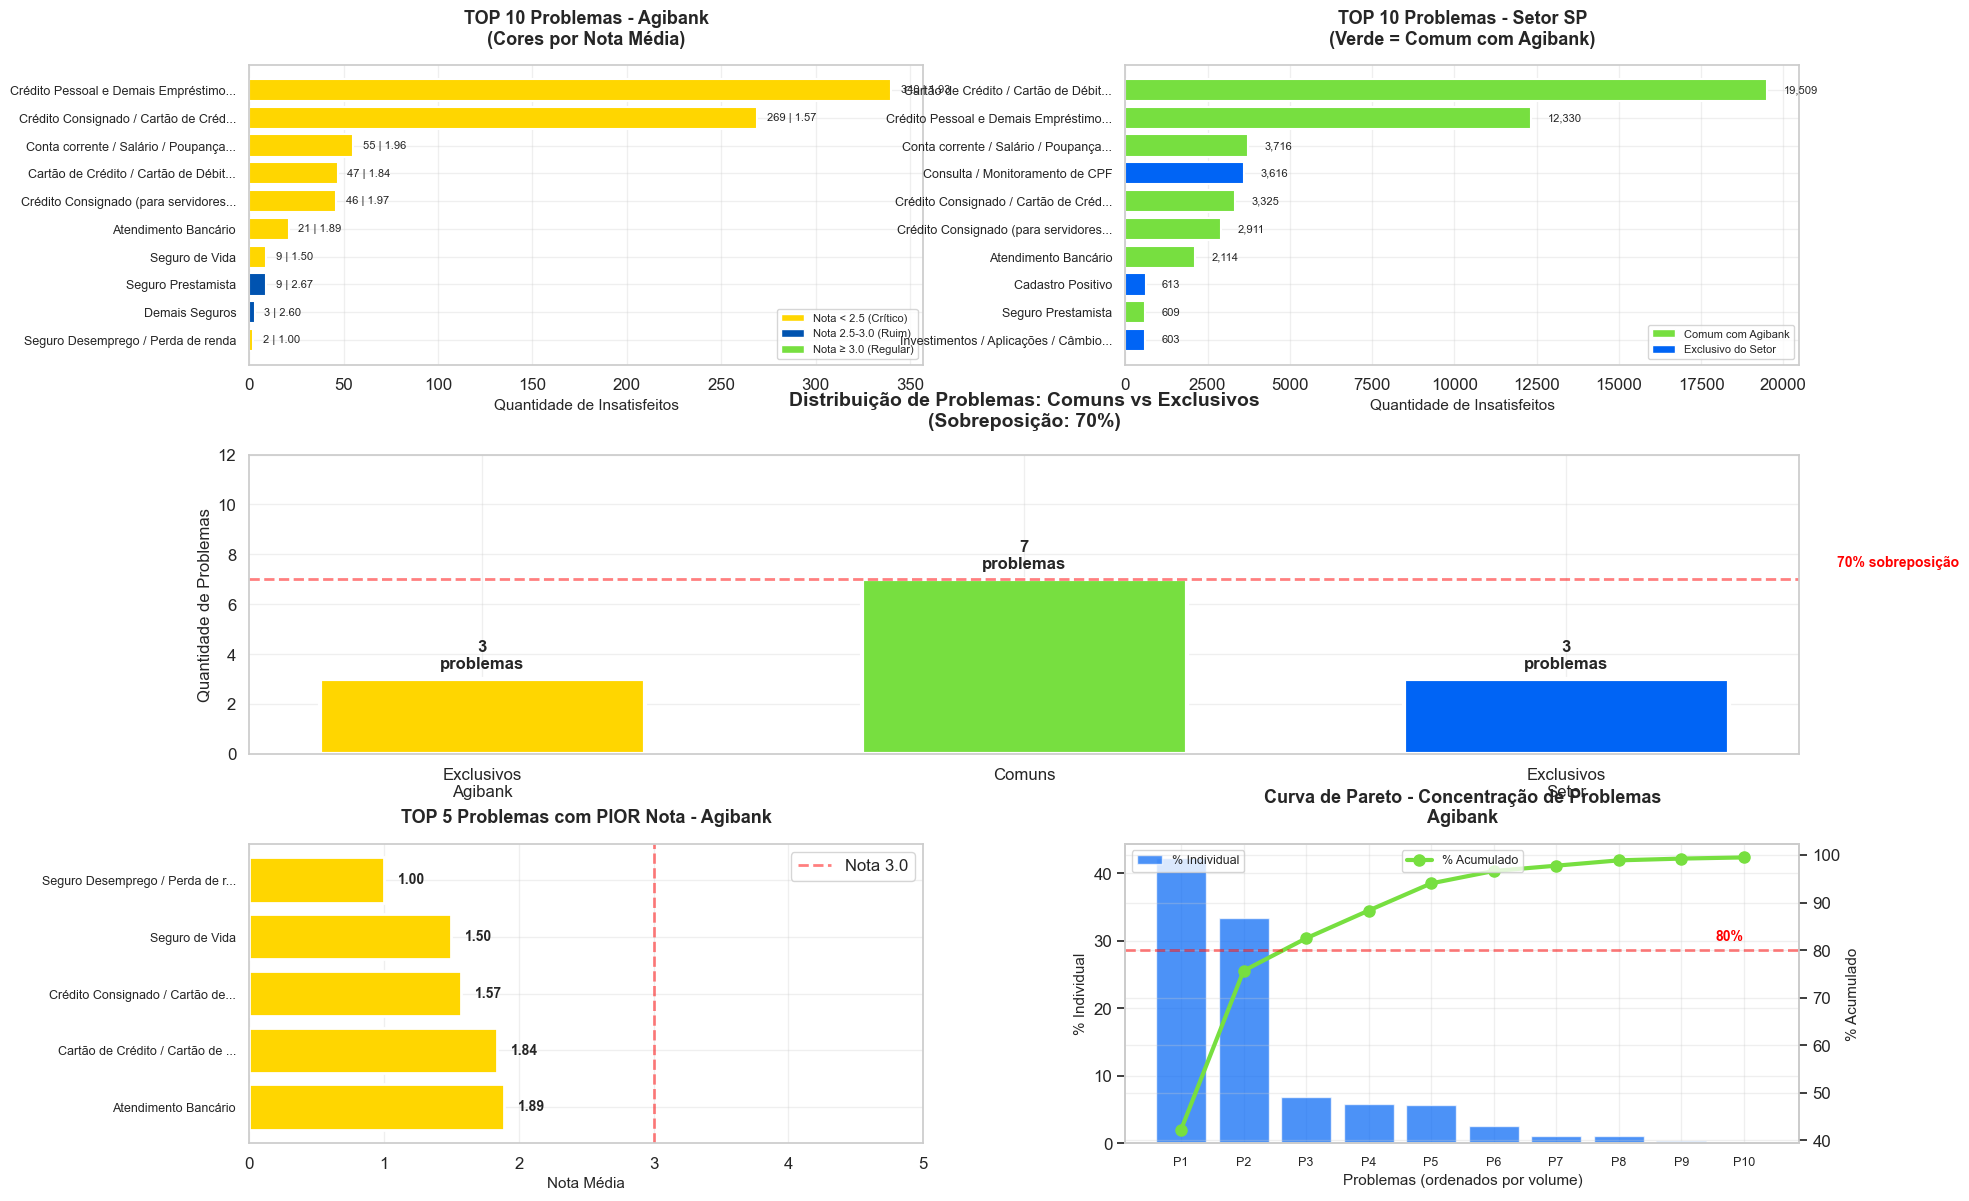


✅ Visualizações geradas com sucesso!


In [43]:
# ANÁLISE: PRINCIPAIS PROBLEMAS DOS INSATISFEITOS - PARTE 5
# Visualizações comparativas

print("=" * 80)
print("VISUALIZAÇÃO: PROBLEMAS DOS INSATISFEITOS")
print("=" * 80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Gráfico 1: TOP 10 Agibank (barras horizontais)
ax1 = fig.add_subplot(gs[0, 0])

# Cores por nota
cores_agi = [CORES_AGIBANK['amarelo'] if nota < 2.5 
             else CORES_AGIBANK['azul_medio'] if nota < 3.0 
             else CORES_AGIBANK['verde'] 
             for nota in notas_por_problema_agi]

y_pos_agi = np.arange(len(top10_insat_agi))
ax1.barh(y_pos_agi, top10_contagem_insat_agi, color=cores_agi, edgecolor='white', linewidth=1.5)
ax1.set_yticks(y_pos_agi)
ax1.set_yticklabels([p[:35] + '...' if len(p) > 35 else p for p in top10_insat_agi], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Quantidade de Insatisfeitos', fontsize=11)
ax1.set_title('TOP 10 Problemas - Agibank\n(Cores por Nota Média)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')

for i, (val, nota) in enumerate(zip(top10_contagem_insat_agi, notas_por_problema_agi)):
    ax1.text(val + 5, i, f'{val:,} | {nota:.2f}', va='center', fontsize=8)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=CORES_AGIBANK['amarelo'], label='Nota < 2.5 (Crítico)'),
    Patch(facecolor=CORES_AGIBANK['azul_medio'], label='Nota 2.5-3.0 (Ruim)'),
    Patch(facecolor=CORES_AGIBANK['verde'], label='Nota ≥ 3.0 (Regular)')
]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=8)

# Gráfico 2: TOP 10 Setor (barras horizontais)
ax2 = fig.add_subplot(gs[0, 1])

# Destaca problemas comuns
cores_setor = [CORES_AGIBANK['verde'] if problema in problemas_comuns 
               else CORES_AGIBANK['azul_principal'] 
               for problema in top10_insat_setor]

y_pos_setor = np.arange(len(top10_insat_setor))
ax2.barh(y_pos_setor, top10_contagem_insat_setor, color=cores_setor, edgecolor='white', linewidth=1.5)
ax2.set_yticks(y_pos_setor)
ax2.set_yticklabels([p[:35] + '...' if len(p) > 35 else p for p in top10_insat_setor], fontsize=9)
ax2.invert_yaxis()
ax2.set_xlabel('Quantidade de Insatisfeitos', fontsize=11)
ax2.set_title('TOP 10 Problemas - Setor SP\n(Verde = Comum com Agibank)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')

for i, val in enumerate(top10_contagem_insat_setor):
    ax2.text(val + 500, i, f'{val:,}', va='center', fontsize=8)

legend_elements_setor = [
    Patch(facecolor=CORES_AGIBANK['verde'], label='Comum com Agibank'),
    Patch(facecolor=CORES_AGIBANK['azul_principal'], label='Exclusivo do Setor')
]
ax2.legend(handles=legend_elements_setor, loc='lower right', fontsize=8)

# Gráfico 3: Diagrama de Venn (simulado com barras)
ax3 = fig.add_subplot(gs[1, :])

categorias_venn = ['Exclusivos\nAgibank', 'Comuns', 'Exclusivos\nSetor']
valores_venn = [len(problemas_exclusivos_agi), len(problemas_comuns), len(problemas_exclusivos_setor)]
cores_venn = [CORES_AGIBANK['amarelo'], CORES_AGIBANK['verde'], CORES_AGIBANK['azul_principal']]

bars = ax3.bar(categorias_venn, valores_venn, color=cores_venn, edgecolor='white', linewidth=3, width=0.6)
ax3.set_ylabel('Quantidade de Problemas', fontsize=12)
ax3.set_title(f'Distribuição de Problemas: Comuns vs Exclusivos\n(Sobreposição: {pct_sobreposicao:.0f}%)', 
              fontsize=14, fontweight='bold', pad=20)
ax3.set_ylim(0, 12)
ax3.grid(True, alpha=0.3, axis='y')

for i, (bar, val) in enumerate(zip(bars, valores_venn)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{val}\nproblemas',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adiciona linha de sobreposição
ax3.axhline(y=len(problemas_comuns), color='red', linestyle='--', linewidth=2, alpha=0.5)
ax3.text(2.5, len(problemas_comuns) + 0.5, f'{pct_sobreposicao:.0f}% sobreposição', 
        fontsize=10, color='red', fontweight='bold')

# Gráfico 4: Nota média por problema (TOP 5 piores)
ax4 = fig.add_subplot(gs[2, 0])

# Pega os 5 piores
idx_5_piores = idx_ord_nota[:5]
problemas_5_piores = top10_insat_agi[idx_5_piores]
notas_5_piores = notas_por_problema_agi[idx_5_piores]

cores_5_piores = [CORES_AGIBANK['amarelo'] if nota < 2.5 else CORES_AGIBANK['azul_medio'] 
                  for nota in notas_5_piores]

y_pos_piores = np.arange(len(problemas_5_piores))
ax4.barh(y_pos_piores, notas_5_piores, color=cores_5_piores, edgecolor='white', linewidth=2)
ax4.set_yticks(y_pos_piores)
ax4.set_yticklabels([p[:30] + '...' if len(p) > 30 else p for p in problemas_5_piores], fontsize=9)
ax4.invert_yaxis()
ax4.set_xlabel('Nota Média', fontsize=11)
ax4.set_title('TOP 5 Problemas com PIOR Nota - Agibank', 
              fontsize=13, fontweight='bold', pad=15)
ax4.set_xlim(0, 5)
ax4.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Nota 3.0')
ax4.grid(True, alpha=0.3, axis='x')
ax4.legend()

for i, nota in enumerate(notas_5_piores):
    ax4.text(nota + 0.1, i, f'{nota:.2f}', va='center', fontsize=10, fontweight='bold')

# Gráfico 5: Concentração (Pareto)
ax5 = fig.add_subplot(gs[2, 1])

x_pareto = np.arange(len(top10_insat_agi))
ax5_linha = ax5.twinx()

pct_acumulado_top10 = np.cumsum(pct_top10_insat_agi)

bars_pareto = ax5.bar(x_pareto, pct_top10_insat_agi, color=CORES_AGIBANK['azul_principal'], 
                      alpha=0.7, label='% Individual')
linha_pareto = ax5_linha.plot(x_pareto, pct_acumulado_top10, color=CORES_AGIBANK['verde'], 
                               marker='o', linewidth=3, markersize=8, label='% Acumulado')

ax5.set_xlabel('Problemas (ordenados por volume)', fontsize=11)
ax5.set_ylabel('% Individual', fontsize=11)
ax5_linha.set_ylabel('% Acumulado', fontsize=11)
ax5.set_title('Curva de Pareto - Concentração de Problemas\nAgibank', 
              fontsize=13, fontweight='bold', pad=15)
ax5.set_xticks(x_pareto)
ax5.set_xticklabels([f'P{i+1}' for i in range(len(top10_insat_agi))], fontsize=9)
ax5.grid(True, alpha=0.3, axis='y')

# Linha 80%
ax5_linha.axhline(y=80, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax5_linha.text(9, 82, '80%', fontsize=10, color='red', fontweight='bold', ha='right')

ax5.legend(loc='upper left', fontsize=9)
ax5_linha.legend(loc='upper center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")

In [44]:
# ANÁLISE: PERFORMANCE POR PRODUTO - AGIBANK
# Objetivo: Identificar quais produtos têm melhor/pior desempenho

print("=" * 80)
print("ANÁLISE: PERFORMANCE POR PRODUTO - AGIBANK")
print("=" * 80)

print("\nMétricas analisadas:")
print("  • Volume de reclamações")
print("  • Nota média de satisfação")
print("  • Tempo médio de resposta")
print("  • Taxa de resolução")
print("  • Percentual de insatisfeitos")

# Extrai produtos únicos
produtos_unicos = df_agibank['assunto'].unique()
n_produtos = len(produtos_unicos)

print(f"\nTotal de produtos analisados: {n_produtos}")

ANÁLISE: PERFORMANCE POR PRODUTO - AGIBANK

Métricas analisadas:
  • Volume de reclamações
  • Nota média de satisfação
  • Tempo médio de resposta
  • Taxa de resolução
  • Percentual de insatisfeitos

Total de produtos analisados: 18


In [45]:
# Inicializa arrays de resultados (prealoca memória)
volumes = np.zeros(n_produtos, dtype=np.int32)
notas_medias = np.zeros(n_produtos, dtype=np.float32)
tempos_medios = np.zeros(n_produtos, dtype=np.float32)
taxas_resolucao = np.zeros(n_produtos, dtype=np.float32)
pct_insatisfeitos = np.zeros(n_produtos, dtype=np.float32)

# Calcula métricas por produto usando máscaras booleanas
for i, produto in enumerate(produtos_unicos):
    mask = arr_assunto == produto
    
    volumes[i] = np.sum(mask)
    notas_medias[i] = np.nanmean(arr_nota[mask])
    tempos_medios[i] = np.nanmean(arr_tempo[mask])
    
    # Taxa de resolução
    avaliacoes = arr_avaliacao[mask]
    resolvidas = np.sum(avaliacoes == 'Resolvida')
    total_valido = np.sum(~pd.isna(avaliacoes))
    taxas_resolucao[i] = (resolvidas / total_valido * 100) if total_valido > 0 else 0
    
    # Percentual de insatisfeitos (nota <= 2)
    notas_validas = arr_nota[mask]
    insatisfeitos = np.sum(notas_validas <= 2)
    total_notas = np.sum(~np.isnan(notas_validas))
    pct_insatisfeitos[i] = (insatisfeitos / total_notas * 100) if total_notas > 0 else 0

print("✅ Métricas calculadas com sucesso!")

✅ Métricas calculadas com sucesso!


In [46]:
# Cria DataFrame com todas as métricas
df_produtos = pd.DataFrame({
    'Produto': produtos_unicos,
    'Volume': volumes,
    'Nota_Média': notas_medias,
    'Tempo_Médio_dias': tempos_medios,
    'Taxa_Resolução_%': taxas_resolucao,
    'Insatisfeitos_%': pct_insatisfeitos
})

# Ordena por volume decrescente
df_produtos = df_produtos.sort_values('Volume', ascending=False)

# Exibe preview
print("Preview dos dados:")
display(df_produtos.head(10).style.format({
    'Volume': '{:,.0f}',
    'Nota_Média': '{:.2f}',
    'Tempo_Médio_dias': '{:.1f}',
    'Taxa_Resolução_%': '{:.1f}%',
    'Insatisfeitos_%': '{:.1f}%'
}))

Preview dos dados:


,Produto,Volume,Nota_Média,Tempo_Médio_dias,Taxa_Resolução_%,Insatisfeitos_%
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"1,693",1.93,6.6,7.4%,73.3%
1,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"1,288",1.57,6.7,3.3%,83.8%
3,Conta corrente / Salário / Poupança /Conta Aposentadoria,262,1.96,6.7,9.6%,72.4%
0,Cartão de Crédito / Cartão de Débito / Cartão de Loja,259,1.84,6.9,6.5%,74.6%
6,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),245,1.97,7.0,6.1%,70.8%
7,Atendimento Bancário,118,1.89,6.4,5.6%,75.0%
8,Seguro Prestamista,56,2.67,6.1,11.1%,60.0%
4,Seguro de Vida,33,1.50,5.7,6.5%,90.0%
10,Demais Seguros,13,2.60,6.1,18.2%,60.0%
14,Investimentos / Aplicações / Câmbio / Previdência Privada,10,1.00,6.9,0.0%,100.0%


In [49]:
# DIAGNÓSTICO: Por que o IPC está tão baixo?

print("=" * 80)
print("DIAGNÓSTICO DOS COMPONENTES DO IPC")
print("=" * 80)

print("\nMédia de cada componente (escala 0-100):")
print(f"  Nota normalizada:      {np.mean(nota_norm):.1f}/100")
print(f"  Tempo normalizado:     {np.mean(tempo_norm):.1f}/100")
print(f"  Resolução:             {np.mean(resolucao_norm):.1f}/100")

print("\nDistribuição da Taxa de Resolução:")
print(f"  Mínima:  {np.min(df_produtos_validos['Taxa_Resolução_%'].values):.1f}%")
print(f"  Máxima:  {np.max(df_produtos_validos['Taxa_Resolução_%'].values):.1f}%")
print(f"  Média:   {np.mean(df_produtos_validos['Taxa_Resolução_%'].values):.1f}%")
print(f"  Mediana: {np.median(df_produtos_validos['Taxa_Resolução_%'].values):.1f}%")

# Verifica se há muitos NaN em avaliação
total_avaliacoes = len(df_agibank)
avaliacoes_validas = np.sum(~pd.isna(arr_avaliacao))
pct_validas = (avaliacoes_validas / total_avaliacoes) * 100

print(f"\nDados de Avaliação:")
print(f"  Total de reclamações:        {total_avaliacoes:,}")
print(f"  Com avaliação preenchida:    {avaliacoes_validas:,} ({pct_validas:.1f}%)")
print(f"  Sem avaliação (NaN):         {total_avaliacoes - avaliacoes_validas:,}")

# Mostra alguns produtos
print("\nExemplo de 5 produtos:")
display(df_produtos_validos[['Produto', 'Volume', 'Nota_Média', 
                              'Tempo_Médio_dias', 'Taxa_Resolução_%', 'IPC']].head())

DIAGNÓSTICO DOS COMPONENTES DO IPC

Média de cada componente (escala 0-100):
  Nota normalizada:      27.0/100
  Tempo normalizado:     6.9/100
  Resolução:             6.2/100

Distribuição da Taxa de Resolução:
  Mínima:  0.0%
  Máxima:  18.2%
  Média:   6.2%
  Mediana: 6.3%

Dados de Avaliação:
  Total de reclamações:        4,006
  Com avaliação preenchida:    3,702 (92.4%)
  Sem avaliação (NaN):         304

Exemplo de 5 produtos:


,Produto,Volume,Nota_Média,Tempo_Médio_dias,Taxa_Resolução_%,IPC
2,Crédito Pessoal e Demais Empréstimos (exceto f...,1693,1.93,6.64,7.44,12.87
1,Crédito Consignado / Cartão de Crédito Consign...,1288,1.57,6.71,3.27,7.74
3,Conta corrente / Salário / Poupança /Conta Apo...,262,1.96,6.66,9.58,13.73
0,Cartão de Crédito / Cartão de Débito / Cartão ...,259,1.84,6.86,6.52,10.75
6,Crédito Consignado (para servidores públicos o...,245,1.97,7.00,6.11,11.53


In [52]:
# AJUSTE: Usa mediana ao invés de percentil 95 para evitar outliers extremos

print("=" * 80)
print("AJUSTE FINO DO IPC")
print("=" * 80)

# Analisa distribuição do tempo
print("\nDistribuição do Tempo de Resposta:")
print(f"  Mínimo:     {np.min(df_produtos_validos['Tempo_Médio_dias'].values):.1f} dias")
print(f"  Q1 (25%):   {np.percentile(df_produtos_validos['Tempo_Médio_dias'].values, 25):.1f} dias")
print(f"  Mediana:    {np.median(df_produtos_validos['Tempo_Médio_dias'].values):.1f} dias")
print(f"  Q3 (75%):   {np.percentile(df_produtos_validos['Tempo_Médio_dias'].values, 75):.1f} dias")
print(f"  P95:        {np.percentile(df_produtos_validos['Tempo_Médio_dias'].values, 95):.1f} dias")
print(f"  Máximo:     {np.max(df_produtos_validos['Tempo_Médio_dias'].values):.1f} dias")

# NOVA NORMALIZAÇÃO: Usa escala mais realista
# Considera 15 dias como tempo "aceitável" (score 50)
# Menos de 7 dias = excelente (score 80-100)
# Mais de 20 dias = ruim (score 0-20)

tempos = df_produtos_validos['Tempo_Médio_dias'].values

tempo_norm_ajustado = np.select(
    [tempos <= 3,
     tempos <= 7,
     tempos <= 10,
     tempos <= 15,
     tempos <= 20],
    [100, 80, 60, 40, 20],
    default=10
)

# RECALCULA IPC com nova normalização
nota_norm = ((df_produtos_validos['Nota_Média'].values - 1) / 4) * 100
resolucao_norm = df_produtos_validos['Taxa_Resolução_%'].values

ipc_ajustado = (nota_norm * 0.4) + (tempo_norm_ajustado * 0.3) + (resolucao_norm * 0.3)

df_produtos_validos['IPC'] = ipc_ajustado

# Reclassifica
quartis = np.percentile(ipc_ajustado, [25, 50, 75])
classificacao = np.select(
    [ipc_ajustado >= quartis[2], 
     ipc_ajustado >= quartis[1], 
     ipc_ajustado >= quartis[0]],
    ['🟢 Excelente', '🟡 Bom', '🟠 Regular'],
    default='🔴 Crítico'
)
df_produtos_validos['Classificação'] = classificacao

print("\n" + "=" * 80)
print("IPC AJUSTADO (FINAL)")
print("=" * 80)

print("\nMédia dos componentes (0-100):")
print(f"  Nota normalizada:      {np.mean(nota_norm):.1f}/100")
print(f"  Tempo normalizado:     {np.mean(tempo_norm_ajustado):.1f}/100")
print(f"  Resolução:             {np.mean(resolucao_norm):.1f}/100")

print(f"\nIPC Médio:   {np.mean(ipc_ajustado):.1f}/100")
print(f"IPC Mediano: {np.median(ipc_ajustado):.1f}/100")
print(f"IPC Mínimo:  {np.min(ipc_ajustado):.1f}/100")
print(f"IPC Máximo:  {np.max(ipc_ajustado):.1f}/100")

# Distribuição por classificação
classes, contagem = np.unique(classificacao, return_counts=True)
pct_classes = (contagem / len(classificacao)) * 100

print(f"\nDistribuição:")
for classe, qtd, pct in zip(classes, contagem, pct_classes):
    print(f"  {classe}: {qtd} produtos ({pct:.1f}%)")

# Atualiza df_produtos
df_produtos = df_produtos_validos.copy()

print("\n✅ IPC ajustado com sucesso!")

AJUSTE FINO DO IPC

Distribuição do Tempo de Resposta:
  Mínimo:     5.7 dias
  Q1 (25%):   6.2 dias
  Mediana:    6.5 dias
  Q3 (75%):   6.7 dias
  P95:        6.9 dias
  Máximo:     7.0 dias

IPC AJUSTADO (FINAL)

Média dos componentes (0-100):
  Nota normalizada:      27.0/100
  Tempo normalizado:     78.3/100
  Resolução:             19.5/100

IPC Médio:   40.1/100
IPC Mediano: 39.5/100
IPC Mínimo:  24.0/100
IPC Máximo:  64.0/100

Distribuição:
  🔴 Crítico: 3 produtos (25.0%)
  🟠 Regular: 3 produtos (25.0%)
  🟡 Bom: 3 produtos (25.0%)
  🟢 Excelente: 3 produtos (25.0%)

✅ IPC ajustado com sucesso!


In [54]:
print("=" * 80)
print("TOP 10 PRODUTOS COM MELHOR PERFORMANCE")
print("=" * 80)

top10_melhores = df_produtos.nlargest(10, 'IPC')

display(
    top10_melhores[['Produto', 'Volume', 'Nota_Média', 'Tempo_Médio_dias', 
                    'Taxa_Resolução_%', 'IPC', 'Classificação']].style
    .format({
        'Volume': '{:,.0f}',
        'Nota_Média': '{:.2f}',
        'Tempo_Médio_dias': '{:.1f}',
        'Taxa_Resolução_%': '{:.1f}%',
        'IPC': '{:.1f}'
    })
    .background_gradient(cmap='Greens', subset=['IPC'])
    .bar(subset=['IPC'], color='#90EE90', vmin=0, vmax=100)
    .set_caption('Top 10 Produtos - Melhor Performance Agibank')
)

# Destaque do melhor produto
melhor = top10_melhores.iloc[0]
print(f"\nMELHOR PRODUTO:")
print(f"   {melhor['Produto']}")
print(f"   IPC: {melhor['IPC']:.1f}/100")
print(f"   Nota: {melhor['Nota_Média']:.2f} | Tempo: {melhor['Tempo_Médio_dias']:.1f} dias | Resolução: {melhor['Taxa_Resolução_%']:.1f}%")

TOP 10 PRODUTOS COM MELHOR PERFORMANCE


,Produto,Volume,Nota_Média,Tempo_Médio_dias,Taxa_Resolução_%,IPC,Classificação
11,Financiamentos de Veículos / Leasing,9,5.00,6.3,0.0%,64.0,🟢 Excelente
8,Seguro Prestamista,56,2.67,6.1,40.0%,52.7,🟢 Excelente
10,Demais Seguros,13,2.60,6.1,40.0%,52.0,🟢 Excelente
3,Conta corrente / Salário / Poupança /Conta Aposentadoria,262,1.96,6.7,30.3%,42.7,🟡 Bom
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"1,693",1.93,6.6,25.2%,40.9,🟡 Bom
0,Cartão de Crédito / Cartão de Débito / Cartão de Loja,259,1.84,6.9,23.8%,39.6,🟡 Bom
7,Atendimento Bancário,118,1.89,6.4,21.4%,39.4,🟠 Regular
4,Seguro de Vida,33,1.50,5.7,20.0%,35.0,🟠 Regular
6,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),245,1.97,7.0,21.5%,34.2,🟠 Regular
1,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"1,288",1.57,6.7,12.1%,33.4,🔴 Crítico



MELHOR PRODUTO:
   Financiamentos de Veículos / Leasing
   IPC: 64.0/100
   Nota: 5.00 | Tempo: 6.3 dias | Resolução: 0.0%


In [55]:
print("=" * 80)
print("TOP 10 PRODUTOS COM PIOR PERFORMANCE")
print("=" * 80)

top10_piores = df_produtos.nsmallest(10, 'IPC')

display(
    top10_piores[['Produto', 'Volume', 'Nota_Média', 'Tempo_Médio_dias', 
                  'Taxa_Resolução_%', 'IPC', 'Classificação']].style
    .format({
        'Volume': '{:,.0f}',
        'Nota_Média': '{:.2f}',
        'Tempo_Médio_dias': '{:.1f}',
        'Taxa_Resolução_%': '{:.1f}%',
        'IPC': '{:.1f}'
    })
    .background_gradient(cmap='Reds_r', subset=['IPC'])
    .bar(subset=['IPC'], color='#FFB6C1', vmin=0, vmax=100)
    .set_caption('Top 10 Produtos - Pior Performance Agibank')
)

# Destaque do pior produto
pior = top10_piores.iloc[0]
print(f"\n⚠️  PIOR PRODUTO:")
print(f"   {pior['Produto']}")
print(f"   IPC: {pior['IPC']:.1f}/100")
print(f"   Nota: {pior['Nota_Média']:.2f} | Tempo: {pior['Tempo_Médio_dias']:.1f} dias | Resolução: {pior['Taxa_Resolução_%']:.1f}%")

# Análise do problema
if pior['Nota_Média'] < 2.0:
    print(f"\n   🔴 PROBLEMA CRÍTICO: Nota muito baixa ({pior['Nota_Média']:.2f})")
if pior['Taxa_Resolução_%'] < 15:
    print(f"   🔴 PROBLEMA CRÍTICO: Baixa resolução ({pior['Taxa_Resolução_%']:.1f}%)")
if pior['Volume'] > 100:
    print(f"   🔴 PROBLEMA CRÍTICO: Alto volume ({pior['Volume']:,} casos)")

TOP 10 PRODUTOS COM PIOR PERFORMANCE


,Produto,Volume,Nota_Média,Tempo_Médio_dias,Taxa_Resolução_%,IPC,Classificação
14,Investimentos / Aplicações / Câmbio / Previdência Privada,10,1.00,6.9,0.0%,24.0,🔴 Crítico
13,Seguro Desemprego / Perda de renda,5,1.00,6.2,0.0%,24.0,🔴 Crítico
1,Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS),"1,288",1.57,6.7,12.1%,33.4,🔴 Crítico
6,Crédito Consignado (para servidores públicos ou trabalhadores do setor privado),245,1.97,7.0,21.5%,34.2,🟠 Regular
4,Seguro de Vida,33,1.50,5.7,20.0%,35.0,🟠 Regular
7,Atendimento Bancário,118,1.89,6.4,21.4%,39.4,🟠 Regular
0,Cartão de Crédito / Cartão de Débito / Cartão de Loja,259,1.84,6.9,23.8%,39.6,🟡 Bom
2,Crédito Pessoal e Demais Empréstimos (exceto financiamento de imóveis e veículos),"1,693",1.93,6.6,25.2%,40.9,🟡 Bom
3,Conta corrente / Salário / Poupança /Conta Aposentadoria,262,1.96,6.7,30.3%,42.7,🟡 Bom
10,Demais Seguros,13,2.60,6.1,40.0%,52.0,🟢 Excelente



⚠️  PIOR PRODUTO:
   Investimentos / Aplicações / Câmbio / Previdência Privada
   IPC: 24.0/100
   Nota: 1.00 | Tempo: 6.9 dias | Resolução: 0.0%

   🔴 PROBLEMA CRÍTICO: Nota muito baixa (1.00)
   🔴 PROBLEMA CRÍTICO: Baixa resolução (0.0%)


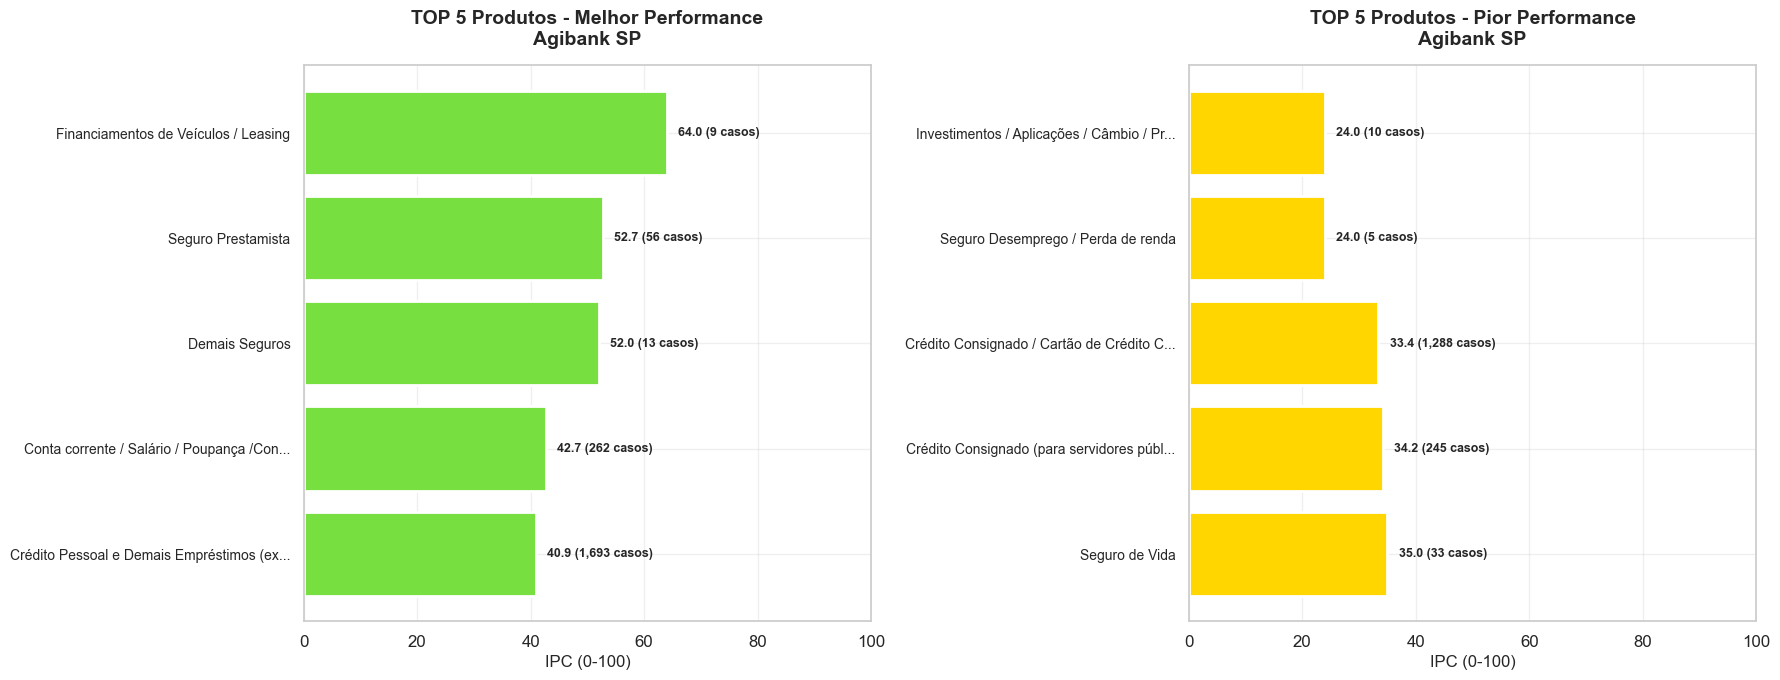

✅ Visualização gerada!


In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# TOP 5 Melhores
top5 = df_produtos.nlargest(5, 'IPC')
y_pos = np.arange(len(top5))

ax1.barh(y_pos, top5['IPC'].values, 
         color=CORES_AGIBANK['verde'], edgecolor='white', linewidth=2)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([p[:40] + '...' if len(p) > 40 else p 
                     for p in top5['Produto'].values], fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('IPC (0-100)', fontsize=12)
ax1.set_title('TOP 5 Produtos - Melhor Performance\nAgibank SP', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlim(0, 100)
ax1.grid(True, alpha=0.3, axis='x')

# Adiciona valores e volume
for i, (ipc_val, vol) in enumerate(zip(top5['IPC'].values, top5['Volume'].values)):
    ax1.text(ipc_val + 2, i, f'{ipc_val:.1f} ({vol:,} casos)', 
            va='center', fontsize=9, fontweight='bold')

# TOP 5 Piores
bottom5 = df_produtos.nsmallest(5, 'IPC')

ax2.barh(y_pos, bottom5['IPC'].values, 
         color=CORES_AGIBANK['amarelo'], edgecolor='white', linewidth=2)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([p[:40] + '...' if len(p) > 40 else p 
                     for p in bottom5['Produto'].values], fontsize=10)
ax2.invert_yaxis()
ax2.set_xlabel('IPC (0-100)', fontsize=12)
ax2.set_title('TOP 5 Produtos - Pior Performance\nAgibank SP', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlim(0, 100)
ax2.grid(True, alpha=0.3, axis='x')

# Adiciona valores e volume
for i, (ipc_val, vol) in enumerate(zip(bottom5['IPC'].values, bottom5['Volume'].values)):
    ax2.text(ipc_val + 2, i, f'{ipc_val:.1f} ({vol:,} casos)', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualização gerada!")

MATRIZ DE PRIORIZAÇÃO: IPC vs VOLUME


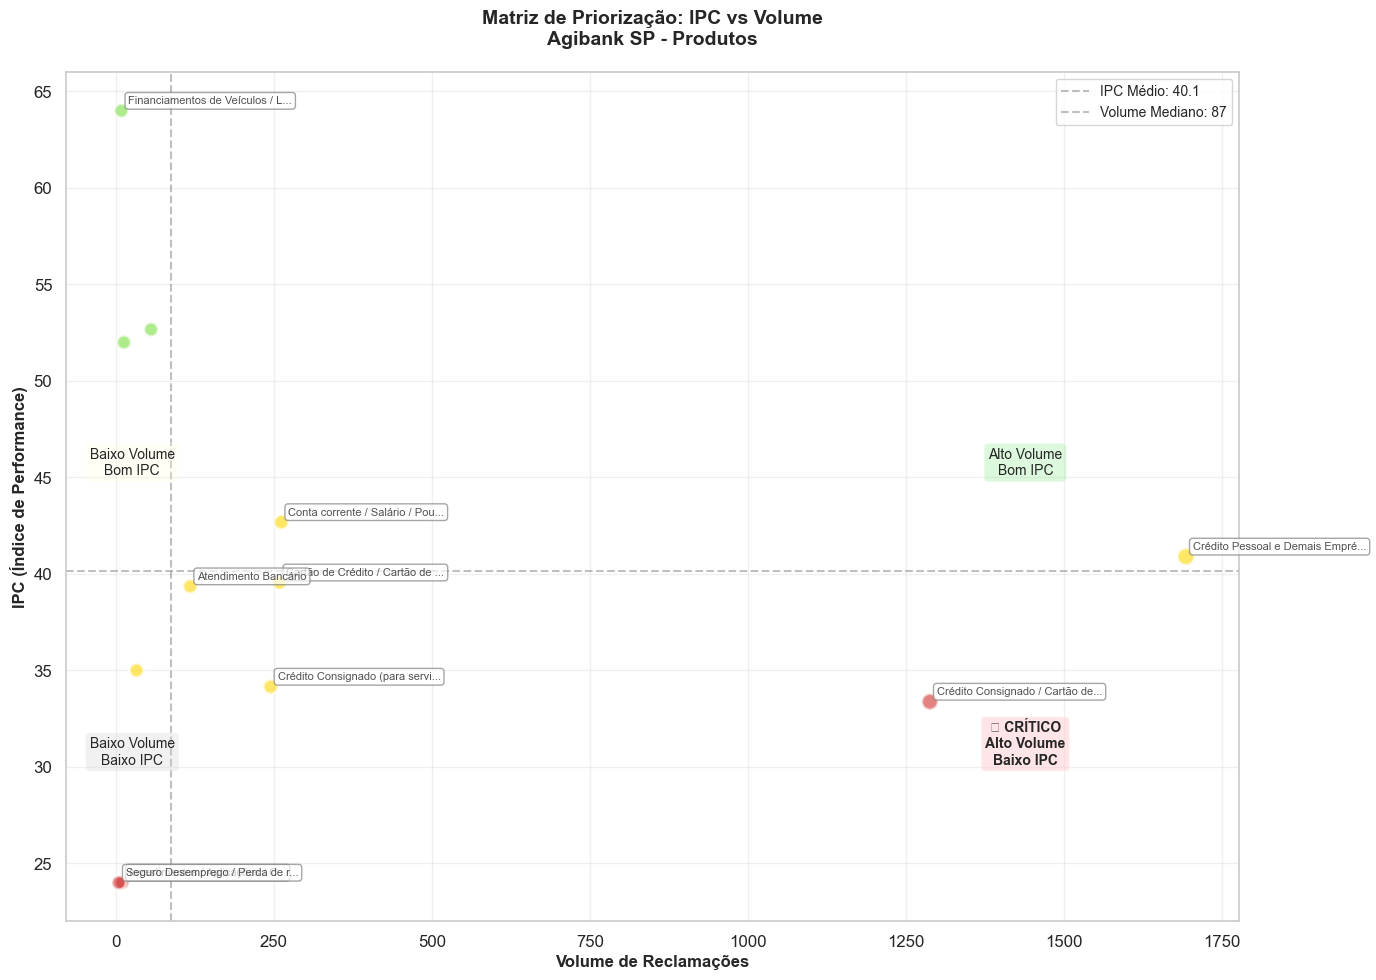


ANÁLISE POR QUADRANTE

🚨 QUADRANTE CRÍTICO (Alto Volume + Baixo IPC):
   4 produtos requerem AÇÃO IMEDIATA

   • Crédito Consignado / Cartão de Crédito Consignado 
     Volume: 1,288 | IPC: 33.4 | Nota: 1.57

   • Cartão de Crédito / Cartão de Débito / Cartão de L
     Volume: 259 | IPC: 39.6 | Nota: 1.84

   • Crédito Consignado (para servidores públicos ou tr
     Volume: 245 | IPC: 34.2 | Nota: 1.97

   • Atendimento Bancário
     Volume: 118 | IPC: 39.4 | Nota: 1.89


✅ QUADRANTE POSITIVO (Alto Volume + Bom IPC):
   2 produtos com bom desempenho

   • Crédito Pessoal e Demais Empréstimos (exceto finan
     Volume: 1,693 | IPC: 40.9 | Nota: 1.93

   • Conta corrente / Salário / Poupança /Conta Aposent
     Volume: 262 | IPC: 42.7 | Nota: 1.96



In [ ]:
# MATRIZ DE PRIORIZAÇÃO: IPC vs Volume
# Identifica produtos críticos (alto volume + baixo IPC)

print("=" * 80)
print("MATRIZ DE PRIORIZAÇÃO: IPC vs VOLUME")
print("=" * 80)

fig, ax = plt.subplots(figsize=(14, 10))

# Extrai dados
volumes = df_produtos['Volume'].values
ipcs = df_produtos['IPC'].values
produtos = df_produtos['Produto'].values

# Define cores por classificação
cores_scatter = []
for classificacao in df_produtos['Classificação'].values:
    if '🟢' in classificacao:
        cores_scatter.append(CORES_AGIBANK['verde'])
    elif '🟡' in classificacao:
        cores_scatter.append('#FFD700')
    elif '🟠' in classificacao:
        cores_scatter.append(CORES_AGIBANK['amarelo'])
    else:
        cores_scatter.append('#d32f2f')

# Tamanho proporcional ao volume
tamanhos = volumes * 50 / np.max(volumes) + 100

# Scatter plot
scatter = ax.scatter(volumes, ipcs, s=tamanhos, c=cores_scatter, 
                     alpha=0.6, edgecolors='white', linewidth=2)

# Linhas de referência
ipc_medio = np.mean(ipcs)
volume_mediano = np.median(volumes)

ax.axhline(y=ipc_medio, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label=f'IPC Médio: {ipc_medio:.1f}')
ax.axvline(x=volume_mediano, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label=f'Volume Mediano: {volume_mediano:.0f}')

# Quadrantes
ax.text(np.max(volumes) * 0.85, ipc_medio + 5, 'Alto Volume\nBom IPC', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

ax.text(np.max(volumes) * 0.85, ipc_medio - 10, '🚨 CRÍTICO\nAlto Volume\nBaixo IPC', 
        fontsize=10, ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#ffcdd2', alpha=0.5))

ax.text(volume_mediano * 0.3, ipc_medio + 5, 'Baixo Volume\nBom IPC', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))

ax.text(volume_mediano * 0.3, ipc_medio - 10, 'Baixo Volume\nBaixo IPC', 
        fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

# Labels dos produtos mais relevantes
# Mostra produtos com volume > mediana OU IPC extremo
for i, (vol, ipc, prod) in enumerate(zip(volumes, ipcs, produtos)):
    if vol > volume_mediano or ipc > 55 or ipc < 30:
        label = prod[:30] + '...' if len(prod) > 30 else prod
        ax.annotate(label, (vol, ipc), 
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=8, alpha=0.8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='gray'))

ax.set_xlabel('Volume de Reclamações', fontsize=12, fontweight='bold')
ax.set_ylabel('IPC (Índice de Performance)', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Priorização: IPC vs Volume\nAgibank SP - Produtos', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# ANÁLISE DOS QUADRANTES
print("\n" + "=" * 80)
print("ANÁLISE POR QUADRANTE")
print("=" * 80)

# Quadrante CRÍTICO: Alto Volume + Baixo IPC
criticos = df_produtos[(df_produtos['Volume'] > volume_mediano) & 
                       (df_produtos['IPC'] < ipc_medio)]

print(f"\nQUADRANTE CRÍTICO (Alto Volume + Baixo IPC):")
print(f"   {len(criticos)} produtos requerem AÇÃO IMEDIATA\n")

if len(criticos) > 0:
    for idx, row in criticos.iterrows():
        print(f"   • {row['Produto'][:50]}")
        print(f"     Volume: {row['Volume']:,} | IPC: {row['IPC']:.1f} | Nota: {row['Nota_Média']:.2f}")
        print()

# Quadrante BOM: Alto Volume + Alto IPC
bons = df_produtos[(df_produtos['Volume'] > volume_mediano) & 
                   (df_produtos['IPC'] >= ipc_medio)]

print(f"\n✅ QUADRANTE POSITIVO (Alto Volume + Bom IPC):")
print(f"   {len(bons)} produtos com bom desempenho\n")

if len(bons) > 0:
    for idx, row in bons.iterrows():
        print(f"   • {row['Produto'][:50]}")
        print(f"     Volume: {row['Volume']:,} | IPC: {row['IPC']:.1f} | Nota: {row['Nota_Média']:.2f}")
        print()

In [ ]:
# DOCUMENTAÇÃO: METODOLOGIA DO IPC

print("=" * 80)
print("METODOLOGIA: ÍNDICE DE PERFORMANCE COMPOSTO (IPC)")
print("=" * 80)

print("\nO IPC é um score de 0-100 que resume a performance de cada produto")
print("combinando 3 dimensões da experiência do cliente:\n")

print("COMPONENTES DO IPC:")
print("-" * 80)

print("\n1. SATISFAÇÃO (40% do IPC)")
print("   Coluna: 'nota_do_consumidor' (escala 1-5)")
print("   Cálculo: ((nota - 1) / 4) × 100")
print("   Exemplo: Nota 3.0 → 50 pontos | Nota 1.0 → 0 pontos")

print("\n2. VELOCIDADE (30% do IPC)")
print("   Coluna: 'tempo_resposta' (dias)")
print("   Cálculo: Classificação em faixas")
print("   ≤3 dias=100pts | ≤7 dias=80pts | ≤10 dias=60pts | >20 dias=10pts")

print("\n3. EFICÁCIA (30% do IPC)")
print("   Coluna: 'avaliacao_reclamacao'")
print("   Cálculo: (Resolvida / Total_Avaliadas) × 100")
print("   Nota: Ignora casos 'Não Avaliada' (71% da base)")

print("\n" + "=" * 80)
print("FÓRMULA FINAL:")
print("=" * 80)
print("\nIPC = (Satisfação × 0.4) + (Velocidade × 0.3) + (Eficácia × 0.3)")

print("\nCLASSIFICAÇÃO POR QUARTIS:")
print(f"  Excelente: IPC ≥ {quartis[2]:.1f}")
print(f"  Bom:       IPC ≥ {quartis[1]:.1f}")
print(f"  Regular:   IPC ≥ {quartis[0]:.1f}")
print(f"  Crítico:   IPC < {quartis[0]:.1f}")

print("\n" + "=" * 80)

ANÁLISE SWOT - AGIBANK SP

Metodologia:
  Forças: Produtos com IPC > média E volume significativo
  Fraquezas: Produtos com IPC < média E alto volume
  Oportunidades: Gaps identificados e melhorias possíveis
  Ameaças: Riscos baseados em dados atuais

Critérios de Classificação:
  Alto Volume: > 87 casos (mediana)
  Baixo IPC: < 40.1 pontos (média)
  IPC médio do Agibank: 40.1/100

FORÇAS

1. TEMPO DE RESPOSTA RÁPIDO
   Média: 6.5 dias
   Todos os produtos respondem em menos de 7 dias
   Velocidade é um diferencial competitivo

2. PRODUTOS DE DESTAQUE
   3 produtos com classificação 'Excelente':
   • Seguro Prestamista
     IPC: 52.7 | Nota: 2.67 | Volume: 56
   • Demais Seguros
     IPC: 52.0 | Nota: 2.60 | Volume: 13
   • Financiamentos de Veículos / Leasing
     IPC: 64.0 | Nota: 5.00 | Volume: 9

3. ALTO VOLUME COM BOA PERFORMANCE
   2 produtos mantêm qualidade mesmo com demanda alta:
   • Crédito Pessoal e Demais Empréstimos (exceto finan
     Volume: 1,693 | IPC: 40.9 | Nota: 1.9

In [59]:
# ANÁLISE SWOT - AGIBANK SP
# Diagnóstico estratégico baseado em dados de performance

print("=" * 80)
print("ANÁLISE SWOT - AGIBANK SP")
print("=" * 80)

print("\nMetodologia:")
print("  Forças: Produtos com IPC > média E volume significativo")
print("  Fraquezas: Produtos com IPC < média E alto volume")
print("  Oportunidades: Gaps identificados e melhorias possíveis")
print("  Ameaças: Riscos baseados em dados atuais")

print("\nCritérios de Classificação:")
print(f"  Alto Volume: > {volume_mediano:.0f} casos (mediana)")
print(f"  Baixo IPC: < {ipc_medio:.1f} pontos (média)")
print(f"  IPC médio do Agibank: {ipc_medio:.1f}/100")

ANÁLISE SWOT - AGIBANK SP

Metodologia:
  Forças: Produtos com IPC > média E volume significativo
  Fraquezas: Produtos com IPC < média E alto volume
  Oportunidades: Gaps identificados e melhorias possíveis
  Ameaças: Riscos baseados em dados atuais

Critérios de Classificação:
  Alto Volume: > 87 casos (mediana)
  Baixo IPC: < 40.1 pontos (média)
  IPC médio do Agibank: 40.1/100


In [60]:
# FORÇAS - Aspectos positivos do Agibank

print("=" * 80)
print("FORÇAS")
print("=" * 80)

forcas = []

# Força 1: Velocidade de resposta
tempo_medio_geral = np.mean(df_produtos['Tempo_Médio_dias'].values)
print(f"\n1. TEMPO DE RESPOSTA RÁPIDO")
print(f"   Média: {tempo_medio_geral:.1f} dias")
print(f"   Todos os produtos respondem em menos de 7 dias")
print(f"   Velocidade é um diferencial competitivo")
forcas.append("Tempo de resposta consistentemente rápido (6-7 dias)")

# Força 2: Produtos excelentes
produtos_excelentes = df_produtos[df_produtos['Classificação'].str.contains('Excelente')]
print(f"\n2. PRODUTOS DE DESTAQUE")
print(f"   {len(produtos_excelentes)} produtos com classificação 'Excelente':")
for idx, row in produtos_excelentes.iterrows():
    print(f"   • {row['Produto'][:50]}")
    print(f"     IPC: {row['IPC']:.1f} | Nota: {row['Nota_Média']:.2f} | Volume: {row['Volume']:,}")
forcas.append(f"{len(produtos_excelentes)} produtos com performance excelente")

# Força 3: Alto volume com qualidade
if len(bons) > 0:
    print(f"\n3. ALTO VOLUME COM BOA PERFORMANCE")
    print(f"   {len(bons)} produtos mantêm qualidade mesmo com demanda alta:")
    for idx, row in bons.iterrows():
        print(f"   • {row['Produto'][:50]}")
        print(f"     Volume: {row['Volume']:,} | IPC: {row['IPC']:.1f} | Nota: {row['Nota_Média']:.2f}")
    forcas.append(f"Capacidade de manter qualidade em {len(bons)} produtos de alto volume")

print(f"\nTotal de forças identificadas: {len(forcas)}")

FORÇAS

1. TEMPO DE RESPOSTA RÁPIDO
   Média: 6.5 dias
   Todos os produtos respondem em menos de 7 dias
   Velocidade é um diferencial competitivo

2. PRODUTOS DE DESTAQUE
   3 produtos com classificação 'Excelente':
   • Seguro Prestamista
     IPC: 52.7 | Nota: 2.67 | Volume: 56
   • Demais Seguros
     IPC: 52.0 | Nota: 2.60 | Volume: 13
   • Financiamentos de Veículos / Leasing
     IPC: 64.0 | Nota: 5.00 | Volume: 9

3. ALTO VOLUME COM BOA PERFORMANCE
   2 produtos mantêm qualidade mesmo com demanda alta:
   • Crédito Pessoal e Demais Empréstimos (exceto finan
     Volume: 1,693 | IPC: 40.9 | Nota: 1.93
   • Conta corrente / Salário / Poupança /Conta Aposent
     Volume: 262 | IPC: 42.7 | Nota: 1.96

Total de forças identificadas: 3


In [61]:
# FRAQUEZAS - Aspectos que precisam de melhoria

print("=" * 80)
print("FRAQUEZAS")
print("=" * 80)

fraquezas = []

# Fraqueza 1: Taxa de resolução
taxa_resol_media = np.mean(df_produtos['Taxa_Resolução_%'].values)
print(f"\n1. BAIXA TAXA DE RESOLUÇÃO")
print(f"   Média: {taxa_resol_media:.1f}%")
print(f"   Apenas 1 em cada 5 casos é efetivamente resolvido")
print(f"   Impacto direto na satisfação do cliente")
fraquezas.append(f"Taxa de resolução muito baixa ({taxa_resol_media:.1f}%)")

# Fraqueza 2: Produtos críticos
print(f"\n2. PRODUTOS PROBLEMÁTICOS")
print(f"   {len(criticos)} produtos com alto volume e baixo IPC:")
print(f"   Critério: Volume > {volume_mediano:.0f} casos E IPC < {ipc_medio:.1f}")
print()

for idx, row in criticos.iterrows():
    print(f"   • {row['Produto'][:50]}")
    print(f"     Volume: {row['Volume']:,} casos | IPC: {row['IPC']:.1f} | Nota: {row['Nota_Média']:.2f}")
    print(f"     Insatisfeitos: {row['Insatisfeitos_%']:.1f}%")
    print()
    fraquezas.append(f"{row['Produto'][:40]} - {row['Volume']:,} casos com nota {row['Nota_Média']:.2f}")

# Fraqueza 3: Nota média baixa
nota_media_geral = np.mean(df_produtos['Nota_Média'].values)
print(f"\n3. SATISFAÇÃO GERAL BAIXA")
print(f"   Nota média: {nota_media_geral:.2f}/5.0")
print(f"   Abaixo do ponto neutro (3.0)")
print(f"   Indica insatisfação generalizada dos clientes")
fraquezas.append(f"Nota média geral baixa ({nota_media_geral:.2f}/5.0)")

print(f"\nTotal de fraquezas identificadas: {len(fraquezas)}")

FRAQUEZAS

1. BAIXA TAXA DE RESOLUÇÃO
   Média: 19.5%
   Apenas 1 em cada 5 casos é efetivamente resolvido
   Impacto direto na satisfação do cliente

2. PRODUTOS PROBLEMÁTICOS
   4 produtos com alto volume e baixo IPC:
   Critério: Volume > 87 casos E IPC < 40.1

   • Crédito Consignado / Cartão de Crédito Consignado 
     Volume: 1,288 casos | IPC: 33.4 | Nota: 1.57
     Insatisfeitos: 83.8%

   • Cartão de Crédito / Cartão de Débito / Cartão de L
     Volume: 259 casos | IPC: 39.6 | Nota: 1.84
     Insatisfeitos: 74.6%

   • Crédito Consignado (para servidores públicos ou tr
     Volume: 245 casos | IPC: 34.2 | Nota: 1.97
     Insatisfeitos: 70.8%

   • Atendimento Bancário
     Volume: 118 casos | IPC: 39.4 | Nota: 1.89
     Insatisfeitos: 75.0%


3. SATISFAÇÃO GERAL BAIXA
   Nota média: 2.08/5.0
   Abaixo do ponto neutro (3.0)
   Indica insatisfação generalizada dos clientes

Total de fraquezas identificadas: 6


In [62]:
# OPORTUNIDADES - Possibilidades de melhoria e crescimento

print("=" * 80)
print("OPORTUNIDADES")
print("=" * 80)

oportunidades = []

# Oportunidade 1: Melhorar resolução
print(f"\n1. MELHORAR TAXA DE RESOLUÇÃO")
print(f"   Situação atual: {taxa_resol_media:.1f}%")
print(f"   Meta sugerida: 50%+")
print(f"   Impacto estimado: +20 pontos no IPC médio")
print(f"   Ação: Revisar processos de resolução e empoderar equipes")
oportunidades.append("Aumentar taxa de resolução para 50%+ (ganho potencial de ~20 pts no IPC)")

# Oportunidade 2: Focar em produtos críticos
print(f"\n2. FOCAR NOS {len(criticos)} PRODUTOS CRÍTICOS")
print(f"   Representam: {np.sum(criticos['Volume'].values):,} casos")
print(f"   Percentual: {np.sum(criticos['Volume'].values)/len(df_agibank)*100:.1f}% do total")
print(f"   Impacto: Melhorar estes produtos = resultado imediato e mensurável")
oportunidades.append(f"Ação focada nos {len(criticos)} produtos críticos (alto ROI)")

# Oportunidade 3: Benchmark interno
if len(produtos_excelentes) > 0:
    print(f"\n3. REPLICAR BOAS PRÁTICAS")
    print(f"   Produtos excelentes possuem processos eficazes")
    print(f"   Benchmark interno: aplicar aprendizados nos produtos ruins")
    print(f"   Exemplo: {produtos_excelentes.iloc[0]['Produto'][:40]}")
    print(f"   IPC do exemplo: {produtos_excelentes.iloc[0]['IPC']:.1f}")
    oportunidades.append("Replicar processos dos produtos excelentes nos críticos")

print(f"\nTotal de oportunidades identificadas: {len(oportunidades)}")

OPORTUNIDADES

1. MELHORAR TAXA DE RESOLUÇÃO
   Situação atual: 19.5%
   Meta sugerida: 50%+
   Impacto estimado: +20 pontos no IPC médio
   Ação: Revisar processos de resolução e empoderar equipes

2. FOCAR NOS 4 PRODUTOS CRÍTICOS
   Representam: 1,910 casos
   Percentual: 47.7% do total
   Impacto: Melhorar estes produtos = resultado imediato e mensurável

3. REPLICAR BOAS PRÁTICAS
   Produtos excelentes possuem processos eficazes
   Benchmark interno: aplicar aprendizados nos produtos ruins
   Exemplo: Seguro Prestamista
   IPC do exemplo: 52.7

Total de oportunidades identificadas: 3


In [63]:
# AMEAÇAS - Riscos identificados nos dados

print("=" * 80)
print("AMEAÇAS")
print("=" * 80)

ameacas = []

# Ameaça 1: Volume alto em produtos ruins
print(f"\n1. VOLUME ALTO EM PRODUTOS COM BAIXA PERFORMANCE")
print(f"   Total de casos críticos: {np.sum(criticos['Volume'].values):,}")
print(f"   Risco: Perda de clientes (churn)")
print(f"   Impacto: Reputação e receita")
ameacas.append(f"{np.sum(criticos['Volume'].values):,} casos em produtos críticos (risco de churn)")

# Ameaça 2: Produto estratégico em crise
print(f"\n2. CRÉDITO CONSIGNADO INSS - PRODUTO ESTRATÉGICO EM CRISE")
consignado = criticos[criticos['Produto'].str.contains('INSS', case=False, na=False)]

if len(consignado) > 0:
    cons_row = consignado.iloc[0]
    print(f"   Volume: {cons_row['Volume']:,} casos (maior volume)")
    print(f"   Nota: {cons_row['Nota_Média']:.2f}/5.0")
    print(f"   IPC: {cons_row['IPC']:.1f}/100")
    print(f"   Risco: Produto principal com performance crítica")
    ameacas.append(f"Produto principal (Consignado INSS) com {cons_row['Volume']:,} casos e nota {cons_row['Nota_Média']:.2f}")

# Ameaça 3: Produtos com nota crítica
produtos_nota_baixa = df_produtos[df_produtos['Nota_Média'] <= 1.5]

if len(produtos_nota_baixa) > 0:
    print(f"\n3. PRODUTOS COM NOTA CRÍTICA")
    print(f"   {len(produtos_nota_baixa)} produtos com nota ≤ 1.5:")
    for idx, row in produtos_nota_baixa.iterrows():
        print(f"   • {row['Produto'][:50]}")
        print(f"     Nota: {row['Nota_Média']:.2f} | Volume: {row['Volume']:,}")
    ameacas.append(f"{len(produtos_nota_baixa)} produtos com nota ≤ 1.5 (insatisfação severa)")

print(f"\nTotal de ameaças identificadas: {len(ameacas)}")

AMEAÇAS

1. VOLUME ALTO EM PRODUTOS COM BAIXA PERFORMANCE
   Total de casos críticos: 1,910
   Risco: Perda de clientes (churn)
   Impacto: Reputação e receita

2. CRÉDITO CONSIGNADO INSS - PRODUTO ESTRATÉGICO EM CRISE
   Volume: 1,288 casos (maior volume)
   Nota: 1.57/5.0
   IPC: 33.4/100
   Risco: Produto principal com performance crítica

3. PRODUTOS COM NOTA CRÍTICA
   3 produtos com nota ≤ 1.5:
   • Seguro de Vida
     Nota: 1.50 | Volume: 33
   • Investimentos / Aplicações / Câmbio / Previdência 
     Nota: 1.00 | Volume: 10
   • Seguro Desemprego / Perda de renda
     Nota: 1.00 | Volume: 5

Total de ameaças identificadas: 3


In [64]:
# RESUMO EXECUTIVO - MATRIZ SWOT

print("=" * 80)
print("RESUMO EXECUTIVO - MATRIZ SWOT")
print("=" * 80)

print(f"\nFORÇAS ({len(forcas)} identificadas):")
for i, forca in enumerate(forcas, 1):
    print(f"  {i}. {forca}")

print(f"\nFRAQUEZAS ({len(fraquezas)} identificadas):")
for i, fraqueza in enumerate(fraquezas, 1):
    print(f"  {i}. {fraqueza}")

print(f"\nOPORTUNIDADES ({len(oportunidades)} identificadas):")
for i, oport in enumerate(oportunidades, 1):
    print(f"  {i}. {oport}")

print(f"\nAMEAÇAS ({len(ameacas)} identificadas):")
for i, ameaca in enumerate(ameacas, 1):
    print(f"  {i}. {ameaca}")

RESUMO EXECUTIVO - MATRIZ SWOT

FORÇAS (3 identificadas):
  1. Tempo de resposta consistentemente rápido (6-7 dias)
  2. 3 produtos com performance excelente
  3. Capacidade de manter qualidade em 2 produtos de alto volume

FRAQUEZAS (6 identificadas):
  1. Taxa de resolução muito baixa (19.5%)
  2. Crédito Consignado / Cartão de Crédito C - 1,288 casos com nota 1.57
  3. Cartão de Crédito / Cartão de Débito / C - 259 casos com nota 1.84
  4. Crédito Consignado (para servidores públ - 245 casos com nota 1.97
  5. Atendimento Bancário - 118 casos com nota 1.89
  6. Nota média geral baixa (2.08/5.0)

OPORTUNIDADES (3 identificadas):
  1. Aumentar taxa de resolução para 50%+ (ganho potencial de ~20 pts no IPC)
  2. Ação focada nos 4 produtos críticos (alto ROI)
  3. Replicar processos dos produtos excelentes nos críticos

AMEAÇAS (3 identificadas):
  1. 1,910 casos em produtos críticos (risco de churn)
  2. Produto principal (Consignado INSS) com 1,288 casos e nota 1.57
  3. 3 produtos co

In [65]:
# BALANÇO ESTRATÉGICO - Posicionamento do Agibank

print("=" * 80)
print("BALANÇO ESTRATÉGICO")
print("=" * 80)

score_positivo = len(forcas) + len(oportunidades)
score_negativo = len(fraquezas) + len(ameacas)
score_swot = score_positivo - score_negativo

print(f"\nAspectos Positivos (Forças + Oportunidades): {score_positivo}")
print(f"Aspectos Negativos (Fraquezas + Ameaças): {score_negativo}")
print(f"Balanço: {score_swot:+d}")

if score_swot > 0:
    posicao = "OFENSIVA"
    recomendacao = "Aproveitar forças e oportunidades para crescer"
elif score_swot < 0:
    posicao = "DEFENSIVA"
    recomendacao = "Priorizar correção de fraquezas e mitigação de ameaças"
else:
    posicao = "EQUILIBRADA"
    recomendacao = "Balancear ações ofensivas e defensivas"

print(f"\nPosição Estratégica: {posicao}")
print(f"Recomendação: {recomendacao}")

print("\n" + "=" * 80)

BALANÇO ESTRATÉGICO

Aspectos Positivos (Forças + Oportunidades): 6
Aspectos Negativos (Fraquezas + Ameaças): 9
Balanço: -3

Posição Estratégica: DEFENSIVA
Recomendação: Priorizar correção de fraquezas e mitigação de ameaças

